Using the data analytics tools and techniques learnt from the lectures, you are required to apply different techniques related to descriptive and predictive analytics on the integrated dataset. 

You will also be required to develop a prediction model using one linear regression technique, one clustering technique and one classification technique. 

The assignment deliverables will consist of the following: 

001 - A report containing: 

      a. Definition of, at least, two different hypotheses based on the current dataset; 

      b. Explanation and justification for any cleaning/integration technique used in the dataset; 

      c. Analysis and interpretation of results using descriptive analytics; 

     d. Implementation of a prediction model using one linear regression technique, one clustering technique and one classification        technique; 

     e. Critical review of the data analytics tools and techniques used. You have to analyse the effectiveness of the techniques you have used, discuss alternative solutions and compare strengths and weaknesses between them; 

    f. Critical review of the visualisation tools used. You have to analyse the effectiveness of the visualisation tools you have used, discuss alternative solutions and compare strengths and weaknesses between them; 

   g. References and citations to support the analysis made in the report. 



002 - Uploaded to Moodle  containing

   a.  R code supporting the report provided. The R code has to provide all the code used for cleaning, integrating, analysing, visualising and creating the models proposed and discussed in the report

```
-- Dataset Merging and Preperation (Dataset Pre-processing)
    -- Data Cleaning (Dataset Pre-processing)

-- Data Exploration
   -- Explore the in-consistent months
   
-- Descriptive Data Analytics
    -- Data Sampling & Visualisation 
    
-- Diagnostic Data Analytics
    -- Covariance + Correlation
    
-- Predictive Data Analytics 
    (Linear Regression, Time Series, Classification, Clustering)

-- Prescriptive Data Analytics
```

In [2454]:
# install.packages('hash')
# install.packages('tidyverse')
# install.packages('zoo')
# install.packages("skimr")
# install.packages("devtools")
# devtools::install_github("ropensci/visdat")
# install.packages("DataExplorer")
# install.packages("inspectdf")
# install.packages("ggcorrplot")
# install.packages("corrplot")
# install.packages("factoextra") : kmeans
# install.packages('e1071') : svm
# install.packages("forecast") : arime
# install.packages("mice") : missing values
# install.packages("randomForest")

In [2455]:
library(readr)
library(hash)
library(tidyverse)
library(data.table)
library(zoo)
library(dplyr)
library(ggmap)
library(skimr)
library(devtools)
library(visdat)
library(DataExplorer)
library(inspectdf)
library(ggplot2)
library(ggcorrplot)
library(corrplot)
library(reshape2)
library(factoextra)
library(e1071)
library(forecast)
library(mice)
library(randomForest)

# Dataset Integration

In [2456]:
get_all_files_from_directories <- function () {
    files <- hash()

    files["2014"] <- list.files("dataset/2014", pattern=".csv")
    files["2015"] <- list.files("dataset/2015", pattern=".csv")
    files["2016"] <- list.files("dataset/2016", pattern=".csv")
    files["2017"] <- list.files("dataset/2017", pattern=".csv")
    files["2018"] <- list.files("dataset/2018", pattern=".csv")
  
    return(files)
}

In [2457]:
get_all_files_from_directories()

<hash> containing 5 key-value pair(s).
  2014 : principal_offence_category_april_2014.csv     principal_offence_category_august_2014.csv    principal_offence_category_december_2014.csv  principal_offence_category_february_2014.csv  principal_offence_category_january_2014.csv   principal_offence_category_july_2014.csv      principal_offence_category_june_2014.csv      principal_offence_category_march_2014.csv     principal_offence_category_may_2014.csv       principal_offence_category_november_2014.csv  principal_offence_category_october_2014.csv   principal_offence_category_september_2014.csv
  2015 : principal_offence_category_april_2015.csv     principal_offence_category_august_2015.csv    principal_offence_category_december_2015.csv  principal_offence_category_february_2015.csv  principal_offence_category_january_2015.csv   principal_offence_category_july_2015.csv      principal_offence_category_june_2015.csv      principal_offence_category_march_2015.csv     principal_offence_categ

In [2458]:
merge_files <- function(hash) {
    year <- names(hash)

    combined_df <- do.call(rbind, lapply(year, function(y) {
    do.call(rbind, lapply(hash[[y]], function(f) {
        f_name <- paste("dataset/", y, "/", f, sep="")
            df <- read.csv(f_name, stringsAsFactors = FALSE)
            df$year <- y
            df$month <- tolower(gsub(".csv", "", as.list(strsplit(f, "_")[[1]])[4]))
            df
    }))
  }))
  return(combined_df)
}

In [2459]:
combined_df = merge_files(get_all_files_from_directories())

In [2460]:
head(combined_df)

X                 Number.of.Homicide.Convictions
1 National          81                            
2 Avon and Somerset  1                            
3 Bedfordshire       0                            
4 Cambridgeshire     0                            
5 Cheshire           1                            
6 Cleveland          0                            
  Percentage.of.Homicide.Convictions Number.of.Homicide.Unsuccessful
1 85.3%                              14                             
2 100.0%                              0                             
3 -                                   0                             
4 -                                   0                             
5 50.0%                               1                             
6 -                                   0                             
  Percentage.of.Homicide.Unsuccessful
1 14.7%                              
2 0.0%                               
3 -                                  
4 -                                  
5 50.0%                              
6 -                                  
  Number.of.Offences.Against.The.Person.Convictions
1 7,805                                            
2 167                                              
3 69                                               
4 99                                               
5 140                                              
6 85                                               
  Percentage.of.Offences.Against.The.Person.Convictions
1 74.1%                                                
2 78.8%                                                
3 75.0%                                                
4 81.1%                                                
5 74.9%                                                
6 67.5%                                                
  Number.of.Offences.Against.The.Person.Unsuccessful
1 2,722                                             
2 45                                                
3 23                                                
4 23                                                
5 47                                                
6 41                                                
  Percentage.of.Offences.Against.The.Person.Unsuccessful
1 25.9%                                                 
2 21.2%                                                 
3 25.0%                                                 
4 18.9%                                                 
5 25.1%                                                 
6 32.5%                                                 
  Number.of.Sexual.Offences.Convictions ⋯
1 698                                   ⋯
2 36                                    ⋯
3 5                                     ⋯
4 6                                     ⋯
5 17                                    ⋯
6 11                                    ⋯
  Number.of.All.Other.Offences..excluding.Motoring..Unsuccessful
1 513                                                           
2  16                                                           
3   6                                                           
4   2                                                           
5   6                                                           
6   5                                                           
  Percentage.of.All.Other.Offences..excluding.Motoring..Unsuccessful
1 16.3%                                                             
2 19.5%                                                             
3 35.3%                                                             
4 25.0%                                                             
5 10.7%                                                             
6 15.2%                                                             
  Number.of.Motoring.Offences.Convictions
1 8,283                                  
2 188                                    
3 40        

In [2461]:
write.csv(combined_df, "dataset/merged-data.csv", row.names=FALSE)

# Data Cleaning

In [2462]:
combined_df <- read.csv("dataset/merged-data.csv")

In [2463]:
glimpse(combined_df)

Rows: 2,193
Columns: 53
$ X                                                                  <chr> "Na…
$ Number.of.Homicide.Convictions                                     <int> 81,…
$ Percentage.of.Homicide.Convictions                                 <chr> "85…
$ Number.of.Homicide.Unsuccessful                                    <int> 14,…
$ Percentage.of.Homicide.Unsuccessful                                <chr> "14…
$ Number.of.Offences.Against.The.Person.Convictions                  <chr> "7,…
$ Percentage.of.Offences.Against.The.Person.Convictions              <chr> "74…
$ Number.of.Offences.Against.The.Person.Unsuccessful                 <chr> "2,…
$ Percentage.of.Offences.Against.The.Person.Unsuccessful             <chr> "25…
$ Number.of.Sexual.Offences.Convictions                              <chr> "69…
$ Percentage.of.Sexual.Offences.Convictions                          <chr> "72…
$ Number.of.Sexual.Offences.Unsuccessful                             <int> 269…
$ Percentage.of.

In [2464]:
drop_percentage_columns <- function(dataframe) {
  col_names <- colnames(dataframe)
  to_drop <- grep("Percentage", col_names, value = TRUE)
  dataframe <- dataframe[, !(col_names %in% to_drop)]
  return(dataframe)
}

In [2465]:
combined_df = drop_percentage_columns(combined_df)

In [2466]:
head(combined_df)

X                 Number.of.Homicide.Convictions
1 National          81                            
2 Avon and Somerset  1                            
3 Bedfordshire       0                            
4 Cambridgeshire     0                            
5 Cheshire           1                            
6 Cleveland          0                            
  Number.of.Homicide.Unsuccessful
1 14                             
2  0                             
3  0                             
4  0                             
5  1                             
6  0                             
  Number.of.Offences.Against.The.Person.Convictions
1 7,805                                            
2 167                                              
3 69                                               
4 99                                               
5 140                                              
6 85                                               
  Number.of.Offences.Against.The.Person.Unsuccessful
1 2,722                                             
2 45                                                
3 23                                                
4 23                                                
5 47                                                
6 41                                                
  Number.of.Sexual.Offences.Convictions Number.of.Sexual.Offences.Unsuccessful
1 698                                   269                                   
2 36                                      8                                   
3 5                                       1                                   
4 6                                       3                                   
5 17                                      3                                   
6 11                                      4                                   
  Number.of.Burglary.Convictions Number.of.Burglary.Unsuccessful
1 1,470                          226                            
2 37                               2                            
3 16                               1                            
4 8                                0                            
5 26                               3                            
6 25                              10                            
  Number.of.Robbery.Convictions ⋯ Number.of.Drugs.Offences.Unsuccessful
1 517                           ⋯ 279                                  
2   9                           ⋯   2                                  
3   4                           ⋯   2                                  
4   6                           ⋯   2                                  
5   1                           ⋯  10                                  
6   5                           ⋯   7                                  
  Number.of.Public.Order.Offences.Convictions
1 3,549                                      
2 68                                         
3 29                                         
4 45                                         
5 86                                         
6 74                                         
  Number.of.Public.Order.Offences.Unsuccessful
1 654                                         
2  11                                         
3   6                                         
4   9                                         
5   7                                         
6  27                                         
  Number.of.All.Other.Offences..excluding.Motoring..Convictions
1 2,640                                                        
2 66                                                           
3 11                                                           
4 6                                                            
5 50                                                           
6 28                                                           
  Number.of.All.Other.Offences..excluding.Motoring..Unsuccess

In [2467]:
sort_by_yearmon <- function(dataframe){
  dataframe$yearmon <- as.Date(paste(dataframe$year, dataframe$month, "01", sep = "-"), "%Y-%b-%d")
  dataframe <- dataframe[order(dataframe$yearmon),]
  return(dataframe)
}

In [2468]:
combined_df <- sort_by_yearmon(combined_df)

In [2469]:
head(combined_df)

X                 Number.of.Homicide.Convictions
173 National          51                            
174 Avon and Somerset  0                            
175 Bedfordshire       0                            
176 Cambridgeshire     0                            
177 Cheshire           0                            
178 Cleveland          2                            
    Number.of.Homicide.Unsuccessful
173 11                             
174  0                             
175  1                             
176  0                             
177  0                             
178  3                             
    Number.of.Offences.Against.The.Person.Convictions
173 9,087                                            
174 228                                              
175 68                                               
176 101                                              
177 170                                              
178 119                                              
    Number.of.Offences.Against.The.Person.Unsuccessful
173 2,930                                             
174 62                                                
175 29                                                
176 21                                                
177 40                                                
178 44                                                
    Number.of.Sexual.Offences.Convictions
173 736                                  
174 35                                   
175 2                                    
176 10                                   
177 15                                   
178 11                                   
    Number.of.Sexual.Offences.Unsuccessful Number.of.Burglary.Convictions
173 286                                    1,715                         
174  17                                    49                            
175   1                                    7                             
176   3                                    18                            
177   1                                    38                            
178   6                                    36                            
    Number.of.Burglary.Unsuccessful Number.of.Robbery.Convictions ⋯
173 284                             522                           ⋯
174   1                               8                           ⋯
175   4                              16                           ⋯
176   4                               6                           ⋯
177   5                              10                           ⋯
178   2                               3                           ⋯
    Number.of.Public.Order.Offences.Convictions
173 4,752                                      
174 123                                        
175 30                                         
176 37                                         
177 77                                         
178 123                                        
    Number.of.Public.Order.Offences.Unsuccessful
173 797                                         
174  28                                         
175   9                                         
176   2                                         
177   8                                         
178  27                                         
    Number.of.All.Other.Offences..excluding.Motoring..Convictions
173 3,291                                                        
174 63                                                           
175 13                                                           
176 28                                                           
177 50                                                           
178 34                                                           
    Number.of.All.Other.Offences..excluding.Motoring..Unsuccessful
173 586                                                           
174   9                                                

In [2470]:
shift_columns <- function(dataframe){
  cols <- colnames(dataframe)
  cols <- c(cols[1], cols[(length(cols)-2):length(cols)], cols[2:(length(cols)-3)])
  dataframe[, cols]
}

In [2471]:
combined_df <- shift_columns(combined_df)

In [2472]:
head(combined_df)

X                 year month   yearmon    Number.of.Homicide.Convictions
173 National          2014 january 2014-01-01 51                            
174 Avon and Somerset 2014 january 2014-01-01  0                            
175 Bedfordshire      2014 january 2014-01-01  0                            
176 Cambridgeshire    2014 january 2014-01-01  0                            
177 Cheshire          2014 january 2014-01-01  0                            
178 Cleveland         2014 january 2014-01-01  2                            
    Number.of.Homicide.Unsuccessful
173 11                             
174  0                             
175  1                             
176  0                             
177  0                             
178  3                             
    Number.of.Offences.Against.The.Person.Convictions
173 9,087                                            
174 228                                              
175 68                                               
176 101                                              
177 170                                              
178 119                                              
    Number.of.Offences.Against.The.Person.Unsuccessful
173 2,930                                             
174 62                                                
175 29                                                
176 21                                                
177 40                                                
178 44                                                
    Number.of.Sexual.Offences.Convictions
173 736                                  
174 35                                   
175 2                                    
176 10                                   
177 15                                   
178 11                                   
    Number.of.Sexual.Offences.Unsuccessful ⋯
173 286                                    ⋯
174  17                                    ⋯
175   1                                    ⋯
176   3                                    ⋯
177   1                                    ⋯
178   6                                    ⋯
    Number.of.Criminal.Damage.Unsuccessful Number.of.Drugs.Offences.Convictions
173 472                                    4,988                               
174  14                                    148                                 
175   8                                    31                                  
176   3                                    47                                  
177   3                                    64                                  
178  13                                    65                                  
    Number.of.Drugs.Offences.Unsuccessful
173 305                                  
174   4                                  
175   3                                  
176   1                                  
177   3                                  
178   2                                  
    Number.of.Public.Order.Offences.Convictions
173 4,752                                      
174 123                                        
175 30                                         
176 37                                         
177 77                                         
178 123                                        
    Number.of.Public.Order.Offences.Unsuccessful
173 797                                         
174  28                                         
175   9                                         
176   2                                         
177   8                                         
178  27                                         
    Number.of.All.Other.Offences..excluding.Motoring..Convictions
173 3,291                                                        
174 63                                                           
175 13                                                           
176 28                                      

In [2473]:
rename_columns <- function(dataframe){
  colnames(dataframe) <- gsub("Number.of.", "", colnames(dataframe))
  colnames(dataframe) <- gsub("\\.", "_", colnames(dataframe))
  colnames(dataframe) <- tolower(colnames(dataframe))
  return(dataframe)
}

In [2474]:
combined_df <- rename_columns(combined_df)

In [2475]:
head(combined_df)

x                 year month   yearmon    homicide_convictions
173 National          2014 january 2014-01-01 51                  
174 Avon and Somerset 2014 january 2014-01-01  0                  
175 Bedfordshire      2014 january 2014-01-01  0                  
176 Cambridgeshire    2014 january 2014-01-01  0                  
177 Cheshire          2014 january 2014-01-01  0                  
178 Cleveland         2014 january 2014-01-01  2                  
    homicide_unsuccessful offences_against_the_person_convictions
173 11                    9,087                                  
174  0                    228                                    
175  1                    68                                     
176  0                    101                                    
177  0                    170                                    
178  3                    119                                    
    offences_against_the_person_unsuccessful sexual_offences_convictions
173 2,930                                    736                        
174 62                                       35                         
175 29                                       2                          
176 21                                       10                         
177 40                                       15                         
178 44                                       11                         
    sexual_offences_unsuccessful ⋯ criminal_damage_unsuccessful
173 286                          ⋯ 472                         
174  17                          ⋯  14                         
175   1                          ⋯   8                         
176   3                          ⋯   3                         
177   1                          ⋯   3                         
178   6                          ⋯  13                         
    drugs_offences_convictions drugs_offences_unsuccessful
173 4,988                      305                        
174 148                          4                        
175 31                           3                        
176 47                           1                        
177 64                           3                        
178 65                           2                        
    public_order_offences_convictions public_order_offences_unsuccessful
173 4,752                             797                               
174 123                                28                               
175 30                                  9                               
176 37                                  2                               
177 77                                  8                               
178 123                                27                               
    all_other_offences__excluding_motoring__convictions
173 3,291                                              
174 63                                                 
175 13                                                 
176 28                                                 
177 50                                                 
178 34                                                 
    all_other_offences__excluding_motoring__unsuccessful
173 586                                                 
174   9                                                 
175   2                                                 
176   9                                                 
177   5                                                 
178  14                                                 
    motoring_offences_convictions motoring_offences_unsuccessful
173 12,945                        1,466                         
174 256                           40                            
175 171                           13                            
176 103                           16                            
177 264                           16                            
178 228  

In [2476]:
remove_special_characters_and_convert_to_integer <- function(dataframe){
  dataframe <- dataframe %>% 
    mutate_all(funs(gsub(",", "", .)))
  dataframe[,5:ncol(dataframe)] <- sapply(dataframe[,5:ncol(dataframe)], as.integer)
  return(dataframe)
}

In [2477]:
combined_df <- remove_special_characters_and_convert_to_integer(combined_df)

In [2478]:
head(combined_df)

x                 year month   yearmon    homicide_convictions
173 National          2014 january 2014-01-01 51                  
174 Avon and Somerset 2014 january 2014-01-01  0                  
175 Bedfordshire      2014 january 2014-01-01  0                  
176 Cambridgeshire    2014 january 2014-01-01  0                  
177 Cheshire          2014 january 2014-01-01  0                  
178 Cleveland         2014 january 2014-01-01  2                  
    homicide_unsuccessful offences_against_the_person_convictions
173 11                    9087                                   
174  0                     228                                   
175  1                      68                                   
176  0                     101                                   
177  0                     170                                   
178  3                     119                                   
    offences_against_the_person_unsuccessful sexual_offences_convictions
173 2930                                     736                        
174   62                                      35                        
175   29                                       2                        
176   21                                      10                        
177   40                                      15                        
178   44                                      11                        
    sexual_offences_unsuccessful ⋯ criminal_damage_unsuccessful
173 286                          ⋯ 472                         
174  17                          ⋯  14                         
175   1                          ⋯   8                         
176   3                          ⋯   3                         
177   1                          ⋯   3                         
178   6                          ⋯  13                         
    drugs_offences_convictions drugs_offences_unsuccessful
173 4988                       305                        
174  148                         4                        
175   31                         3                        
176   47                         1                        
177   64                         3                        
178   65                         2                        
    public_order_offences_convictions public_order_offences_unsuccessful
173 4752                              797                               
174  123                               28                               
175   30                                9                               
176   37                                2                               
177   77                                8                               
178  123                               27                               
    all_other_offences__excluding_motoring__convictions
173 3291                                               
174   63                                               
175   13                                               
176   28                                               
177   50                                               
178   34                                               
    all_other_offences__excluding_motoring__unsuccessful
173 586                                                 
174   9                                                 
175   2                                                 
176   9                                                 
177   5                                                 
178  14                                                 
    motoring_offences_convictions motoring_offences_unsuccessful
173 12945                         1466                          
174   256                           40                          
175   171                           13                          
176   103                           16                          
177   264                           16                          
178   228

In [2479]:
unique(combined_df$month)

[1] "january"   "february"  "march"     "april"     "may"       "june"     
 [7] "july"      "august"    "september" "october"   "november"  "december" 
[13] "jul"       "aug"       "sep"       "oct"       "nov"       "dec"      
[19] "jan"       "feb"       "mar"

In [2480]:
convert_months <- function(df){
  df$month <- gsub("january", "jan", df$month)
  df$month <- gsub("february", "feb", df$month)
  df$month <- gsub( "march", "mar",df$month)
  df$month <- gsub("april", "apr", df$month)
  df$month <- gsub( "may", "may", df$month)
  df$month <- gsub("june","jun",  df$month)
  df$month <- gsub( "july", "jul",df$month)
  df$month <- gsub("august","aug",  df$month)
  df$month <- gsub("september", "sep", df$month)
  df$month <- gsub( "october","oct", df$month)
  df$month <- gsub("november", "nov", df$month)
  df$month <- gsub("december","dec",  df$month)
  return(df)
}

In [2481]:
combined_df <- convert_months(combined_df)

In [2482]:
head(combined_df)

x                 year month yearmon    homicide_convictions
173 National          2014 jan   2014-01-01 51                  
174 Avon and Somerset 2014 jan   2014-01-01  0                  
175 Bedfordshire      2014 jan   2014-01-01  0                  
176 Cambridgeshire    2014 jan   2014-01-01  0                  
177 Cheshire          2014 jan   2014-01-01  0                  
178 Cleveland         2014 jan   2014-01-01  2                  
    homicide_unsuccessful offences_against_the_person_convictions
173 11                    9087                                   
174  0                     228                                   
175  1                      68                                   
176  0                     101                                   
177  0                     170                                   
178  3                     119                                   
    offences_against_the_person_unsuccessful sexual_offences_convictions
173 2930                                     736                        
174   62                                      35                        
175   29                                       2                        
176   21                                      10                        
177   40                                      15                        
178   44                                      11                        
    sexual_offences_unsuccessful ⋯ criminal_damage_unsuccessful
173 286                          ⋯ 472                         
174  17                          ⋯  14                         
175   1                          ⋯   8                         
176   3                          ⋯   3                         
177   1                          ⋯   3                         
178   6                          ⋯  13                         
    drugs_offences_convictions drugs_offences_unsuccessful
173 4988                       305                        
174  148                         4                        
175   31                         3                        
176   47                         1                        
177   64                         3                        
178   65                         2                        
    public_order_offences_convictions public_order_offences_unsuccessful
173 4752                              797                               
174  123                               28                               
175   30                                9                               
176   37                                2                               
177   77                                8                               
178  123                               27                               
    all_other_offences__excluding_motoring__convictions
173 3291                                               
174   63                                               
175   13                                               
176   28                                               
177   50                                               
178   34                                               
    all_other_offences__excluding_motoring__unsuccessful
173 586                                                 
174   9                                                 
175   2                                                 
176   9                                                 
177   5                                                 
178  14                                                 
    motoring_offences_convictions motoring_offences_unsuccessful
173 12945                         1466                          
174   256                           40                          
175   171                           13                          
176   103                           16                          
177   264                           16                          
178   228              

In [2483]:
get_missing_months <- function(dataframe){
  years <- unique(dataframe$year)
  missing_months <- list()
  

  for (year in years){
    months <- unique(dataframe[dataframe$year == year,]$month)
    all_months <- c("jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec")
    diff <- setdiff(all_months, months)
    missing_months[[year]] <- diff
  }
  
  return(missing_months)
}

In [2484]:
get_missing_months(combined_df)

$`2014`
character(0)

$`2015`
[1] "nov"

$`2016`
[1] "feb" "mar"

$`2017`
[1] "apr" "may" "jun"

$`2018`
[1] "apr" "may" "jun"

In [2485]:
unique(combined_df$x)

[1] "National"              "Avon and Somerset"     "Bedfordshire"         
 [4] "Cambridgeshire"        "Cheshire"              "Cleveland"            
 [7] "Cumbria"               "Derbyshire"            "Devon and Cornwall"   
[10] "Dorset"                "Durham"                "Dyfed Powys"          
[13] "Essex"                 "Gloucestershire"       "GreaterManchester"    
[16] "Gwent"                 "Hampshire"             "Hertfordshire"        
[19] "Humberside"            "Kent"                  "Lancashire"           
[22] "Leicestershire"        "Lincolnshire"          "Merseyside"           
[25] "Metropolitan and City" "Norfolk"               "Northamptonshire"     
[28] "Northumbria"           "North Wales"           "North Yorkshire"      
[31] "Nottinghamshire"       "South Wales"           "South Yorkshire"      
[34] "Staffordshire"         "Suffolk"               "Surrey"               
[37] "Sussex"                "Thames Valley"         "Warwickshire"         
[40] "West Mercia"           "West Midlands"         "West Yorkshire"       
[43] "Wiltshire"

In [2486]:
county_region_map <- list(
  "National" = "All",
  "Avon and Somerset" = "West",
  "Bedfordshire" = "East",
  "Cambridgeshire" = "East",
  "Cheshire" = "North",
  "Cleveland" = "North",
  "Cumbria" = "North",
  "Derbyshire" = "East",
  "Devon and Cornwall" = "West",
  "Dorset" = "West",
  "Durham" = "North",
  "Dyfed Powys" = "West",
  "Essex" = "East",
  "Gloucestershire" = "West",
  "GreaterManchester" = "North",
  "Gwent" = "West",
  "Hampshire" = "South",
  "Hertfordshire" = "East",
  "Humberside" = "North",
  "Kent" = "South",
  "Lancashire" = "North",
  "Leicestershire" = "East",
  "Lincolnshire" = "East",
  "Merseyside" = "North",
  "Metropolitan and City" = "South",
  "Norfolk" = "East",
  "Northamptonshire" = "East",
  "Northumbria" = "North",
  "North Wales" = "North",
  "North Yorkshire" = "North",
  "Nottinghamshire" = "East",
  "South Wales" = "West",
  "South Yorkshire" = "North",
  "Staffordshire" = "West",
  "Suffolk" = "East",
  "Surrey" = "South",
  "Sussex" = "South",
  "Thames Valley" = "South",
  "Warwickshire" = "West",
  "West Mercia" = "West",
  "West Midlands" = "West",
  "West Yorkshire" = "North",
  "Wiltshire" = "West"
)

In [2487]:
label_county_region <- function(df, county_region) {  
  region <- c()

  for (i in 1:nrow(df)) {
    county <- df$x[i]
    region[i] <- county_region[[county]]
  }
  
  df$region <- region
  
  return(df)
}

In [2488]:
combined_df <- label_county_region(combined_df, county_region_map)

In [2489]:
head(combined_df)

x                 year month yearmon    homicide_convictions
173 National          2014 jan   2014-01-01 51                  
174 Avon and Somerset 2014 jan   2014-01-01  0                  
175 Bedfordshire      2014 jan   2014-01-01  0                  
176 Cambridgeshire    2014 jan   2014-01-01  0                  
177 Cheshire          2014 jan   2014-01-01  0                  
178 Cleveland         2014 jan   2014-01-01  2                  
    homicide_unsuccessful offences_against_the_person_convictions
173 11                    9087                                   
174  0                     228                                   
175  1                      68                                   
176  0                     101                                   
177  0                     170                                   
178  3                     119                                   
    offences_against_the_person_unsuccessful sexual_offences_convictions
173 2930                                     736                        
174   62                                      35                        
175   29                                       2                        
176   21                                      10                        
177   40                                      15                        
178   44                                      11                        
    sexual_offences_unsuccessful ⋯ drugs_offences_convictions
173 286                          ⋯ 4988                      
174  17                          ⋯  148                      
175   1                          ⋯   31                      
176   3                          ⋯   47                      
177   1                          ⋯   64                      
178   6                          ⋯   65                      
    drugs_offences_unsuccessful public_order_offences_convictions
173 305                         4752                             
174   4                          123                             
175   3                           30                             
176   1                           37                             
177   3                           77                             
178   2                          123                             
    public_order_offences_unsuccessful
173 797                               
174  28                               
175   9                               
176   2                               
177   8                               
178  27                               
    all_other_offences__excluding_motoring__convictions
173 3291                                               
174   63                                               
175   13                                               
176   28                                               
177   50                                               
178   34                                               
    all_other_offences__excluding_motoring__unsuccessful
173 586                                                 
174   9                                                 
175   2                                                 
176   9                                                 
177   5                                                 
178  14                                                 
    motoring_offences_convictions motoring_offences_unsuccessful
173 12945                         1466                          
174   256                           40                          
175   171                           13                          
176   103                           16                          
177   264                           16                          
178   228                           16                          
    admin_finalised_unsuccessful region
173 890                          All   
174  20                          West  
175  12                          East  
1

In [2490]:
unique(combined_df$region)

[1] "All"   "West"  "East"  "North" "South"

In [2491]:
move_last_column_to_5th <- function(dataframe) {
  ncols <- ncol(dataframe)
  region <- dataframe[, ncols]
  dataframe <- dataframe[, -ncols]
  dataframe <- cbind(dataframe[, 1:4], region, dataframe[, 5:(ncols-1)])
  return(dataframe)
}

In [2492]:
combined_df <- move_last_column_to_5th(combined_df)

In [2493]:
head(combined_df)

x                 year month yearmon    region homicide_convictions
173 National          2014 jan   2014-01-01 All    51                  
174 Avon and Somerset 2014 jan   2014-01-01 West    0                  
175 Bedfordshire      2014 jan   2014-01-01 East    0                  
176 Cambridgeshire    2014 jan   2014-01-01 East    0                  
177 Cheshire          2014 jan   2014-01-01 North   0                  
178 Cleveland         2014 jan   2014-01-01 North   2                  
    homicide_unsuccessful offences_against_the_person_convictions
173 11                    9087                                   
174  0                     228                                   
175  1                      68                                   
176  0                     101                                   
177  0                     170                                   
178  3                     119                                   
    offences_against_the_person_unsuccessful sexual_offences_convictions ⋯
173 2930                                     736                         ⋯
174   62                                      35                         ⋯
175   29                                       2                         ⋯
176   21                                      10                         ⋯
177   40                                      15                         ⋯
178   44                                      11                         ⋯
    criminal_damage_unsuccessful drugs_offences_convictions
173 472                          4988                      
174  14                           148                      
175   8                            31                      
176   3                            47                      
177   3                            64                      
178  13                            65                      
    drugs_offences_unsuccessful public_order_offences_convictions
173 305                         4752                             
174   4                          123                             
175   3                           30                             
176   1                           37                             
177   3                           77                             
178   2                          123                             
    public_order_offences_unsuccessful
173 797                               
174  28                               
175   9                               
176   2                               
177   8                               
178  27                               
    all_other_offences__excluding_motoring__convictions
173 3291                                               
174   63                                               
175   13                                               
176   28                                               
177   50                                               
178   34                                               
    all_other_offences__excluding_motoring__unsuccessful
173 586                                                 
174   9                                                 
175   2                                                 
176   9                                                 
177   5                                                 
178  14                                                 
    motoring_offences_convictions motoring_offences_unsuccessful
173 12945                         1466                          
174   256                           40                          
175   171                           13                          
176   103                           16                          
177   264                           16                          
178   228                           16                          
    admin_finalised_unsuccessful
173 890                         
174  20                         
175  12      

In [2494]:
names(combined_df)[names(combined_df) == "x"] <- "county"

In [2495]:
rename_conviction_columns <- function(dataframe){
  col_names <- colnames(dataframe)
  for (i in 1:length(col_names)){
    if (grepl("_convictions", col_names[i])){
      names(dataframe)[names(dataframe) == col_names[i]] <- gsub("_convictions", "" ,col_names[i])
    }else{
      names(dataframe)[names(dataframe) == col_names[i]] <- gsub("_unsuccessful", "_us" ,col_names[i])
    }
  }
  return(dataframe)
}

In [2496]:
combined_df <- rename_conviction_columns(combined_df)

In [2497]:
head(combined_df)

county            year month yearmon    region homicide homicide_us
173 National          2014 jan   2014-01-01 All    51       11         
174 Avon and Somerset 2014 jan   2014-01-01 West    0        0         
175 Bedfordshire      2014 jan   2014-01-01 East    0        1         
176 Cambridgeshire    2014 jan   2014-01-01 East    0        0         
177 Cheshire          2014 jan   2014-01-01 North   0        0         
178 Cleveland         2014 jan   2014-01-01 North   2        3         
    offences_against_the_person offences_against_the_person_us sexual_offences
173 9087                        2930                           736            
174  228                          62                            35            
175   68                          29                             2            
176  101                          21                            10            
177  170                          40                            15            
178  119                          44                            11            
    ⋯ criminal_damage_us drugs_offences drugs_offences_us public_order_offences
173 ⋯ 472                4988           305               4752                 
174 ⋯  14                 148             4                123                 
175 ⋯   8                  31             3                 30                 
176 ⋯   3                  47             1                 37                 
177 ⋯   3                  64             3                 77                 
178 ⋯  13                  65             2                123                 
    public_order_offences_us all_other_offences__excluding_motoring_
173 797                      3291                                   
174  28                        63                                   
175   9                        13                                   
176   2                        28                                   
177   8                        50                                   
178  27                        34                                   
    all_other_offences__excluding_motoring__us motoring_offences
173 586                                        12945            
174   9                                          256            
175   2                                          171            
176   9                                          103            
177   5                                          264            
178  14                                          228            
    motoring_offences_us admin_finalised_us
173 1466                 890               
174   40                  20               
175   13                  12               
176   16                  14               
177   16                  13               
178   16                   3

In [2498]:
glimpse(combined_df)

Rows: 2,193
Columns: 30
$ county                                     <chr> "National", "Avon and Somer…
$ year                                       <chr> "2014", "2014", "2014", "20…
$ month                                      <chr> "jan", "jan", "jan", "jan",…
$ yearmon                                    <chr> "2014-01-01", "2014-01-01",…
$ region                                     <chr> "All", "West", "East", "Eas…
$ homicide                                   <int> 51, 0, 0, 0, 0, 2, 0, 0, 0,…
$ homicide_us                                <int> 11, 0, 1, 0, 0, 3, 0, 1, 0,…
$ offences_against_the_person                <int> 9087, 228, 68, 101, 170, 11…
$ offences_against_the_person_us             <int> 2930, 62, 29, 21, 40, 44, 1…
$ sexual_offences                            <int> 736, 35, 2, 10, 15, 11, 4, …
$ sexual_offences_us                         <int> 286, 17, 1, 3, 1, 6, 3, 7, …
$ burglary                                   <int> 1715, 49, 7, 18, 38, 36, 16…
$ burglary_us   

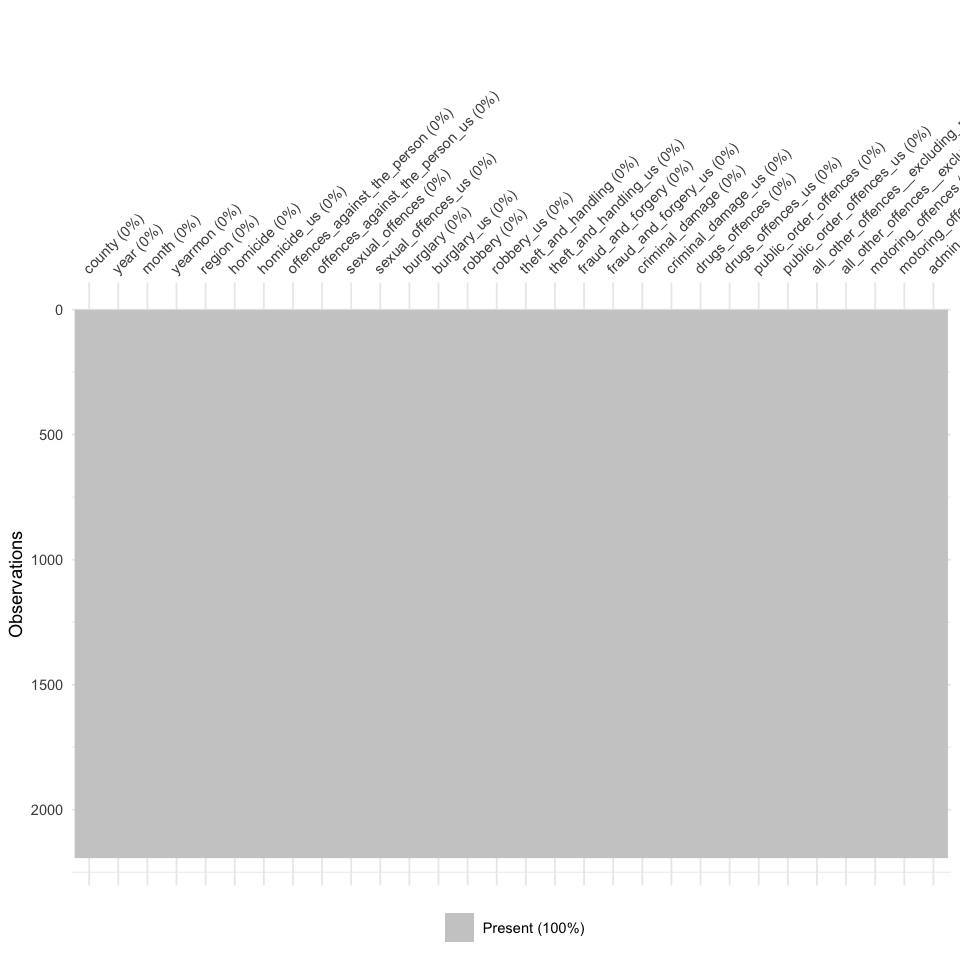

In [2499]:
vis_miss(combined_df)

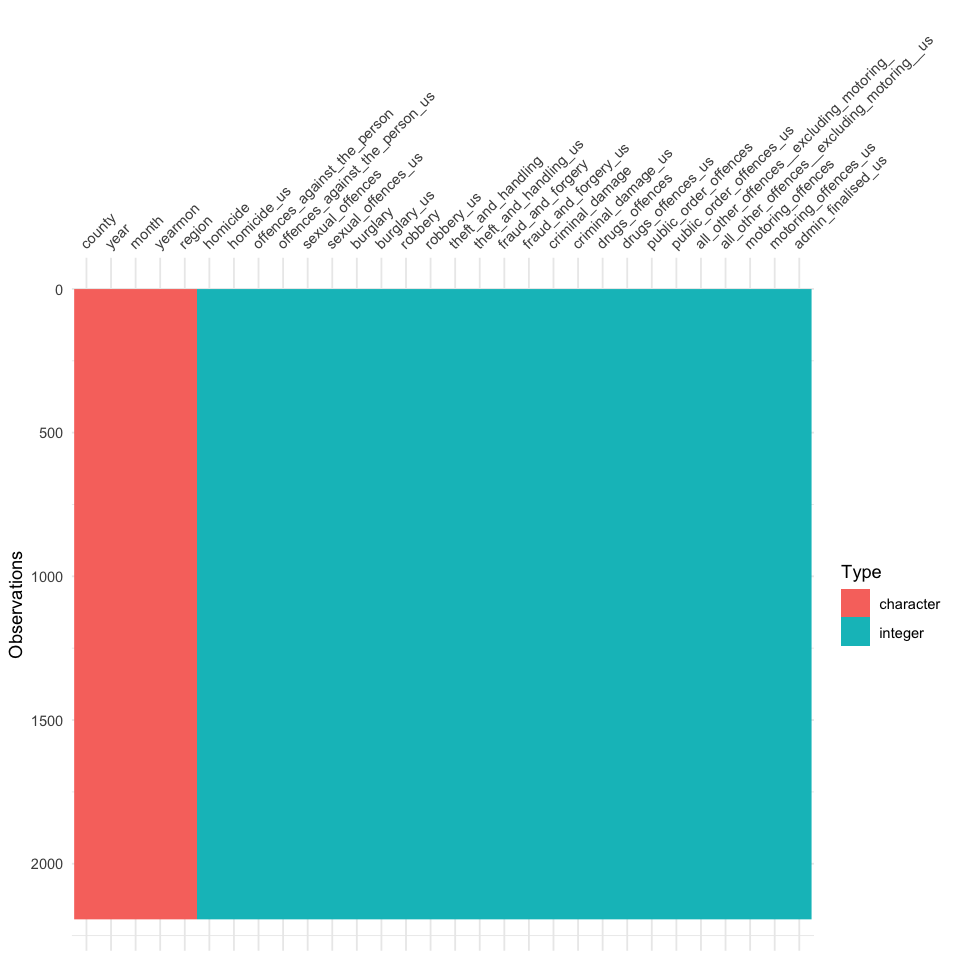

In [2500]:
vis_dat(combined_df)

In [2501]:
split_dataframe <- function(df){
  crime_columns = !grepl("_us$", colnames(df))
  unsuccesful_columns = grepl("_us$",  colnames(df))
  unsuccesful_columns[0:5] <- TRUE
  df1 <- df[, crime_columns]
  df2 <- df[, unsuccesful_columns]
  return(list(df1, df2))
}

In [2502]:
splited_dataframes <- split_dataframe(combined_df)

In [2668]:
head(splited_dataframes[1])

[[1]]
                    county year month    yearmon region homicide
173               National 2014   jan 2014-01-01    All       51
174      Avon and Somerset 2014   jan 2014-01-01   West        0
175           Bedfordshire 2014   jan 2014-01-01   East        0
176         Cambridgeshire 2014   jan 2014-01-01   East        0
177               Cheshire 2014   jan 2014-01-01  North        0
178              Cleveland 2014   jan 2014-01-01  North        2
179                Cumbria 2014   jan 2014-01-01  North        0
180             Derbyshire 2014   jan 2014-01-01   East        0
181     Devon and Cornwall 2014   jan 2014-01-01   West        0
182                 Dorset 2014   jan 2014-01-01   West        0
183                 Durham 2014   jan 2014-01-01  North        1
184            Dyfed Powys 2014   jan 2014-01-01   West        0
185                  Essex 2014   jan 2014-01-01   East        3
186        Gloucestershire 2014   jan 2014-01-01   West        0
187      GreaterManchester 2014   jan 2014-01-01  North        2
188                  Gwent 2014   jan 2014-01-01   West        0
189              Hampshire 2014   jan 2014-01-01  South        0
190          Hertfordshire 2014   jan 2014-01-01   East        3
191             Humberside 2014   jan 2014-01-01  North        0
192                   Kent 2014   jan 2014-01-01  South        0
193             Lancashire 2014   jan 2014-01-01  North        4
194         Leicestershire 2014   jan 2014-01-01   East        2
195           Lincolnshire 2014   jan 2014-01-01   East        1
196             Merseyside 2014   jan 2014-01-01  North        2
197  Metropolitan and City 2014   jan 2014-01-01  South       13
198                Norfolk 2014   jan 2014-01-01   East        0
199       Northamptonshire 2014   jan 2014-01-01   East        0
200            Northumbria 2014   jan 2014-01-01  North        3
201            North Wales 2014   jan 2014-01-01  North        1
202        North Yorkshire 2014   jan 2014-01-01  North        0
203        Nottinghamshire 2014   jan 2014-01-01   East        0
204            South Wales 2014   jan 2014-01-01   West        0
205        South Yorkshire 2014   jan 2014-01-01  North        2
206          Staffordshire 2014   jan 2014-01-01   West        2
207                Suffolk 2014   jan 2014-01-01   East        1
208                 Surrey 2014   jan 2014-01-01  South        0
209                 Sussex 2014   jan 2014-01-01  South        0
210          Thames Valley 2014   jan 2014-01-01  South        4
211           Warwickshire 2014   jan 2014-01-01   West        0
212            West Mercia 2014   jan 2014-01-01   West        0
213          West Midlands 2014   jan 2014-01-01   West        1
214         West Yorkshire 2014   jan 2014-01-01  North        3
215              Wiltshire 2014   jan 2014-01-01   West        1
130               National 2014   feb 2014-02-01    All       61
131      Avon and Somerset 2014   feb 2014-02-01   West        0
132           Bedfordshire 2014   feb 2014-02-01   East        0
133         Cambridgeshire 2014   feb 2014-02-01   East        0
134               Cheshire 2014   feb 2014-02-01  North        0
135              Cleveland 2014   feb 2014-02-01  North        0
136                Cumbria 2014   feb 2014-02-01  North        0
137             Derbyshire 2014   feb 2014-02-01   East        1
138     Devon and Cornwall 2014   feb 2014-02-01   West        0
139                 Dorset 2014   feb 2014-02-01   West        1
140                 Durham 2014   feb 2014-02-01  North        1
141            Dyfed Powys 2014   feb 2014-02-01   West        1
142                  Essex 2014   feb 2014-02-01   East        0
143        Gloucestershire 2014   feb 2014-02-01   West        0
144      GreaterManchester 2014   feb 2014-02-01  North        0
145                  Gwent 2014   feb 2014-02-01   West        0
146              Hampshire 2014   feb 2014-02-01  South        0
147          Hertfordshire 20

In [2504]:
head(splited_dataframes[2])

[[1]]
                    county year month    yearmon region homicide_us
173               National 2014   jan 2014-01-01    All          11
174      Avon and Somerset 2014   jan 2014-01-01   West           0
175           Bedfordshire 2014   jan 2014-01-01   East           1
176         Cambridgeshire 2014   jan 2014-01-01   East           0
177               Cheshire 2014   jan 2014-01-01  North           0
178              Cleveland 2014   jan 2014-01-01  North           3
179                Cumbria 2014   jan 2014-01-01  North           0
180             Derbyshire 2014   jan 2014-01-01   East           1
181     Devon and Cornwall 2014   jan 2014-01-01   West           0
182                 Dorset 2014   jan 2014-01-01   West           0
183                 Durham 2014   jan 2014-01-01  North           0
184            Dyfed Powys 2014   jan 2014-01-01   West           0
185                  Essex 2014   jan 2014-01-01   East           0
186        Gloucestershire 2014   jan 2014-01-01   West           0
187      GreaterManchester 2014   jan 2014-01-01  North           1
188                  Gwent 2014   jan 2014-01-01   West           0
189              Hampshire 2014   jan 2014-01-01  South           0
190          Hertfordshire 2014   jan 2014-01-01   East           0
191             Humberside 2014   jan 2014-01-01  North           1
192                   Kent 2014   jan 2014-01-01  South           0
193             Lancashire 2014   jan 2014-01-01  North           0
194         Leicestershire 2014   jan 2014-01-01   East           1
195           Lincolnshire 2014   jan 2014-01-01   East           0
196             Merseyside 2014   jan 2014-01-01  North           1
197  Metropolitan and City 2014   jan 2014-01-01  South           0
198                Norfolk 2014   jan 2014-01-01   East           0
199       Northamptonshire 2014   jan 2014-01-01   East           0
200            Northumbria 2014   jan 2014-01-01  North           0
201            North Wales 2014   jan 2014-01-01  North           0
202        North Yorkshire 2014   jan 2014-01-01  North           0
203        Nottinghamshire 2014   jan 2014-01-01   East           0
204            South Wales 2014   jan 2014-01-01   West           0
205        South Yorkshire 2014   jan 2014-01-01  North           1
206          Staffordshire 2014   jan 2014-01-01   West           0
207                Suffolk 2014   jan 2014-01-01   East           0
208                 Surrey 2014   jan 2014-01-01  South           0
209                 Sussex 2014   jan 2014-01-01  South           0
210          Thames Valley 2014   jan 2014-01-01  South           1
211           Warwickshire 2014   jan 2014-01-01   West           0
212            West Mercia 2014   jan 2014-01-01   West           0
213          West Midlands 2014   jan 2014-01-01   West           0
214         West Yorkshire 2014   jan 2014-01-01  North           0
215              Wiltshire 2014   jan 2014-01-01   West           0
130               National 2014   feb 2014-02-01    All          18
131      Avon and Somerset 2014   feb 2014-02-01   West           0
132           Bedfordshire 2014   feb 2014-02-01   East           0
133         Cambridgeshire 2014   feb 2014-02-01   East           0
134               Cheshire 2014   feb 2014-02-01  North           0
135              Cleveland 2014   feb 2014-02-01  North           0
136                Cumbria 2014   feb 2014-02-01  North           0
137             Derbyshire 2014   feb 2014-02-01   East           0
138     Devon and Cornwall 2014   feb 2014-02-01   West           1
139                 Dorset 2014   feb 2014-02-01   West           0
140                 Durham 2014   feb 2014-02-01  North           0
141            Dyfed Powys 2014   feb 2014-02-01   West           0
142                  Essex 2014   feb 2014-02-01   East           0
143        Gloucestershire 2014   feb 2014-02-01   West           1
144      GreaterManchester 2014   feb 2014-02-01  

In [2505]:
write.csv(splited_dataframes[1], "dataset/cleaned-crime-data.csv", row.names=FALSE)

In [2506]:
write.csv(splited_dataframes[2], "dataset/cleaned-unsuccessful-crime-data.csv", row.names=FALSE)

In [2507]:
write.csv(combined_df, "dataset/cleaned-data.csv", row.names=FALSE)

# Descriptive Analytics

In [2508]:
crime_df = read.csv("dataset/cleaned-crime-data.csv")

In [2669]:
glimpse(crime_df)

Rows: 2,193
Columns: 17
$ county                                  <chr> "National", "Avon and Somerset…
$ year                                    <int> 2014, 2014, 2014, 2014, 2014, …
$ month                                   <chr> "jan", "jan", "jan", "jan", "j…
$ yearmon                                 <chr> "2014-01-01", "2014-01-01", "2…
$ region                                  <chr> "All", "West", "East", "East",…
$ homicide                                <int> 51, 0, 0, 0, 0, 2, 0, 0, 0, 0,…
$ offences_against_the_person             <int> 9087, 228, 68, 101, 170, 119, …
$ sexual_offences                         <int> 736, 35, 2, 10, 15, 11, 4, 22,…
$ burglary                                <int> 1715, 49, 7, 18, 38, 36, 16, 3…
$ robbery                                 <int> 522, 8, 16, 6, 10, 3, 1, 5, 10…
$ theft_and_handling                      <int> 11057, 338, 75, 148, 205, 334,…
$ fraud_and_forgery                       <int> 846, 18, 17, 10, 14, 11, 6, 15…
$ criminal_damag

In [2509]:
uscrime_df = read.csv("dataset/cleaned-unsuccessful-crime-data.csv")

In [2670]:
glimpse(uscrime_df)

Rows: 2,193
Columns: 18
$ county                                     <chr> "National", "Avon and Somer…
$ year                                       <int> 2014, 2014, 2014, 2014, 201…
$ month                                      <chr> "jan", "jan", "jan", "jan",…
$ yearmon                                    <chr> "2014-01-01", "2014-01-01",…
$ region                                     <chr> "All", "West", "East", "Eas…
$ homicide_us                                <int> 11, 0, 1, 0, 0, 3, 0, 1, 0,…
$ offences_against_the_person_us             <int> 2930, 62, 29, 21, 40, 44, 1…
$ sexual_offences_us                         <int> 286, 17, 1, 3, 1, 6, 3, 7, …
$ burglary_us                                <int> 284, 1, 4, 4, 5, 2, 0, 4, 4…
$ robbery_us                                 <int> 139, 0, 7, 4, 0, 2, 0, 2, 0…
$ theft_and_handling_us                      <int> 998, 32, 4, 15, 5, 31, 7, 1…
$ fraud_and_forgery_us                       <int> 137, 0, 3, 4, 1, 3, 0, 0, 2…
$ criminal_damag

In [2510]:
head(crime_df)

county            year month yearmon    region homicide
1 National          2014 jan   2014-01-01 All    51      
2 Avon and Somerset 2014 jan   2014-01-01 West    0      
3 Bedfordshire      2014 jan   2014-01-01 East    0      
4 Cambridgeshire    2014 jan   2014-01-01 East    0      
5 Cheshire          2014 jan   2014-01-01 North   0      
6 Cleveland         2014 jan   2014-01-01 North   2      
  offences_against_the_person sexual_offences burglary robbery
1 9087                        736             1715     522    
2  228                         35               49       8    
3   68                          2                7      16    
4  101                         10               18       6    
5  170                         15               38      10    
6  119                         11               36       3    
  theft_and_handling fraud_and_forgery criminal_damage drugs_offences
1 11057              846               2693            4988          
2   338               18                 93             148          
3    75               17                 22              31          
4   148               10                 30              47          
5   205               14                 39              64          
6   334               11                 46              65          
  public_order_offences all_other_offences__excluding_motoring_
1 4752                  3291                                   
2  123                    63                                   
3   30                    13                                   
4   37                    28                                   
5   77                    50                                   
6  123                    34                                   
  motoring_offences
1 12945            
2   256            
3   171            
4   103            
5   264            
6   228

In [2511]:
head(uscrime_df)

county            year month yearmon    region homicide_us
1 National          2014 jan   2014-01-01 All    11         
2 Avon and Somerset 2014 jan   2014-01-01 West    0         
3 Bedfordshire      2014 jan   2014-01-01 East    1         
4 Cambridgeshire    2014 jan   2014-01-01 East    0         
5 Cheshire          2014 jan   2014-01-01 North   0         
6 Cleveland         2014 jan   2014-01-01 North   3         
  offences_against_the_person_us sexual_offences_us burglary_us robbery_us
1 2930                           286                284         139       
2   62                            17                  1           0       
3   29                             1                  4           7       
4   21                             3                  4           4       
5   40                             1                  5           0       
6   44                             6                  2           2       
  theft_and_handling_us fraud_and_forgery_us criminal_damage_us
1 998                   137                  472               
2  32                     0                   14               
3   4                     3                    8               
4  15                     4                    3               
5   5                     1                    3               
6  31                     3                   13               
  drugs_offences_us public_order_offences_us
1 305               797                     
2   4                28                     
3   3                 9                     
4   1                 2                     
5   3                 8                     
6   2                27                     
  all_other_offences__excluding_motoring__us motoring_offences_us
1 586                                        1466                
2   9                                          40                
3   2                                          13                
4   9                                          16                
5   5                                          16                
6  14                                          16                
  admin_finalised_us
1 890               
2  20               
3  12               
4  14               
5  13               
6   3

## Attributes Analysis

In [2512]:
print_summary <- function(dataframe){
  for (i in colnames(dataframe)){
    print(i)
    print(summary(dataframe[,i]))
  }
}

In [2513]:
print_summary(crime_df)

[1] "county"
   Length     Class      Mode 
     2193 character character 
[1] "year"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   2014    2015    2016    2016    2017    2018 
[1] "month"
   Length     Class      Mode 
     2193 character character 
[1] "yearmon"
   Length     Class      Mode 
     2193 character character 
[1] "region"
   Length     Class      Mode 
     2193 character character 
[1] "homicide"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   0.000   1.000   3.798   3.000 131.000 
[1] "offences_against_the_person"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   29.0   115.0   179.0   454.9   272.0 11741.0 
[1] "sexual_offences"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00    8.00   15.00   43.78   29.00 1179.00 
[1] "burglary"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00   14.00   23.00   60.09   38.00 1715.00 
[1] "robbery"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00    2.00    5.00   19.33   10.00  650.00 
[

In [2514]:
print_summary(uscrime_df)

[1] "county"
   Length     Class      Mode 
     2193 character character 
[1] "year"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   2014    2015    2016    2016    2017    2018 
[1] "month"
   Length     Class      Mode 
     2193 character character 
[1] "yearmon"
   Length     Class      Mode 
     2193 character character 
[1] "region"
   Length     Class      Mode 
     2193 character character 
[1] "homicide_us"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0000  0.0000  0.9138  1.0000 35.0000 
[1] "offences_against_the_person_us"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    5.0    27.0    46.0   135.4    77.0  3568.0 
[1] "sexual_offences_us"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00    1.00    4.00   16.19   11.00  489.00 
[1] "burglary_us"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00    1.00    3.00   10.14    6.00  317.00 
[1] "robbery_us"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00    0.00    1.00    5.16    

## Analysis dependent on Regions

In [2515]:
group_by_region <- function(dataframe){
  dataframe <- dataframe[,-c(1:4)]
  dataframe <- dataframe[dataframe$region != "All",]
  dataframe <- group_by(dataframe, region)
  summarise_all(dataframe, funs(sum))
}

In [2516]:
group_by_region(crime_df)

region homicide offences_against_the_person sexual_offences burglary robbery
1 East    706      88450                       7707           10274    3147   
2 North  1176     156991                      15293           23332    6112   
3 South  1352     137299                      13929           17916    7394   
4 West    930     116108                      11079           14365    4538   
  theft_and_handling fraud_and_forgery criminal_damage drugs_offences
1  69920              6709             18328           30252         
2 142038             10648             37010           55656         
3 100035             16668             25181           74147         
4  97078              8272             24548           44604         
  public_order_offences all_other_offences__excluding_motoring_
1 28563                  9102                                  
2 63954                 22082                                  
3 44489                 23837                                  
4 41091                 15527                                  
  motoring_offences
1  68890           
2 119034           
3 110545           
4 102248

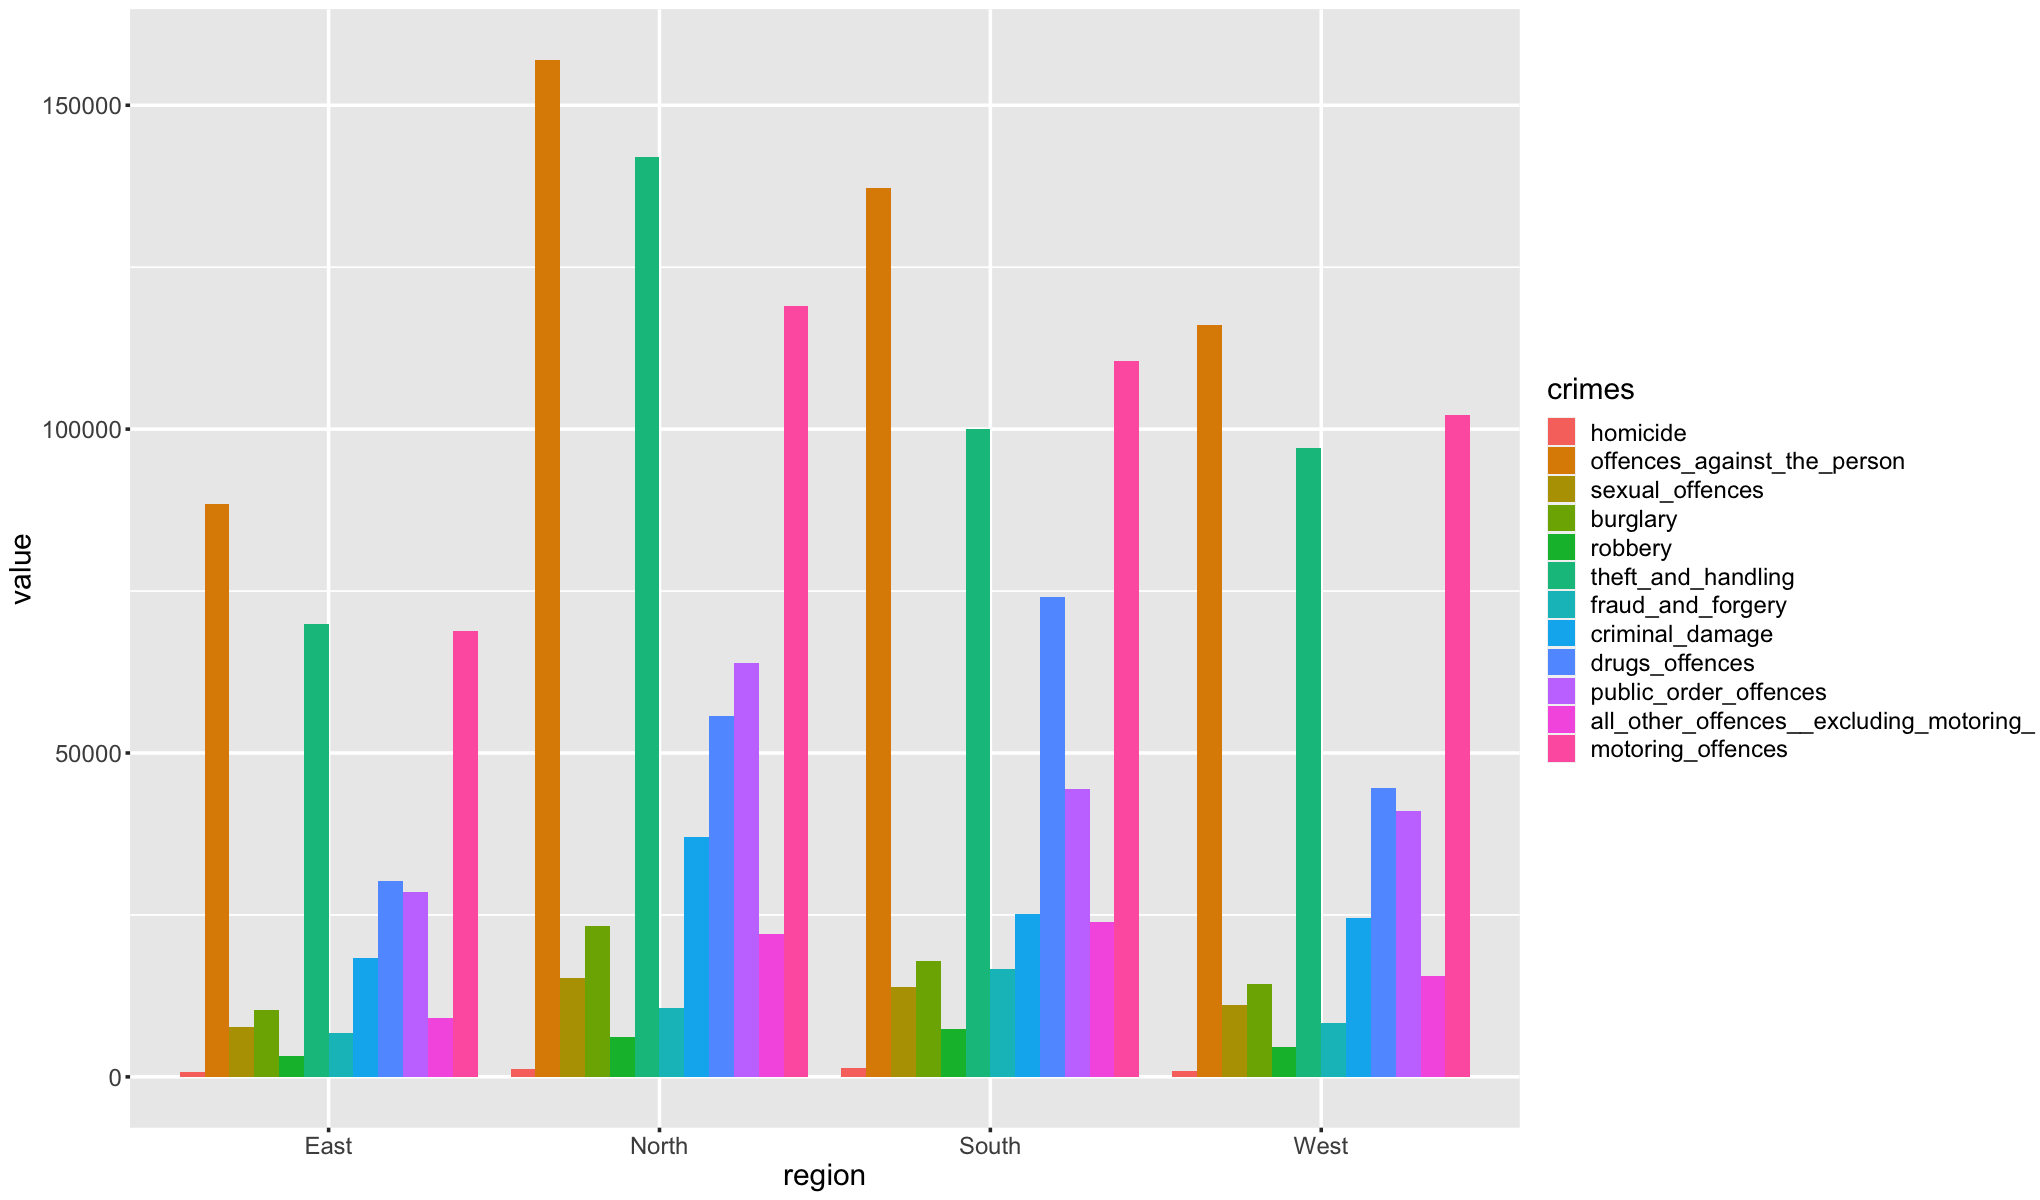

In [2517]:
df <- melt(group_by_region(crime_df) ,  id.vars = 'region', variable.name = 'crimes')
options(repr.plot.width = 17, repr.plot.height =10)
ggplot(df,aes(x = region, y = value)) + 
geom_bar(aes(fill = crimes),stat = "identity",position = "dodge", width = 0.9) + 
theme(text = element_text(size = 18), element_line(linewidth =1))

In [2518]:
group_by_region(uscrime_df)

region homicide_us offences_against_the_person_us sexual_offences_us
1 East   141         23255                          2214              
2 North  230         41109                          5378              
3 South  433         52070                          6208              
4 West   198         32068                          3947              
  burglary_us robbery_us theft_and_handling_us fraud_and_forgery_us
1 1649         841        6278                 1040                
2 3335        1290       10500                 1629                
3 3806        2279       12641                 2885                
4 2331        1248        7238                 1279                
  criminal_damage_us drugs_offences_us public_order_offences_us
1 3128               1959               4527                   
2 5894               3627               9345                   
3 5217               5757              10631                   
4 3782               2443               6687                   
  all_other_offences__excluding_motoring__us motoring_offences_us
1 1881                                       11024               
2 3549                                       17356               
3 5081                                       23337               
4 2553                                       15118               
  admin_finalised_us
1  7531             
2  9352             
3 16505             
4  9174

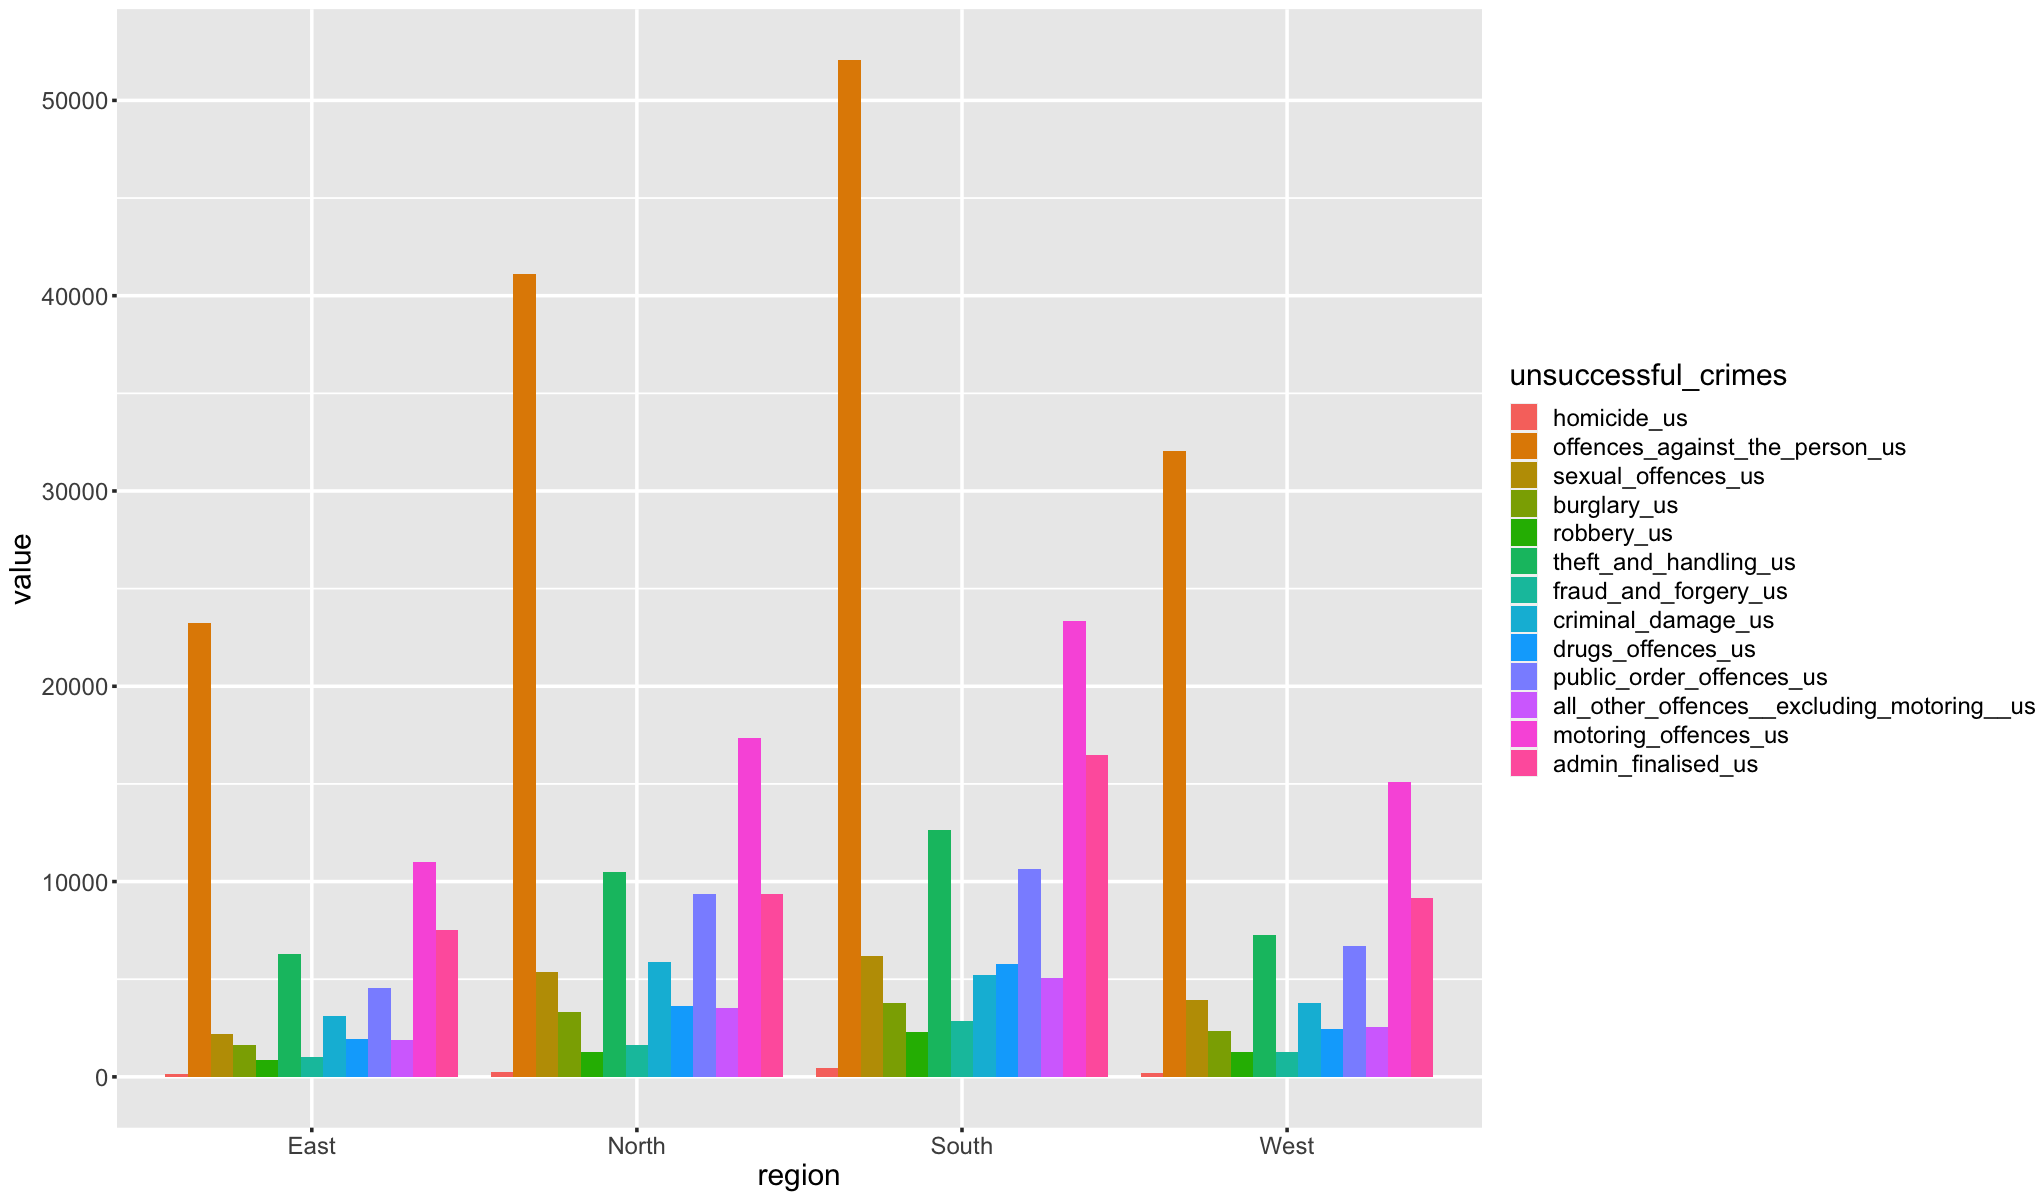

In [2519]:
df <- melt(group_by_region(uscrime_df) ,  id.vars = 'region', variable.name = 'unsuccessful_crimes')
options(repr.plot.width = 17, repr.plot.height =10)
ggplot(df,aes(x = region, y = value)) + 
geom_bar(aes(fill = unsuccessful_crimes),stat = "identity",position = "dodge", width = 0.9) + 
theme(text = element_text(size = 18), element_line(linewidth =1))

In [2520]:
group_by_region_all_crimes <- function(dataframe){
  dataframe <- dataframe[,-c(1:4)]
  dataframe$sum_of_all <- rowSums(dataframe[, sapply(dataframe, is.numeric)])
  dataframe <- dataframe[, c("region", "sum_of_all")]
  dataframe <- group_by(dataframe, region)
  summarise_all(dataframe, funs(sum))
}

In [2521]:
group_by_region_all_crimes(crime_df)

region sum_of_all
1 All    2048554   
2 East    342048   
3 North   653326   
4 South   572792   
5 West    480388

In [2522]:
group_by_region_all_crimes(uscrime_df)

region sum_of_all
1 All    412978    
2 East    65468    
3 North  112594    
4 South  146850    
5 West    88066

## Analysis dependent on Years & Months

In [2523]:
# By each year, plot all the county crimes with month stacks for crimes_df and unsucessful_crimes
head(crime_df)

county            year month yearmon    region homicide
1 National          2014 jan   2014-01-01 All    51      
2 Avon and Somerset 2014 jan   2014-01-01 West    0      
3 Bedfordshire      2014 jan   2014-01-01 East    0      
4 Cambridgeshire    2014 jan   2014-01-01 East    0      
5 Cheshire          2014 jan   2014-01-01 North   0      
6 Cleveland         2014 jan   2014-01-01 North   2      
  offences_against_the_person sexual_offences burglary robbery
1 9087                        736             1715     522    
2  228                         35               49       8    
3   68                          2                7      16    
4  101                         10               18       6    
5  170                         15               38      10    
6  119                         11               36       3    
  theft_and_handling fraud_and_forgery criminal_damage drugs_offences
1 11057              846               2693            4988          
2   338               18                 93             148          
3    75               17                 22              31          
4   148               10                 30              47          
5   205               14                 39              64          
6   334               11                 46              65          
  public_order_offences all_other_offences__excluding_motoring_
1 4752                  3291                                   
2  123                    63                                   
3   30                    13                                   
4   37                    28                                   
5   77                    50                                   
6  123                    34                                   
  motoring_offences
1 12945            
2   256            
3   171            
4   103            
5   264            
6   228

In [2753]:
group_by_year_month <- function(dataframe, year){
  dataframe <- dataframe[dataframe$year == year,]
  dataframe <- dataframe[dataframe$county != "National",]

  dataframe <- dplyr::select(dataframe, -c("year", "yearmon", "region"))
  dataframe$sum_of_all <- rowSums(dataframe[, sapply(dataframe, is.numeric)])
    
  dataframe <- dplyr::select(dataframe, c("county", "month", "sum_of_all"))
  dataframe <- group_by(dataframe, county, month)
  dataframe <- summarise_all(dataframe, funs(sum))
    
    
  return(dataframe)
}

In [2775]:
plot_graph <- function(in_df, year){
  df <- melt(group_by_year_month(in_df, year) ,  id.vars = c('county', 'month'), variable.name = 'crimes')
  options(repr.plot.width = 17, repr.plot.height =10)
  ggplot(df, aes(x = value, y = reorder(county, value))) + 
  geom_bar(aes(fill = month), stat = "identity", position = "stack", width = 0.9) + 
  theme(text = element_text(size = 18), element_line(linewidth =1))
}

In [2754]:
group_by_year_month(crime_df, "2014")

county            month sum_of_all
1   Avon and Somerset apr   1038      
2   Avon and Somerset aug    993      
3   Avon and Somerset dec   1112      
4   Avon and Somerset feb   1275      
5   Avon and Somerset jan   1359      
6   Avon and Somerset jul   1410      
7   Avon and Somerset jun   1089      
8   Avon and Somerset mar   1848      
9   Avon and Somerset may   1073      
10  Avon and Somerset nov   1085      
11  Avon and Somerset oct   1266      
12  Avon and Somerset sep   1216      
13  Bedfordshire      apr    345      
14  Bedfordshire      aug    348      
15  Bedfordshire      dec    336      
16  Bedfordshire      feb    259      
17  Bedfordshire      jan    452      
18  Bedfordshire      jul    343      
19  Bedfordshire      jun    348      
20  Bedfordshire      mar    519      
21  Bedfordshire      may    323      
22  Bedfordshire      nov    373      
23  Bedfordshire      oct    376      
24  Bedfordshire      sep    386      
25  Cambridgeshire    apr    424      
26  Cambridgeshire    aug    396      
27  Cambridgeshire    dec    426      
28  Cambridgeshire    feb    491      
29  Cambridgeshire    jan    538      
30  Cambridgeshire    jul    440      
⋮   ⋮                 ⋮     ⋮         
475 West Midlands     jun   2017      
476 West Midlands     mar   2325      
477 West Midlands     may   1998      
478 West Midlands     nov   2078      
479 West Midlands     oct   2262      
480 West Midlands     sep   2146      
481 West Yorkshire    apr   1820      
482 West Yorkshire    aug   1717      
483 West Yorkshire    dec   1670      
484 West Yorkshire    feb   1786      
485 West Yorkshire    jan   2099      
486 West Yorkshire    jul   1868      
487 West Yorkshire    jun   1571      
488 West Yorkshire    mar   1784      
489 West Yorkshire    may   1631      
490 West Yorkshire    nov   1457      
491 West Yorkshire    oct   1685      
492 West Yorkshire    sep   1841      
493 Wiltshire         apr    352      
494 Wiltshire         aug    367      
495 Wiltshire         dec    392      
496 Wiltshire         feb    358      
497 Wiltshire         jan    424      
498 Wiltshire         jul    434      
499 Wiltshire         jun    317      
500 Wiltshire         mar    406      
501 Wiltshire         may    416      
502 Wiltshire         nov    314      
503 Wiltshire         oct    418      
504 Wiltshire         sep    421

### 2014

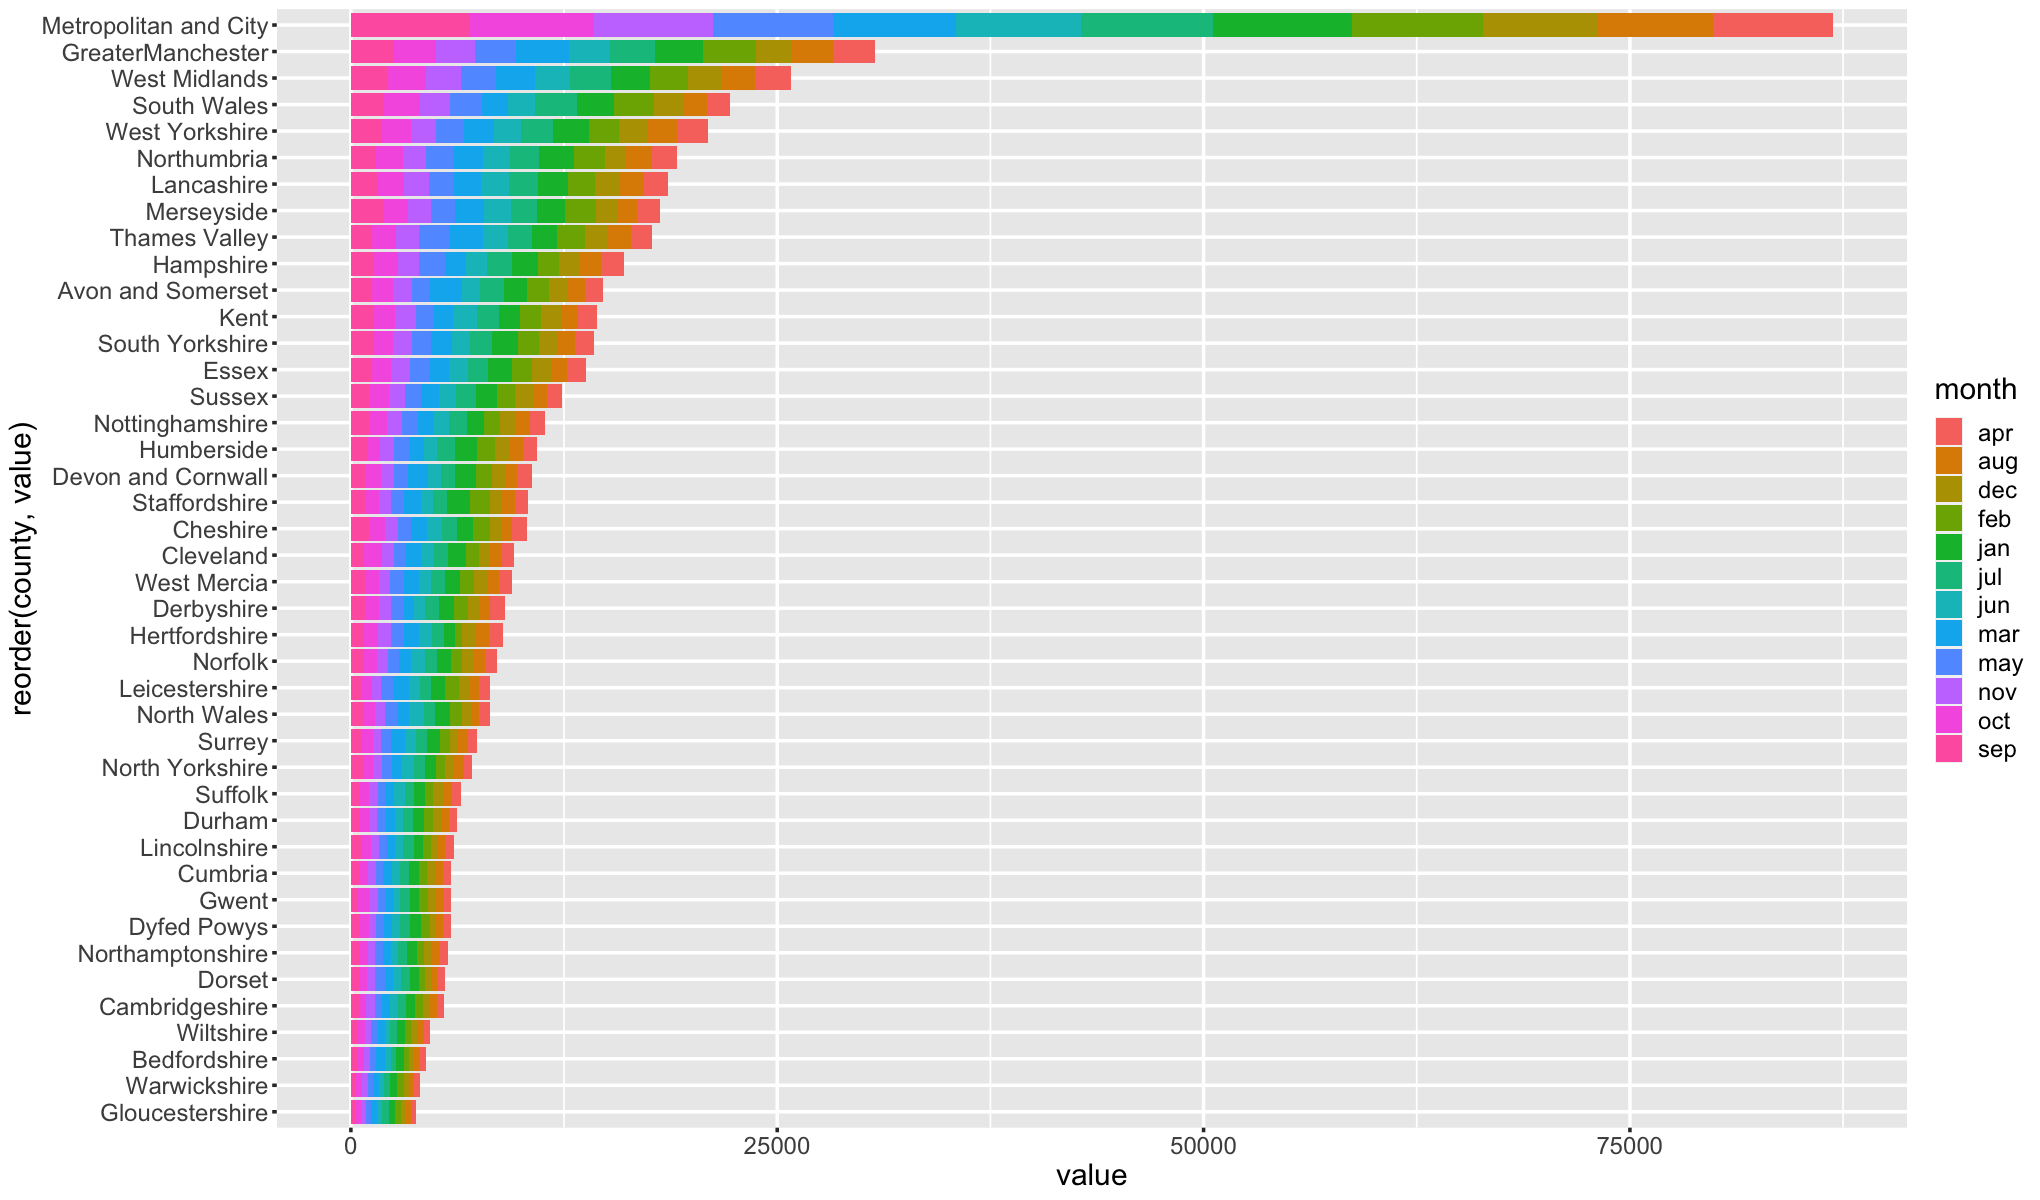

In [2777]:
# crimes
plot_graph(crime_df, "2014")

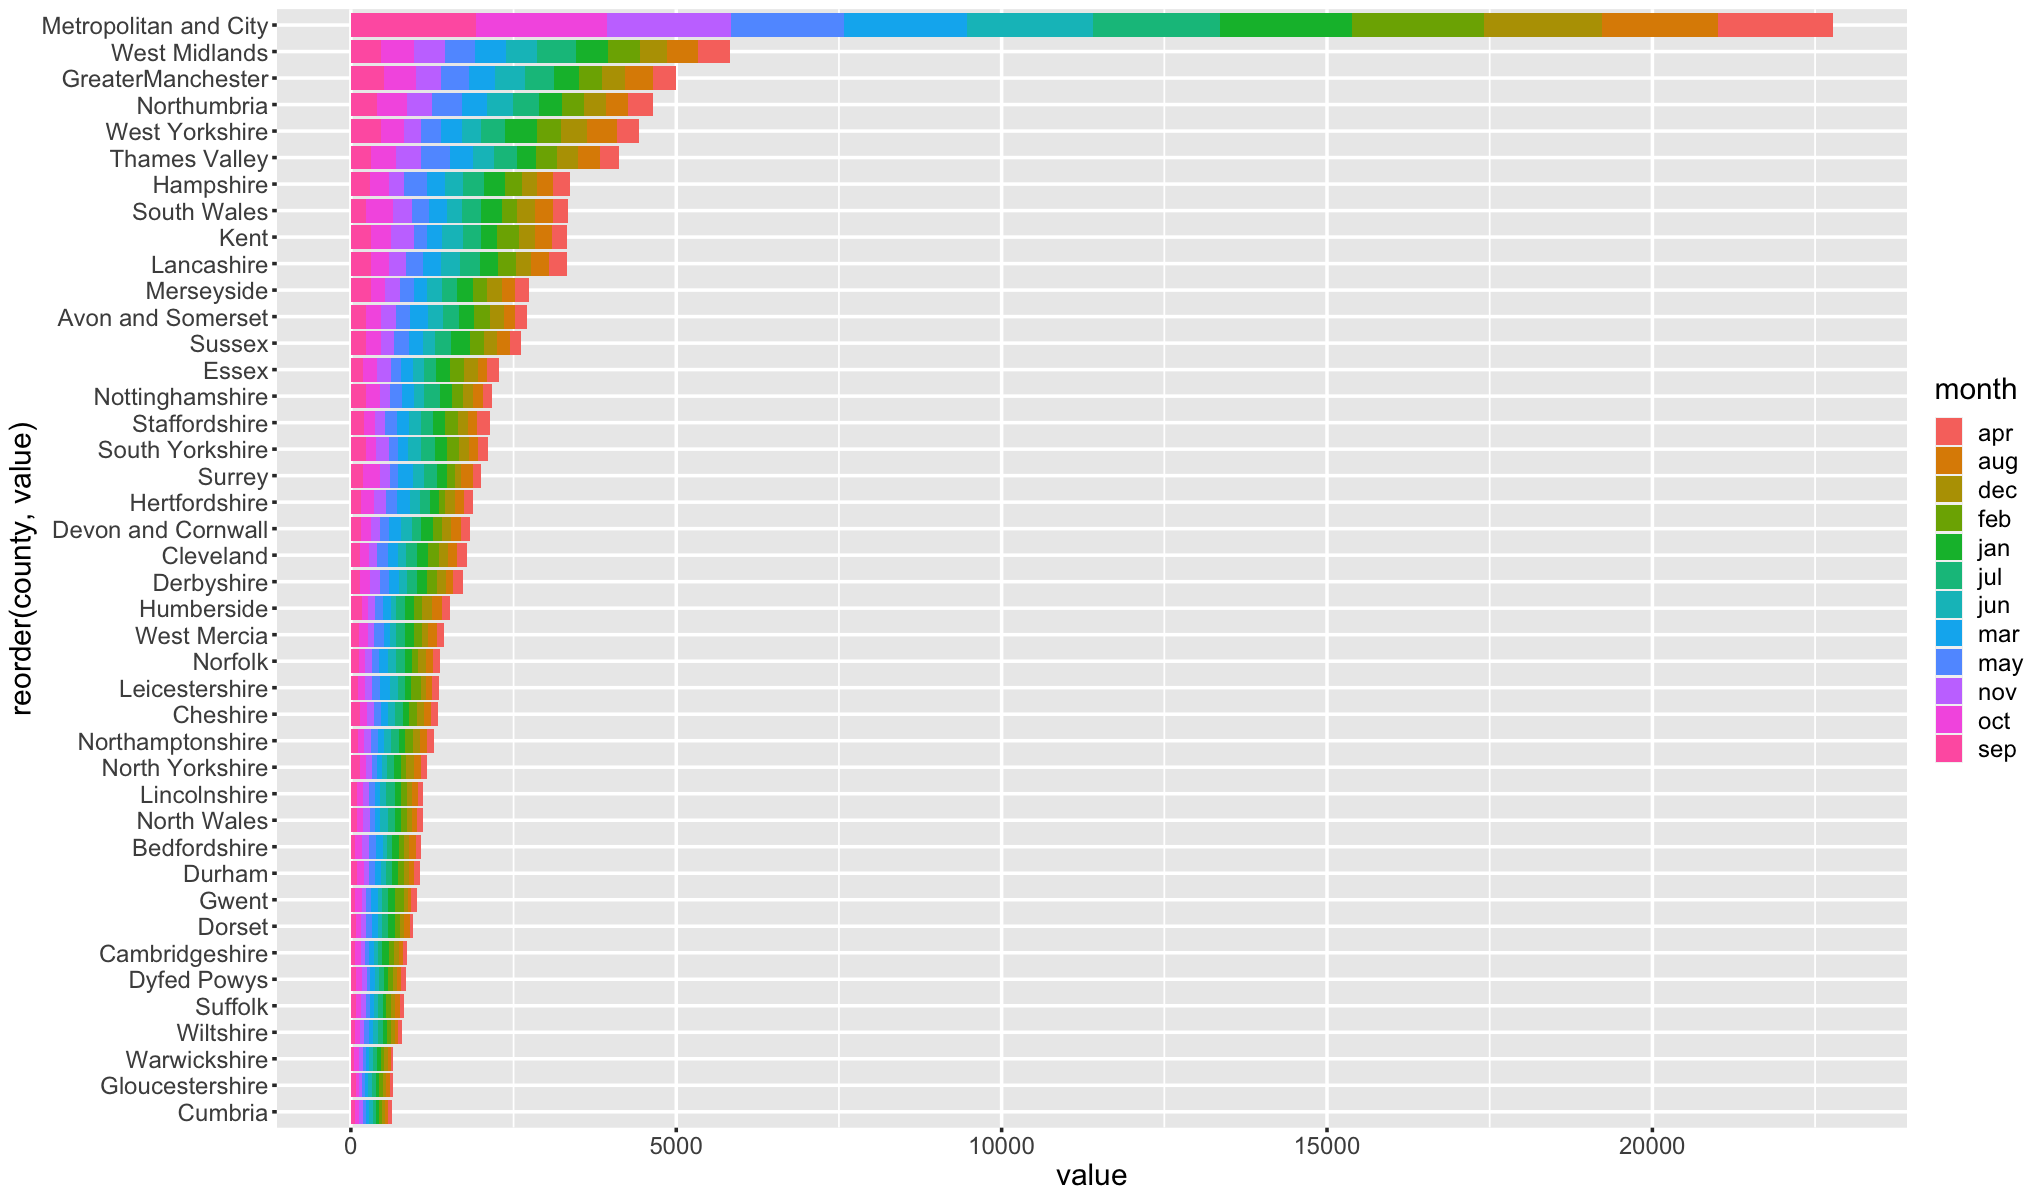

In [2778]:
# unsuccesfull crimes
plot_graph(uscrime_df, "2014")

### 2015

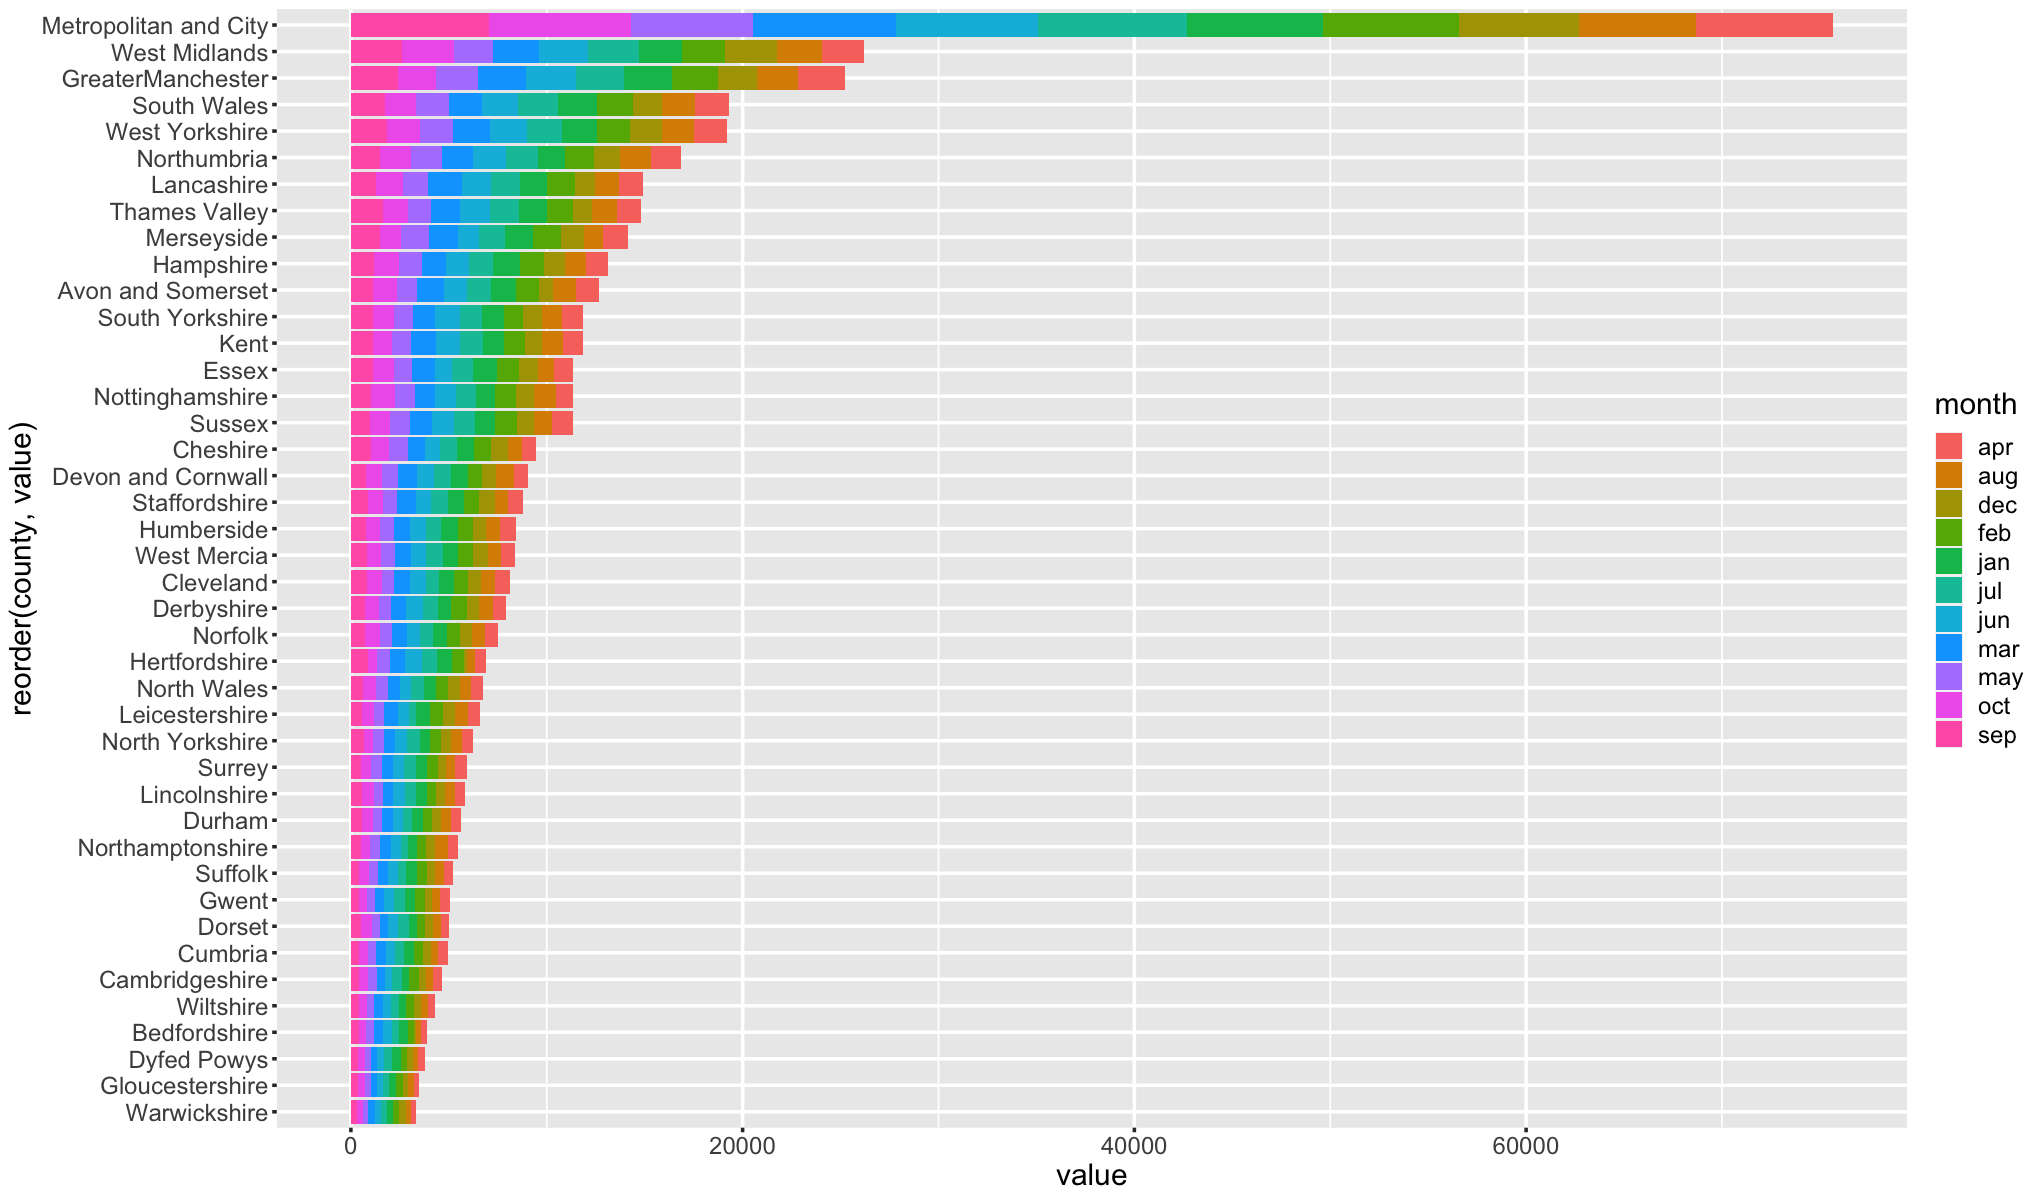

In [2779]:
# crimes
plot_graph(crime_df, "2015")

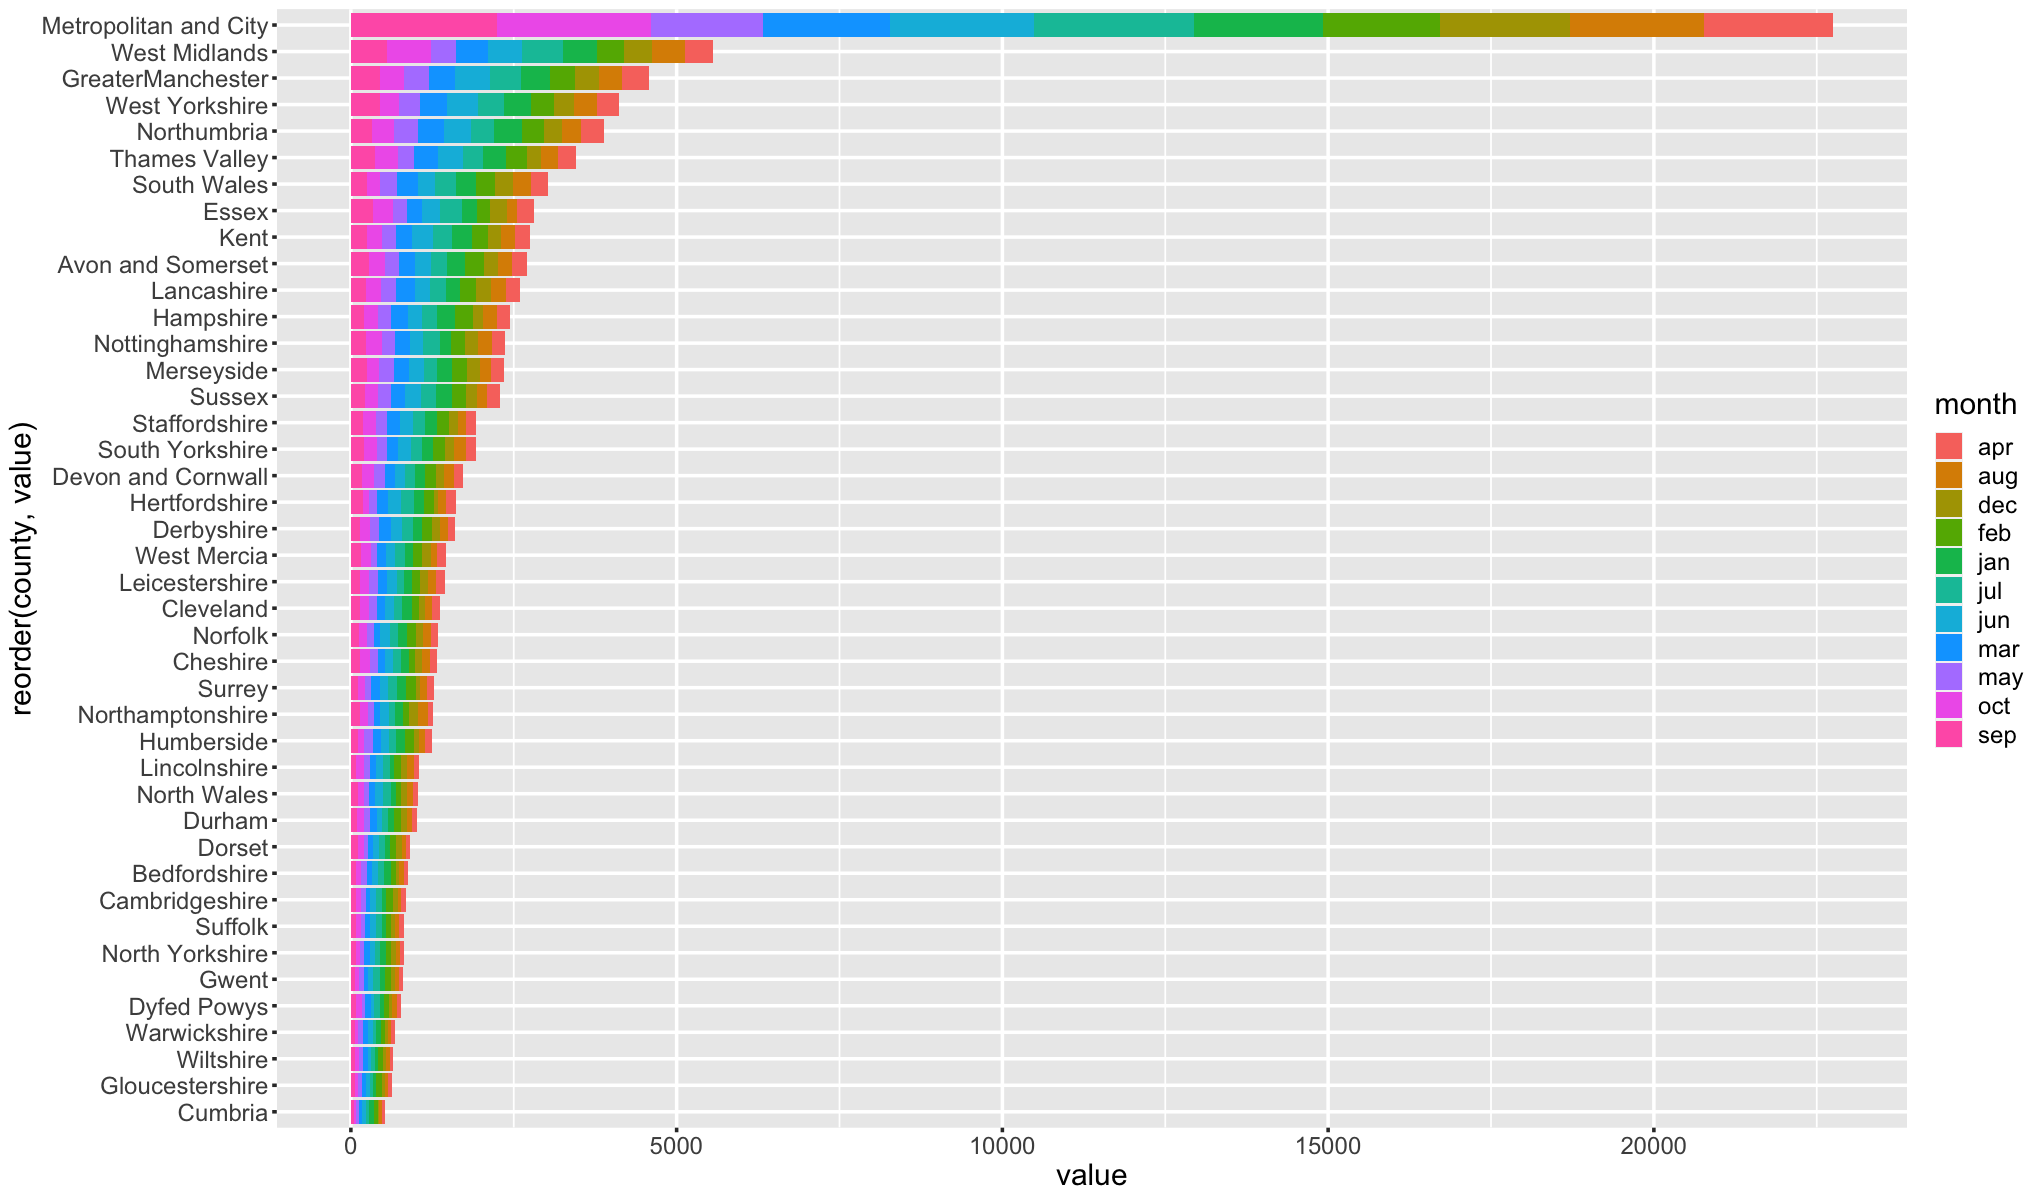

In [2780]:
# unsuccesfull crimes
plot_graph(uscrime_df, "2015")

### 2016

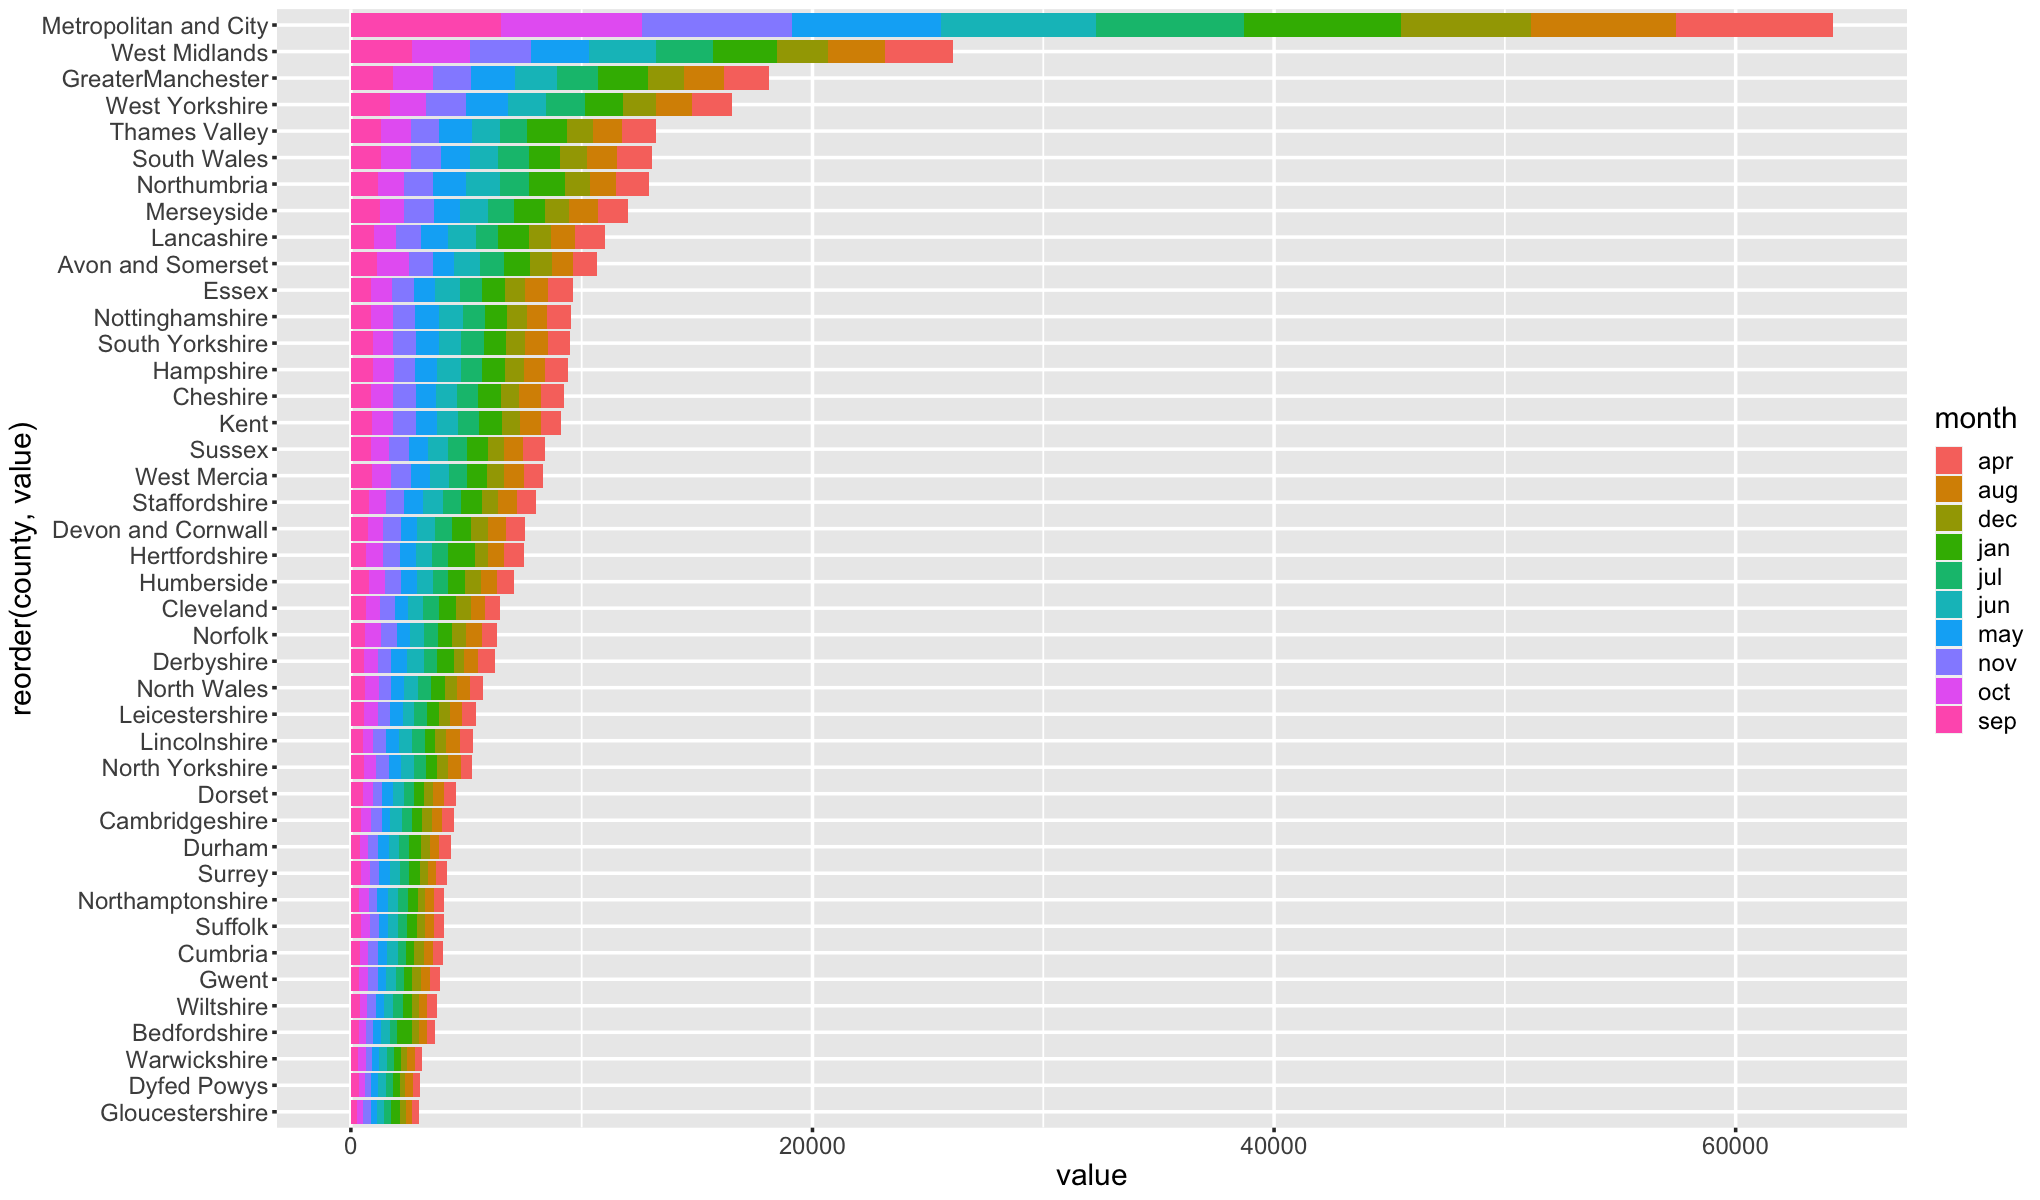

In [2781]:
# crimes
plot_graph(crime_df, "2016")

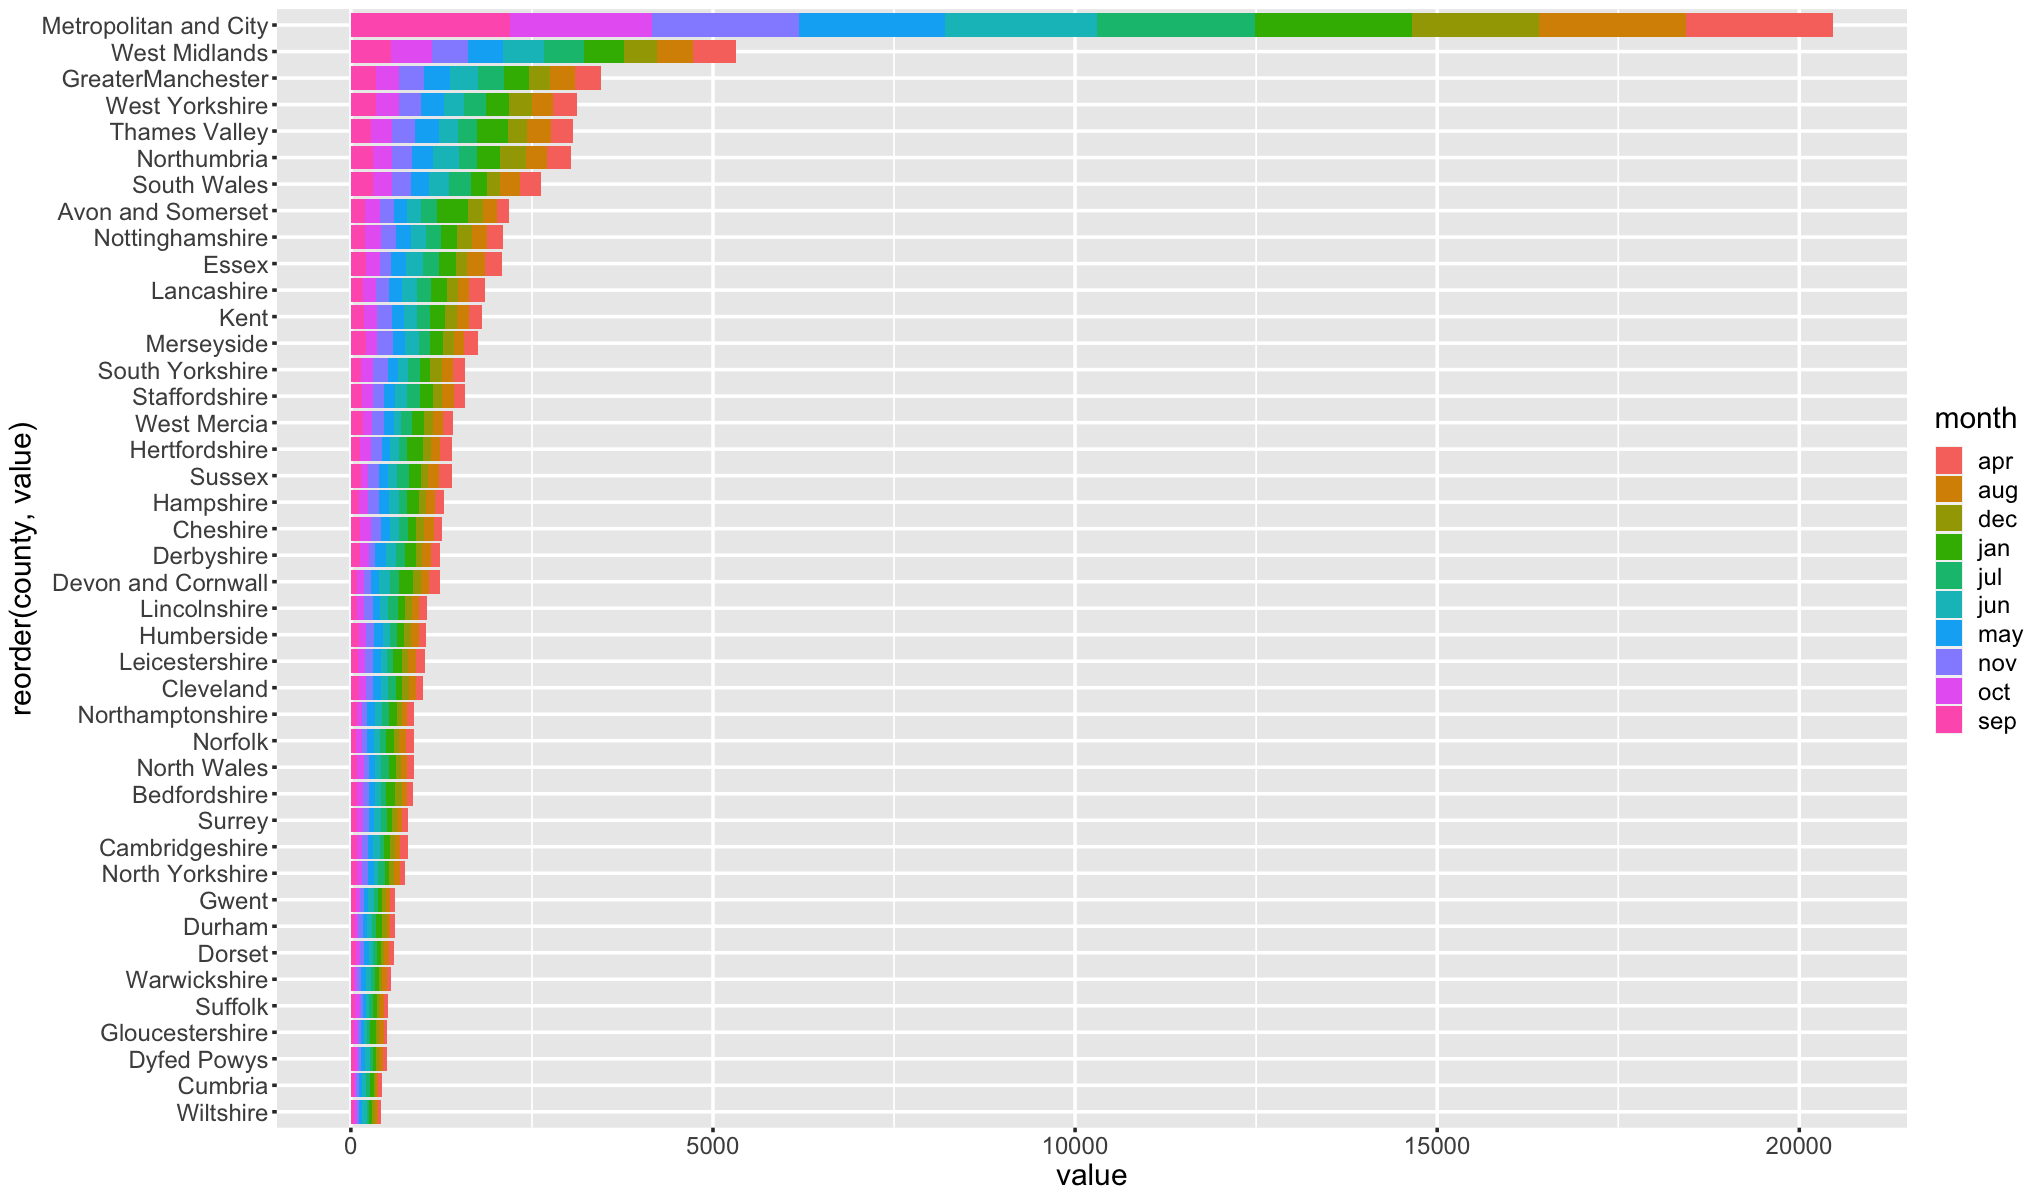

In [2782]:
# unsuccesfull crimes
plot_graph(uscrime_df, "2016")

### 2017

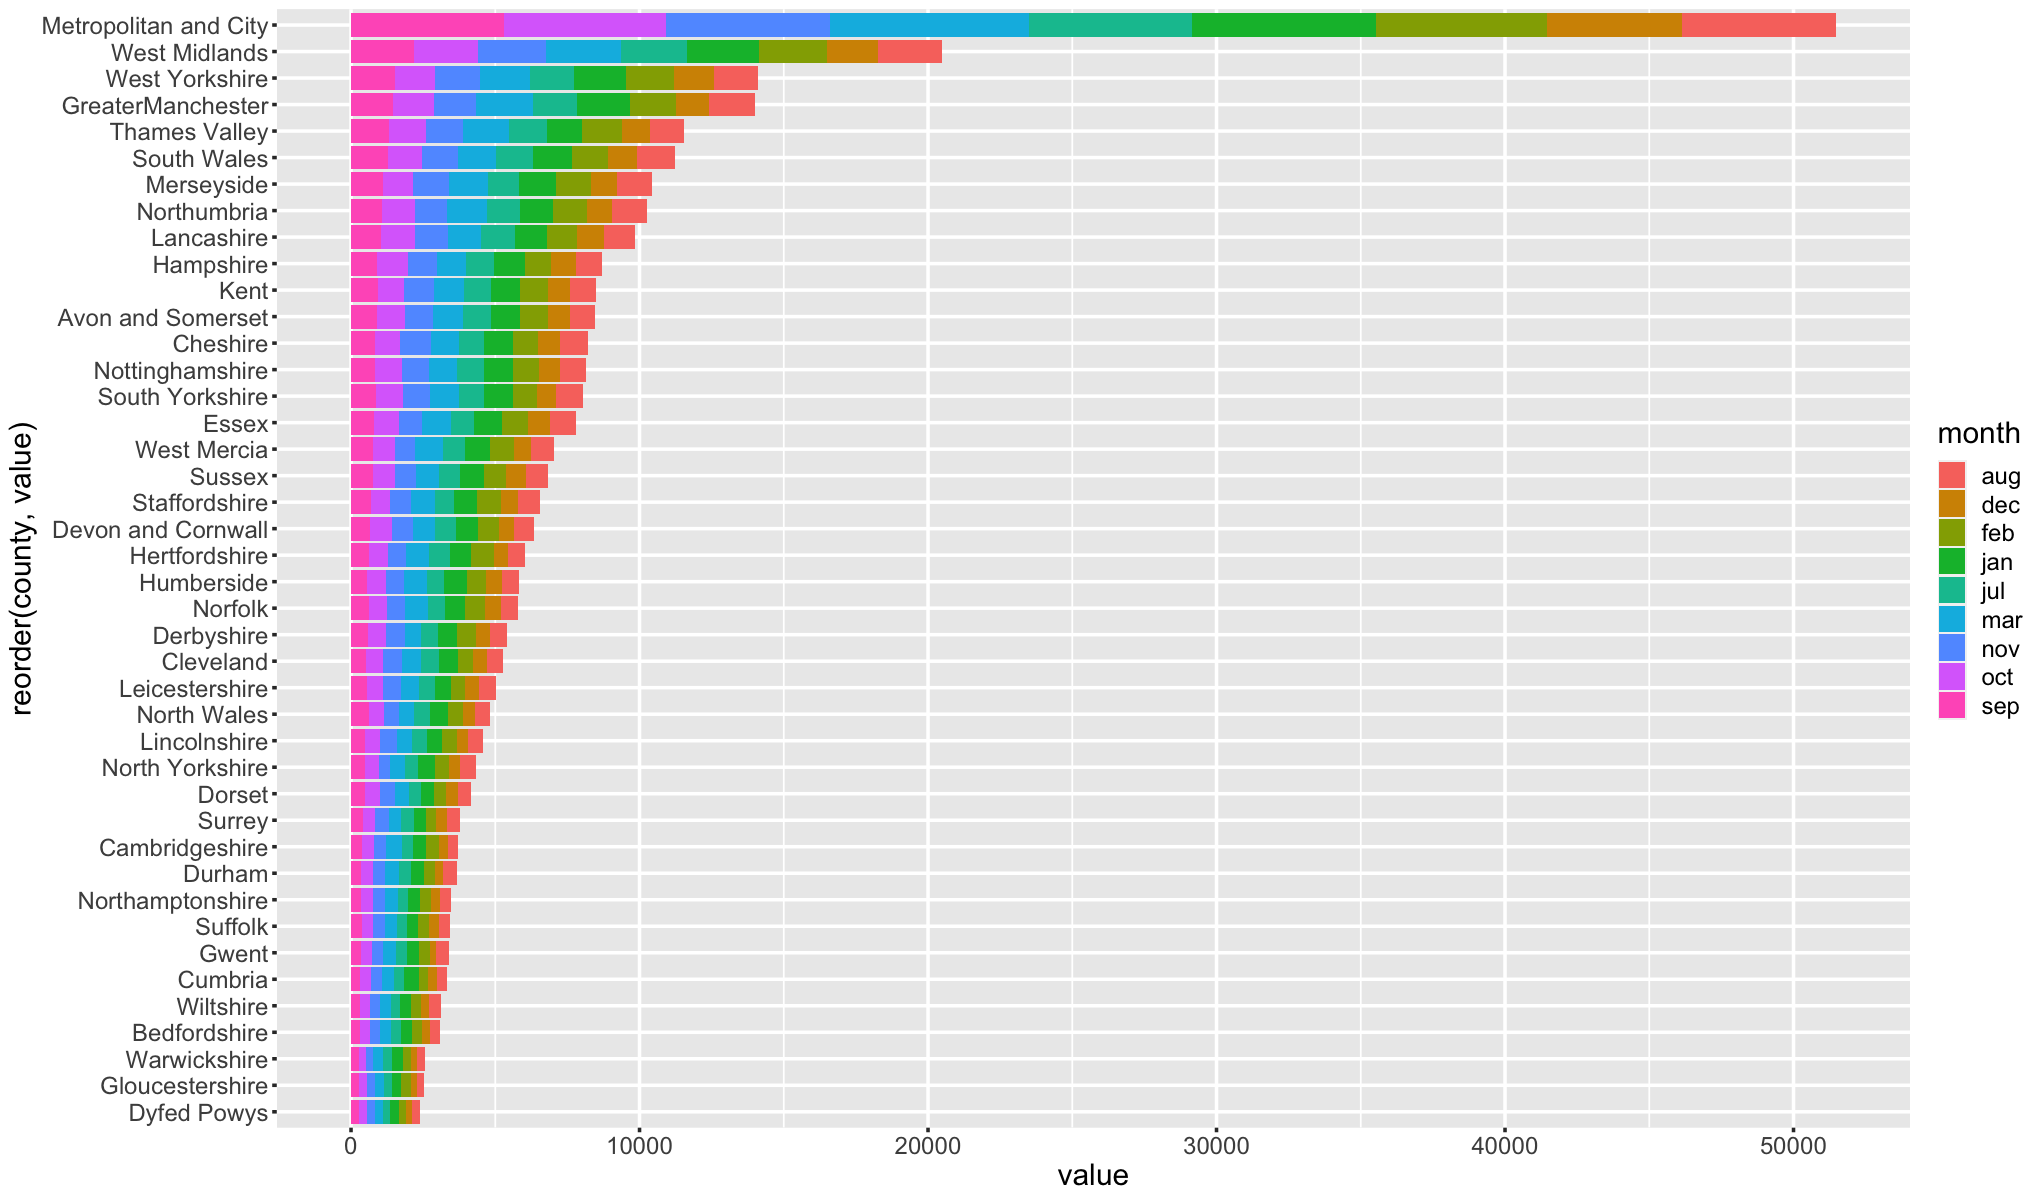

In [2783]:
# crimes
plot_graph(crime_df, "2017")

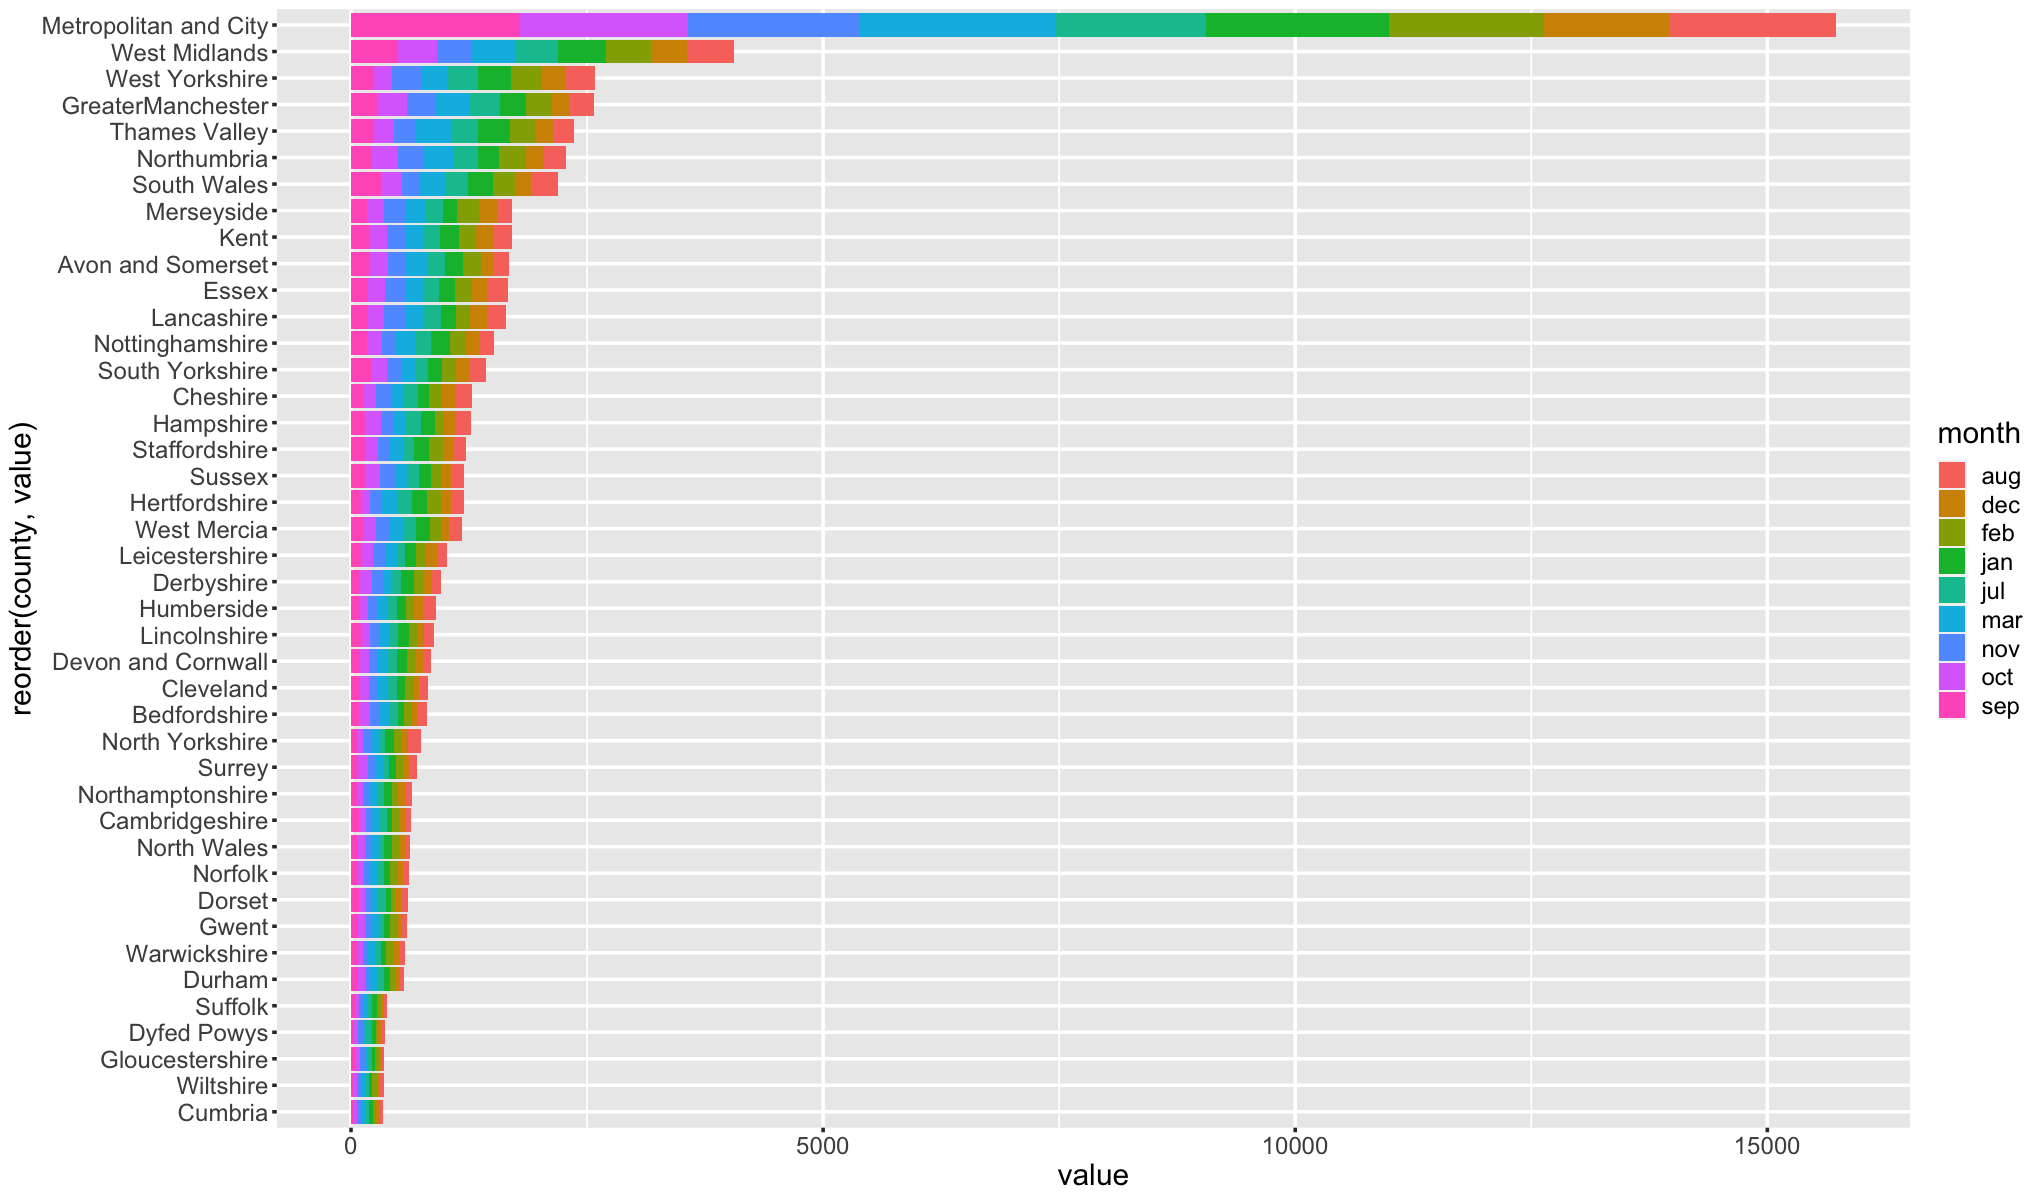

In [2784]:
# unsuccesfull crimes
plot_graph(uscrime_df, "2017")

### 2018

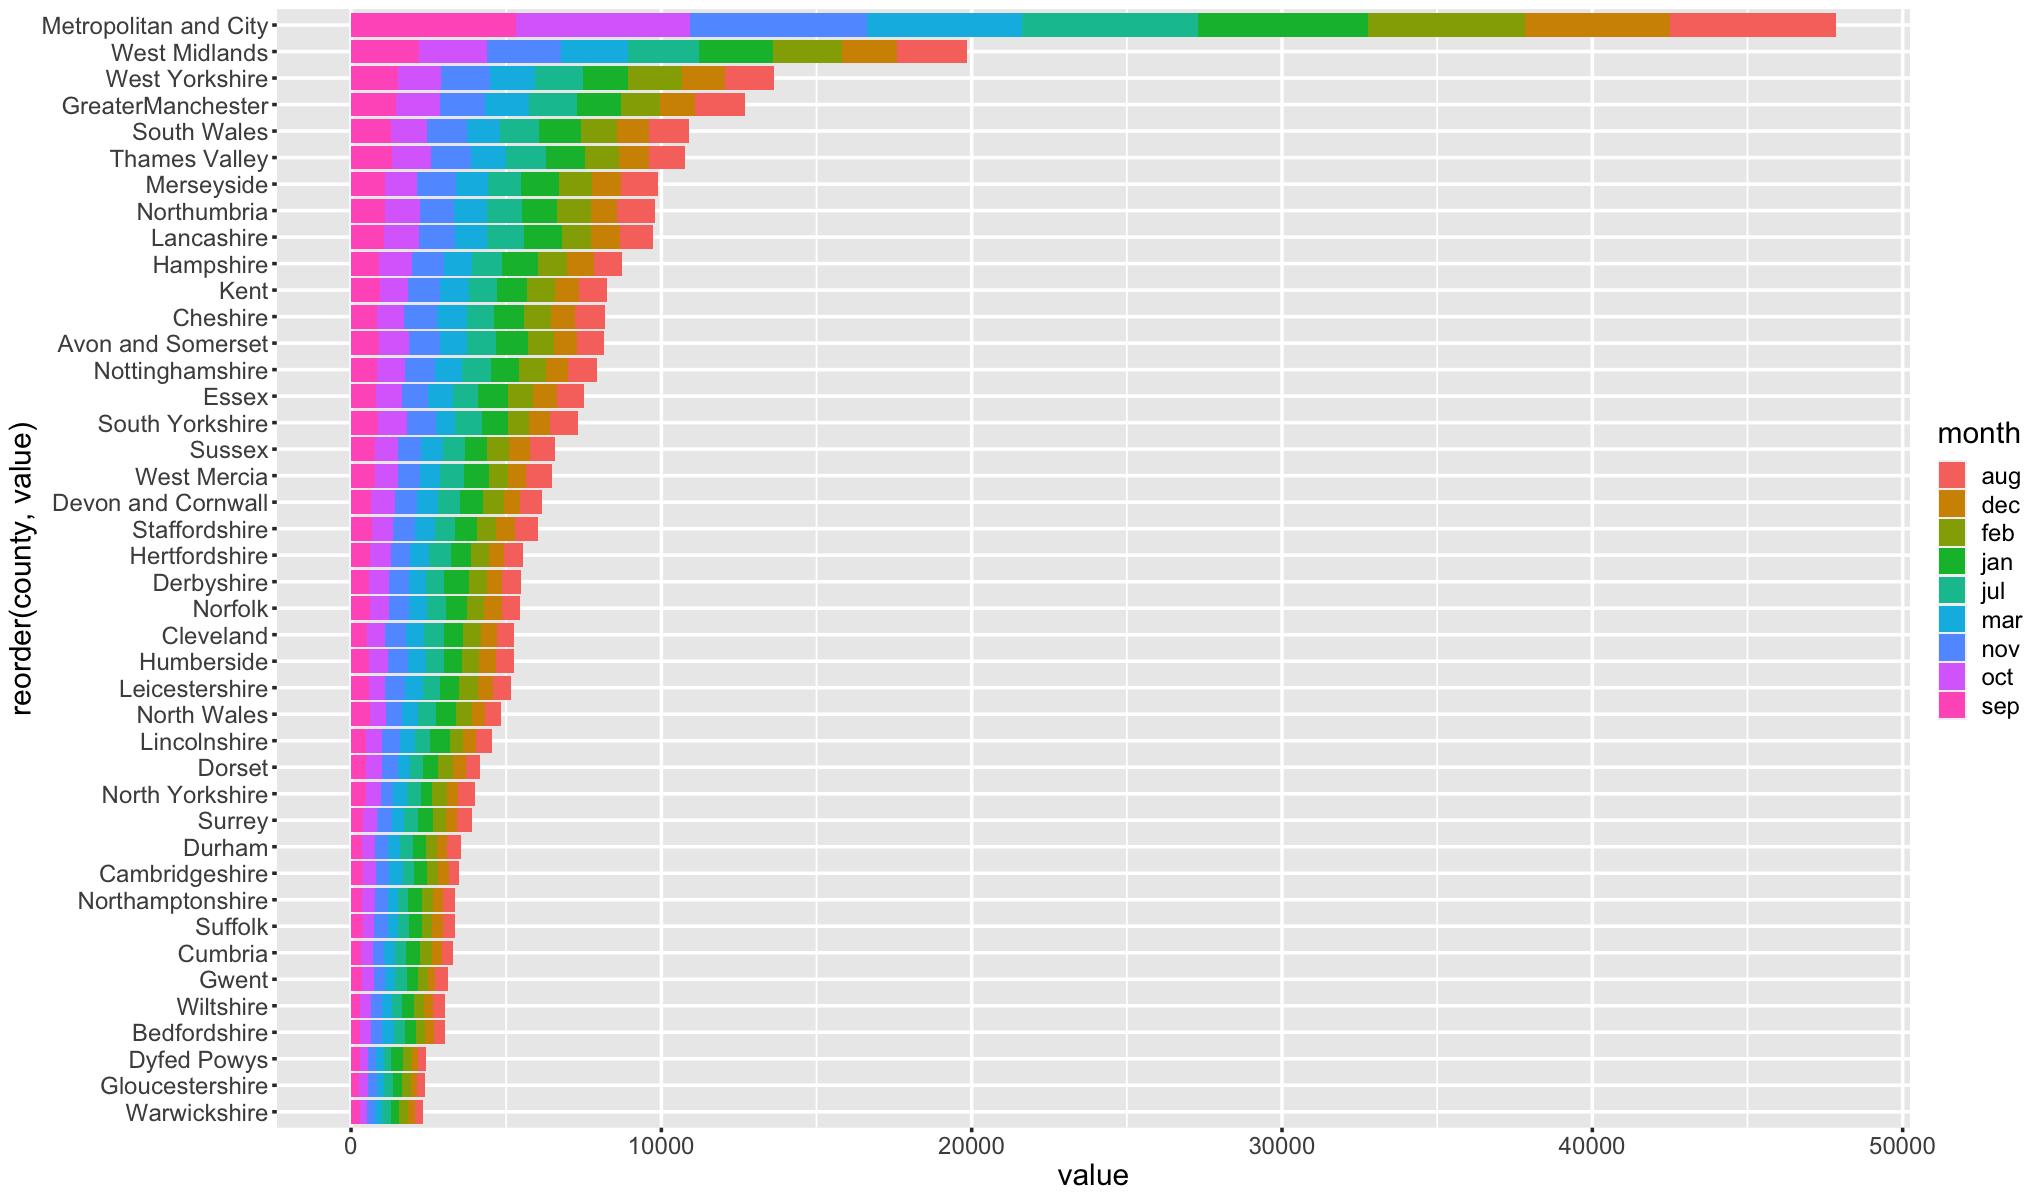

In [2785]:
# crimes
plot_graph(crime_df, "2018")

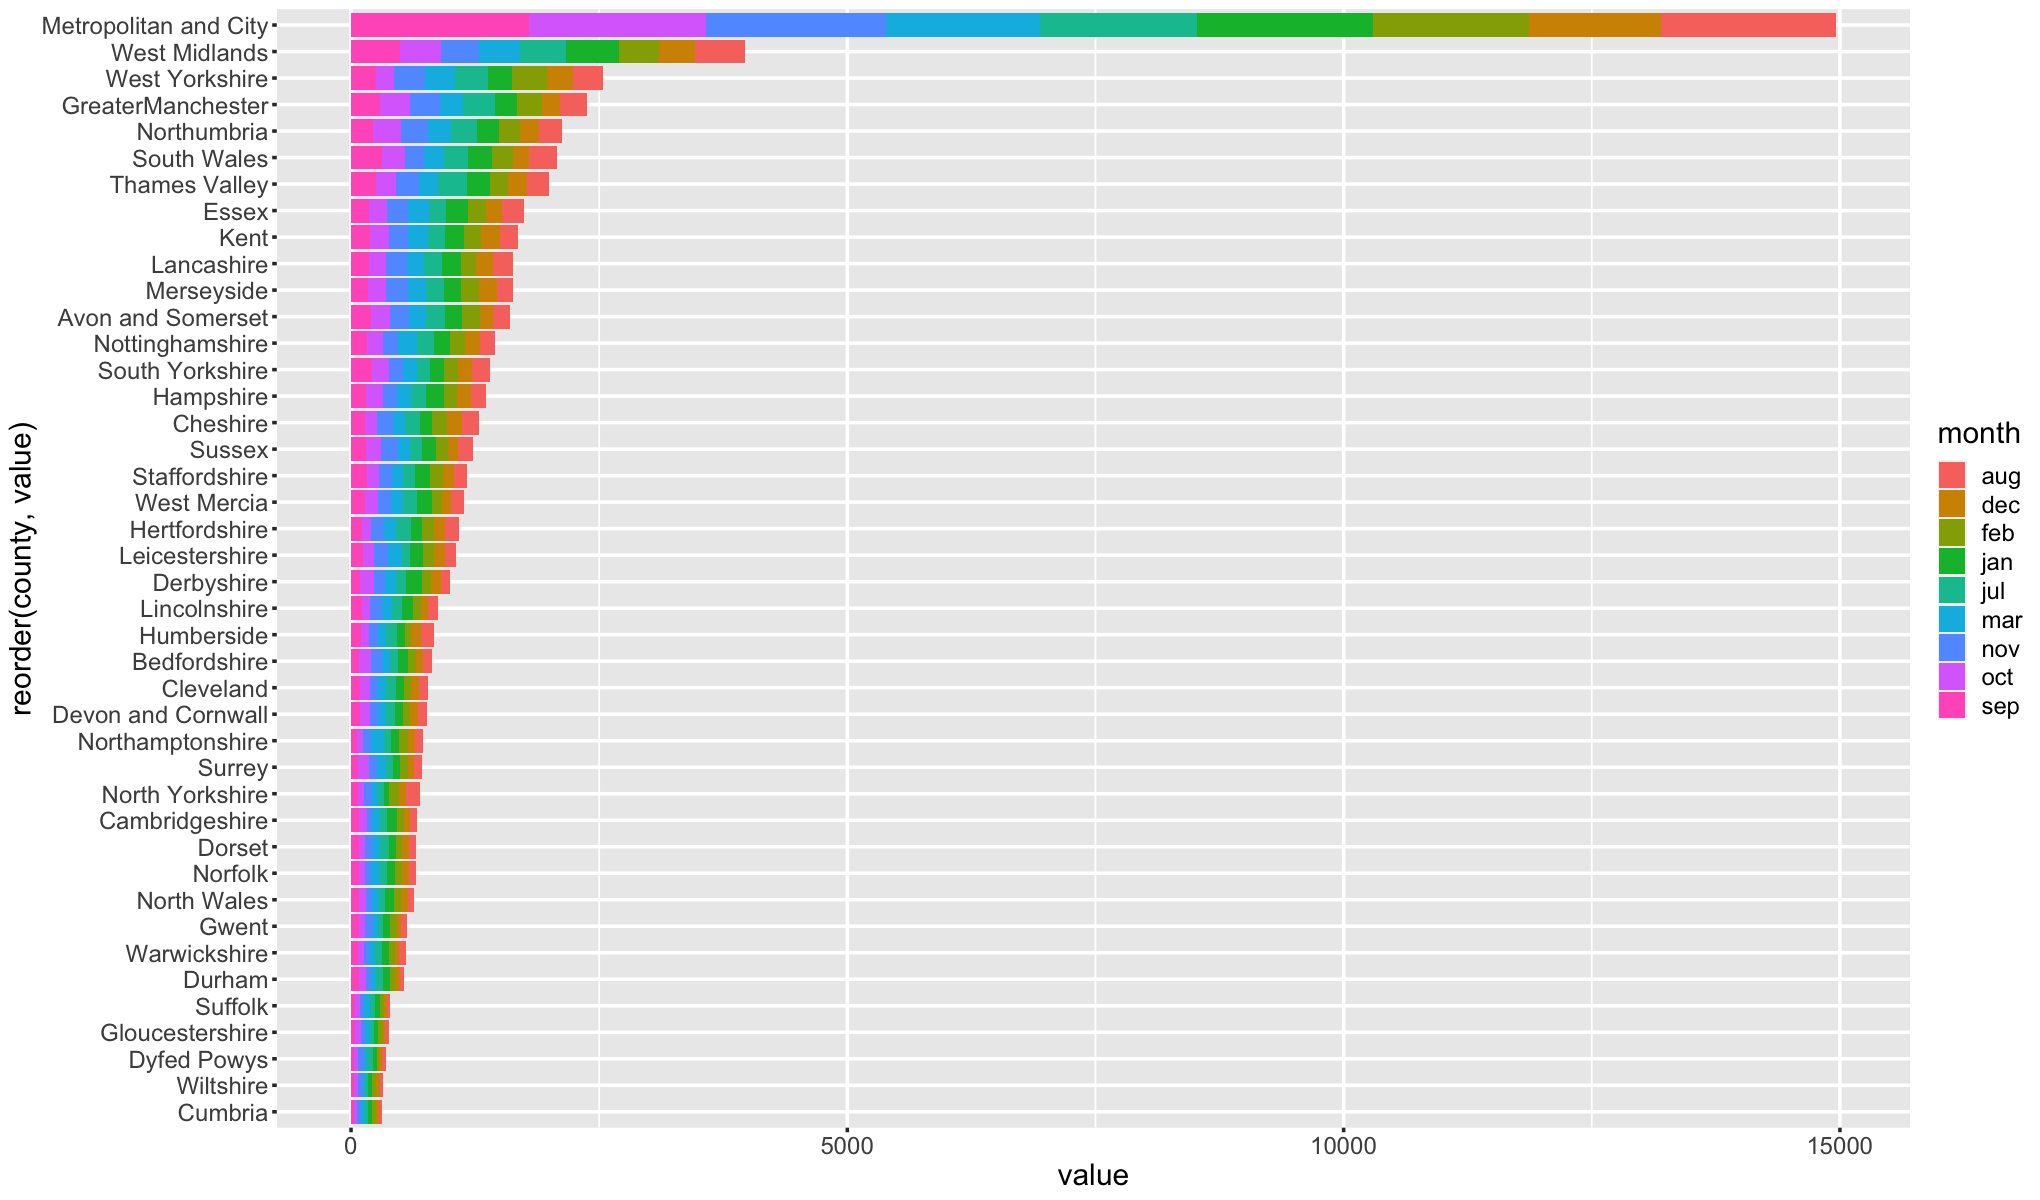

In [2786]:
# unsuccesfull crimes
plot_graph(uscrime_df, "2018")

## Analysis between Crime Types

In [2536]:
# By each year, find correlation and covariance between all crimes for crimes_df and unsucessful_crimes

## Correlation

In [2787]:
corr_matrix_graph <- function(dataframe){
  dataframe <- dplyr::select(dataframe, -c("year", "yearmon", "region"))
  num_cols <- sapply(dataframe, is.numeric)
  corr_matrix <- cor(dataframe[,num_cols])
  options(repr.plot.width = 8, repr.plot.height =8)
  corrplot(corr_matrix, type = "upper", order = "hclust", tl.cex = 0.7, tl.col = "black", is.corr = TRUE, mar = c(0, 0, 0, 0))  
  return(corr_matrix)
}

homicide  offences_against_the_person
homicide                                1.0000000 0.9515011                  
offences_against_the_person             0.9515011 1.0000000                  
sexual_offences                         0.9579689 0.9943394                  
burglary                                0.9101051 0.9790118                  
robbery                                 0.8858384 0.9536347                  
theft_and_handling                      0.8880334 0.9670619                  
fraud_and_forgery                       0.9559485 0.9893549                  
criminal_damage                         0.8997366 0.9777369                  
drugs_offences                          0.9254459 0.9825105                  
public_order_offences                   0.9083271 0.9816717                  
all_other_offences__excluding_motoring_ 0.6952949 0.8032042                  
motoring_offences                       0.9083968 0.9762848                  
                                        sexual_offences burglary  robbery  
homicide                                0.9579689       0.9101051 0.8858384
offences_against_the_person             0.9943394       0.9790118 0.9536347
sexual_offences                         1.0000000       0.9634214 0.9355086
burglary                                0.9634214       1.0000000 0.9832403
robbery                                 0.9355086       0.9832403 1.0000000
theft_and_handling                      0.9482149       0.9943886 0.9804214
fraud_and_forgery                       0.9848044       0.9674281 0.9522510
criminal_damage                         0.9608630       0.9958863 0.9794857
drugs_offences                          0.9692301       0.9903451 0.9832968
public_order_offences                   0.9670567       0.9957603 0.9813006
all_other_offences__excluding_motoring_ 0.7690738       0.8983177 0.9179145
motoring_offences                       0.9613408       0.9904232 0.9736156
                                        theft_and_handling fraud_and_forgery
homicide                                0.8880334          0.9559485        
offences_against_the_person             0.9670619          0.9893549        
sexual_offences                         0.9482149          0.9848044        
burglary                                0.9943886          0.9674281        
robbery                                 0.9804214          0.9522510        
theft_and_handling                      1.0000000          0.9509088        
fraud_and_forgery                       0.9509088          1.0000000        
criminal_damage                         0.9964191          0.9599358        
drugs_offences                          0.9843799          0.9837499        
public_order_offences                   0.9933622          0.9687834        
all_other_offences__excluding_motoring_ 0.9178853          0.7929680        
motoring_offences                       0.9874886          0.9663687        
                                        criminal_damage drugs_offences
homicide                                0.8997366       0.9254459     
offences_against_the_person             0.9777369       0.9825105     
sexual_offences                         0.9608630       0.9692301     
burglary                                0.9958863       0.9903451     
robbery                                 0.9794857       0.9832968     
theft_and_handling                      0.9964191       0.9843799     
fraud_and_forgery                       0.9599358       0.9837499     
criminal_damage                         1.0000000       0.9869342     
drugs_offences                          0.9869342       1.0000000     
public_order_offences                   0.9966350       0.9904563     
all_other_offences__excluding_motoring_ 0.9024802       0.8786819     
motoring_offences                       0.9901513       0.9863116     
                                        public_order_offences
homicide                                0.9083271   

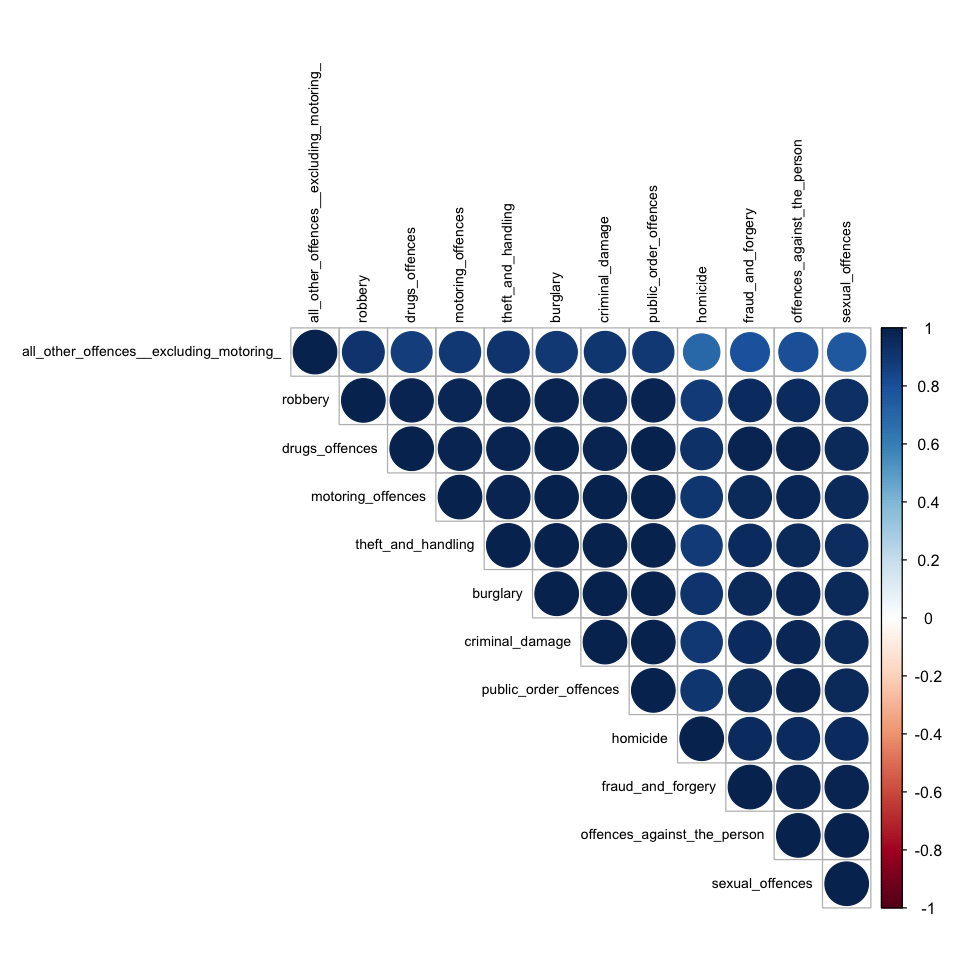

In [2794]:
corr_matrix_graph(crime_df)

homicide_us
homicide_us                                1.0000000  
offences_against_the_person_us             0.8945264  
sexual_offences_us                         0.9032741  
burglary_us                                0.8452261  
robbery_us                                 0.8379606  
theft_and_handling_us                      0.8389965  
fraud_and_forgery_us                       0.9114071  
criminal_damage_us                         0.8584456  
drugs_offences_us                          0.8933895  
public_order_offences_us                   0.8722736  
all_other_offences__excluding_motoring__us 0.6331142  
motoring_offences_us                       0.8880518  
admin_finalised_us                         0.9054649  
                                           offences_against_the_person_us
homicide_us                                0.8945264                     
offences_against_the_person_us             1.0000000                     
sexual_offences_us                         0.9864716                     
burglary_us                                0.9811510                     
robbery_us                                 0.9582616                     
theft_and_handling_us                      0.9790003                     
fraud_and_forgery_us                       0.9820228                     
criminal_damage_us                         0.9858030                     
drugs_offences_us                          0.9893199                     
public_order_offences_us                   0.9913442                     
all_other_offences__excluding_motoring__us 0.8237575                     
motoring_offences_us                       0.9935415                     
admin_finalised_us                         0.9788414                     
                                           sexual_offences_us burglary_us
homicide_us                                0.9032741          0.8452261  
offences_against_the_person_us             0.9864716          0.9811510  
sexual_offences_us                         1.0000000          0.9583413  
burglary_us                                0.9583413          1.0000000  
robbery_us                                 0.9333445          0.9713275  
theft_and_handling_us                      0.9504389          0.9898431  
fraud_and_forgery_us                       0.9764482          0.9528467  
criminal_damage_us                         0.9635646          0.9864885  
drugs_offences_us                          0.9726291          0.9761663  
public_order_offences_us                   0.9712478          0.9892553  
all_other_offences__excluding_motoring__us 0.7694213          0.8888081  
motoring_offences_us                       0.9789510          0.9790666  
admin_finalised_us                         0.9758355          0.9458527  
                                           robbery_us theft_and_handling_us
homicide_us                                0.8379606  0.8389965            
offences_against_the_person_us             0.9582616  0.9790003            
sexual_offences_us                         0.9333445  0.9504389            
burglary_us                                0.9713275  0.9898431            
robbery_us                                 1.0000000  0.9728598            
theft_and_handling_us                      0.9728598  1.0000000            
fraud_and_forgery_us                       0.9312770  0.9469459            
criminal_damage_us                         0.9606892  0.9909612            
drugs_offences_us                          0.9615602  0.9759628            
public_order_offences_us                   0.9687526  0.9907522            
all_other_offences__excluding_motoring__us 0.8986690  0.9075349            
motoring_offences_us                       0.9616517  0.9767354            
admin_finalised_us                         0.9307605  0.9400229            
                                           fraud_and_forgery_us
homicide_us                                0.9114071           
offences_

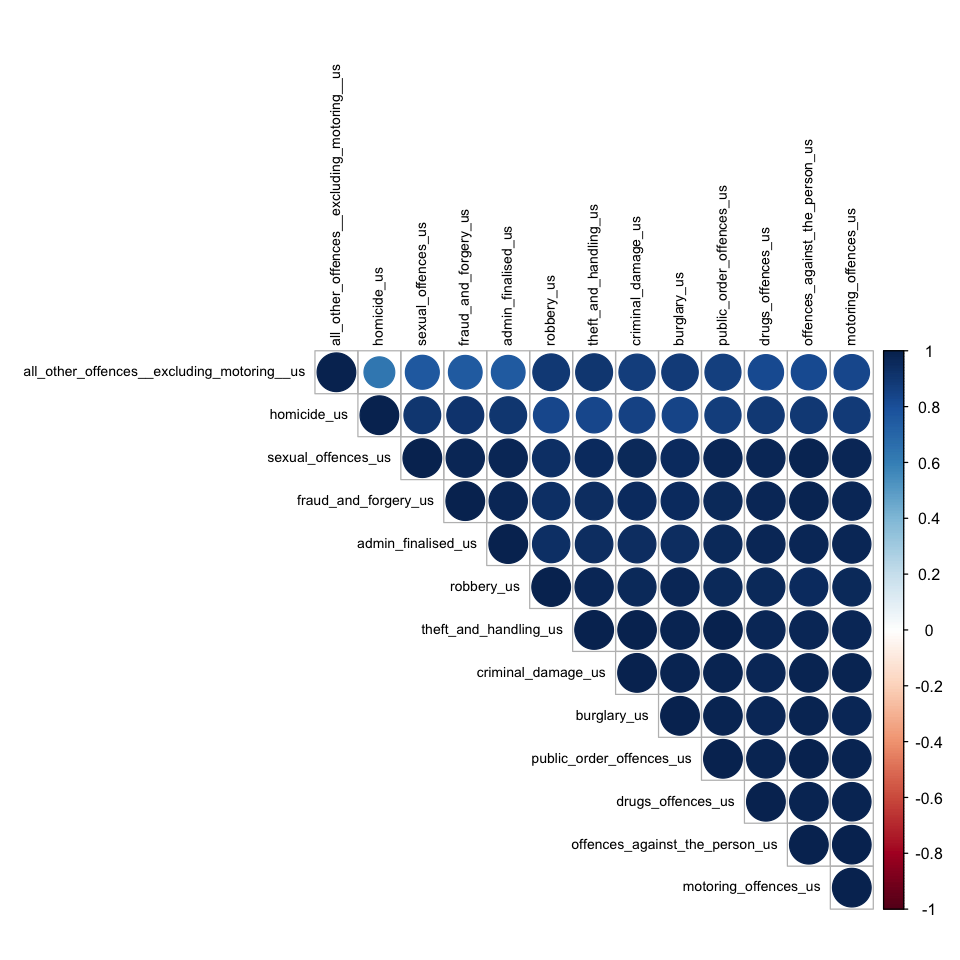

In [2793]:
# unsuccessful crimes
corr_matrix_graph(uscrime_df)

# Covarince

In [2790]:
cov_matrix_graph <- function(dataframe){
  dataframe <- dplyr::select(dataframe, -c("year", "yearmon", "region"))
  num_cols <- sapply(dataframe, is.numeric)
  num_cols <- names(num_cols[num_cols])
  cov_matrix <- cov(dataframe[,num_cols])
  options(repr.plot.width = 8, repr.plot.height =8)
  corrplot(cov_matrix, type = "upper", order = "hclust", tl.cex = 0.7, tl.col = "black", is.corr = FALSE, mar = c(0, 0, 0, 0))
  return(cov_matrix) 
}

homicide   offences_against_the_person
homicide                                  167.9471   18061.63                 
offences_against_the_person             18061.6300 2145471.23                 
sexual_offences                          1761.8329  206691.68                 
burglary                                 2303.8925  280113.23                 
robbery                                   748.3808   91059.51                 
theft_and_handling                      14040.1177 1728107.60                 
fraud_and_forgery                        1576.8431  184451.07                 
criminal_damage                          3623.7601  445083.10                 
drugs_offences                           7358.3816  882965.13                 
public_order_offences                    6198.1040  757108.18                 
all_other_offences__excluding_motoring_  2236.4957  292011.56                 
motoring_offences                       13975.6634 1697651.00                 
                                        sexual_offences burglary   robbery   
homicide                                  1761.833        2303.892   748.3808
offences_against_the_person             206691.677      280113.229 91059.5058
sexual_offences                          20139.747       26707.155  8654.7921
burglary                                 26707.155       38156.513 12520.6217
robbery                                   8654.792       12520.622  4249.7536
theft_and_handling                      164168.164      236971.252 77974.0046
fraud_and_forgery                        17788.720       24053.084  7901.3450
criminal_damage                          42378.565       60457.734 19844.3894
drugs_offences                           84391.530      118690.482 39328.8705
public_order_offences                    72261.882      102416.388 33683.2716
all_other_offences__excluding_motoring_  27089.920       43553.897 14852.4067
motoring_offences                       161962.653      229676.017 75349.4245
                                        theft_and_handling fraud_and_forgery
homicide                                  14040.12           1576.843       
offences_against_the_person             1728107.60         184451.066       
sexual_offences                          164168.16          17788.720       
burglary                                 236971.25          24053.084       
robbery                                   77974.00           7901.345       
theft_and_handling                      1488368.06         147659.617       
fraud_and_forgery                        147659.62          16200.762       
criminal_damage                          377793.92          37972.368       
drugs_offences                           736822.52          76824.086       
public_order_offences                    638106.45          64926.906       
all_other_offences__excluding_motoring_  277943.36          25051.636       
motoring_offences                       1430203.39         146022.942       
                                        criminal_damage drugs_offences
homicide                                  3623.76         7358.382    
offences_against_the_person             445083.10       882965.125    
sexual_offences                          42378.56        84391.530    
burglary                                 60457.73       118690.482    
robbery                                  19844.39        39328.870    
theft_and_handling                      377793.92       736822.520    
fraud_and_forgery                        37972.37        76824.086    
criminal_damage                          96586.30       188187.570    
drugs_offences                          188187.57       376434.977    
public_order_offences                   163088.82       319970.990    
all_other_offences__excluding_motoring_  69615.86       133810.246    
motoring_offences                       365316.96       718405.514    
                                        public_order_offences
homicide     

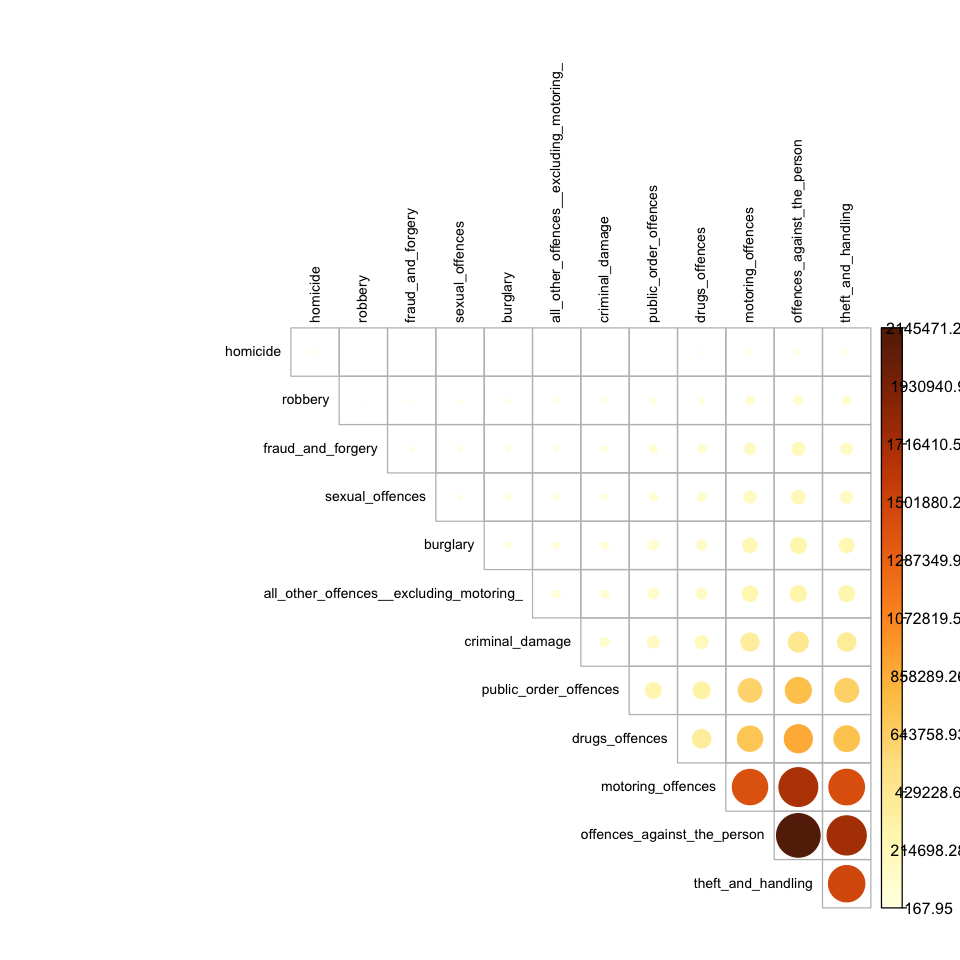

In [2791]:
# crimes
cov_matrix_graph(crime_df)

homicide_us
homicide_us                                  11.13536 
offences_against_the_person_us             1321.32609 
sexual_offences_us                          159.78740 
burglary_us                                  96.11583 
robbery_us                                   50.21955 
theft_and_handling_us                       313.95276 
fraud_and_forgery_us                         63.63722 
criminal_damage_us                          154.96543 
drugs_offences_us                           125.31352 
public_order_offences_us                    273.88190 
all_other_offences__excluding_motoring__us  102.27226 
motoring_offences_us                        595.35498 
admin_finalised_us                          387.43580 
                                           offences_against_the_person_us
homicide_us                                  1321.326                    
offences_against_the_person_us             195942.850                    
sexual_offences_us                          23148.353                    
burglary_us                                 14800.296                    
robbery_us                                   7618.086                    
theft_and_handling_us                       48595.891                    
fraud_and_forgery_us                         9095.633                    
criminal_damage_us                          23606.128                    
drugs_offences_us                           18407.992                    
public_order_offences_us                    41290.260                    
all_other_offences__excluding_motoring__us  17651.751                    
motoring_offences_us                        88356.041                    
admin_finalised_us                          55558.818                    
                                           sexual_offences_us burglary_us
homicide_us                                  159.7874            96.11583
offences_against_the_person_us             23148.3532         14800.29607
sexual_offences_us                          2810.2285          1731.25421
burglary_us                                 1731.2542          1161.28723
robbery_us                                   888.6072           594.47357
theft_and_handling_us                       5649.9813          3782.58054
fraud_and_forgery_us                        1083.0953           679.42186
criminal_damage_us                          2763.2588          1818.57722
drugs_offences_us                           2167.3200          1398.29439
public_order_offences_us                    4844.6156          3172.02561
all_other_offences__excluding_motoring__us  1974.5072          1466.22799
motoring_offences_us                       10425.9900          6702.97475
admin_finalised_us                          6633.2042          4133.03711
                                           robbery_us theft_and_handling_us
homicide_us                                  50.21955   313.9528           
offences_against_the_person_us             7618.08582 48595.8915           
sexual_offences_us                          888.60722  5649.9813           
burglary_us                                 594.47357  3782.5805           
robbery_us                                  322.54782  1959.2928           
theft_and_handling_us                      1959.29277 12574.8849           
fraud_and_forgery_us                        349.96336  2221.8965           
criminal_damage_us                          933.36145  6011.4407           
drugs_offences_us                           725.90282  4600.3434           
public_order_offences_us                   1637.07426 10453.8319           
all_other_offences__excluding_motoring__us  781.30479  4926.5059           
motoring_offences_us                       3469.76756 22004.6512           
admin_finalised_us                         2143.43819 13516.5669           
                                           fraud_and_forgery_us
homicide_us                                  63.63722          
offences_

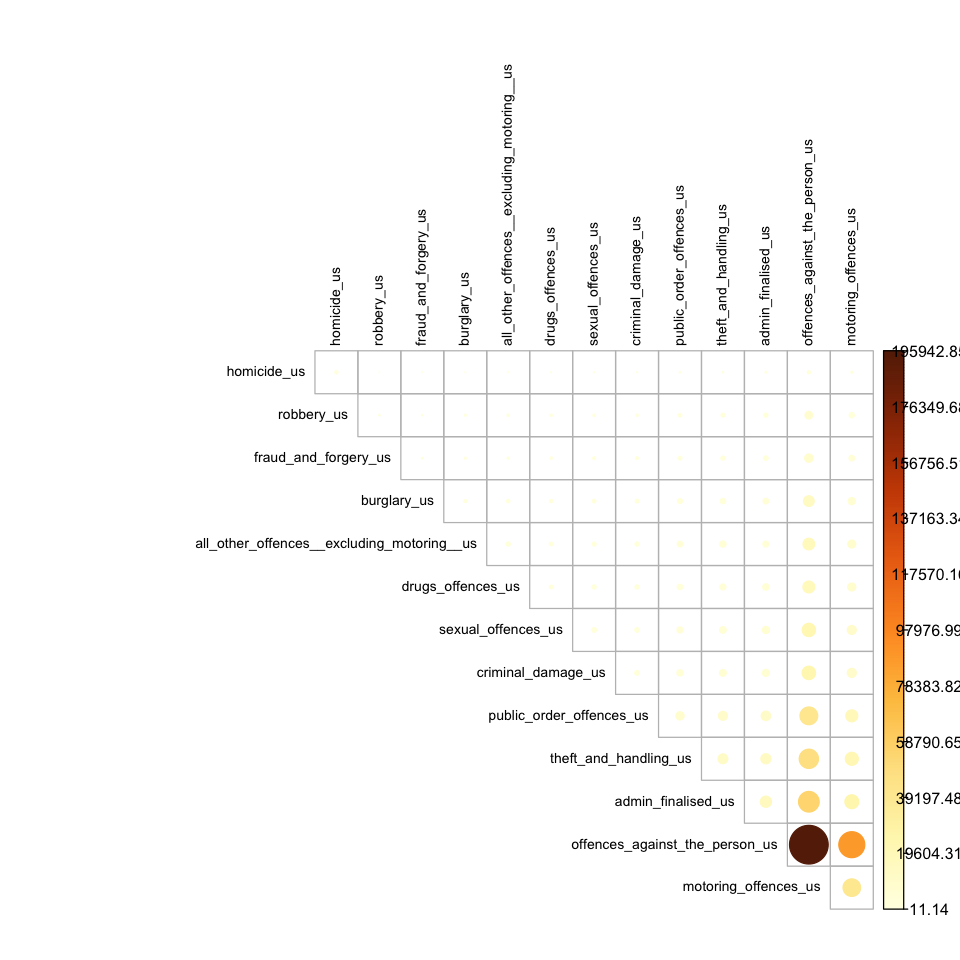

In [2792]:
# unsuccessful crimes
cov_matrix_graph(uscrime_df)

## Trend Analysis between Succesful & Unsuccesful Crimes

In [2559]:
group_and_combine_dfs <- function(crime, uscrime) {
  crime <- crime[crime$county == "National", ]
  uscrime <- uscrime[uscrime$county == "National", ]

  numeric_columns_crime <- dplyr::select(crime, -c("county", "year", "month" ,"yearmon", "region"))
  crime$no_of_crimes <- rowSums(numeric_columns_crime)
    
  numeric_columns_uscrime <- dplyr::select(uscrime, -c("county", "year", "month" ,"yearmon", "region"))
  uscrime$no_of_uscrimes <- rowSums(numeric_columns_uscrime)
  
  crime <- dplyr::select(crime, c("yearmon", "no_of_crimes"))
  uscrime <- dplyr::select(uscrime, c("yearmon", "no_of_uscrimes"))
  
  merged_df <- merge(crime, uscrime, by.x = "yearmon", by.y = "yearmon")
  
  return(merged_df)
}

In [2560]:
crime_uscrime_df <- group_and_combine_dfs(crime_df, uscrime_df)

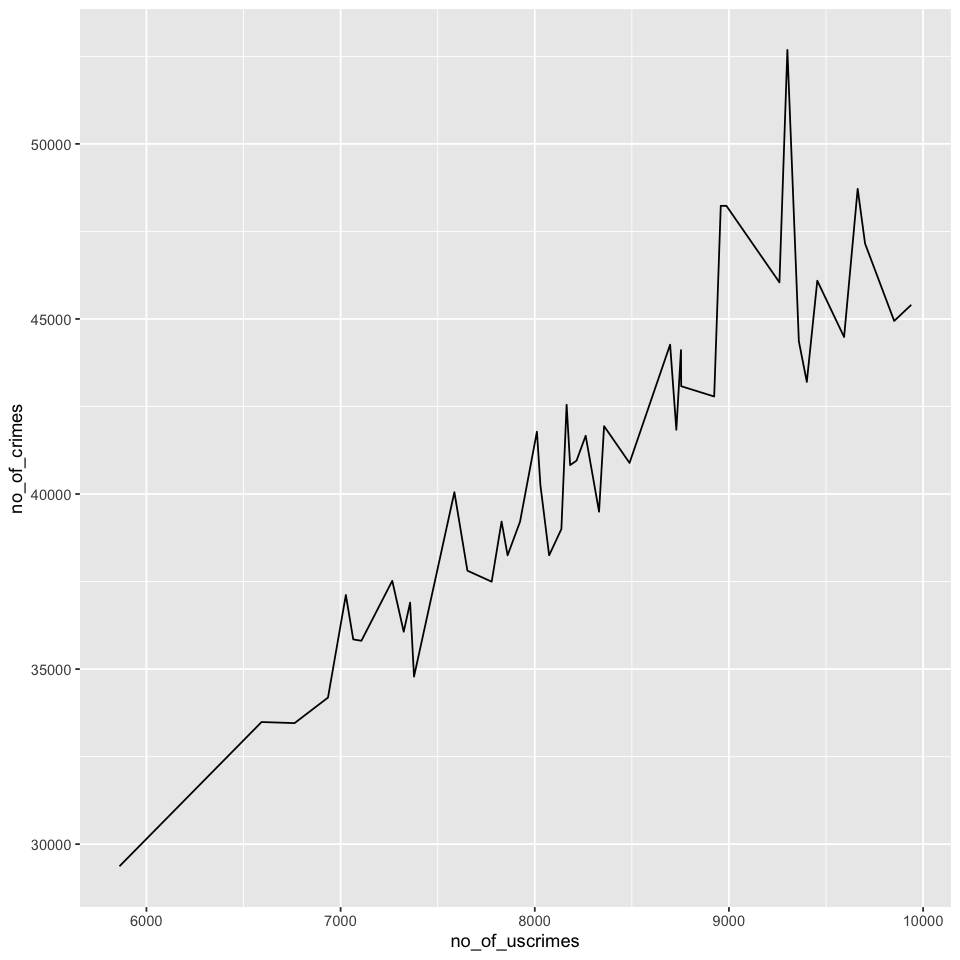

In [2561]:
ggplot(crime_uscrime_df, aes(x=no_of_uscrimes, y=no_of_crimes, group=1)) + geom_line()

# Predictive Analytics

-- The rate of un-succesful crimes is increasing or decreasing every year, which imposes either the courst system is gettng better or police is geeting better.

-- The number of crimes have increased every year.

-- A, B region has more increase in crimes than C, D region.

-- The number of crimes increase by the end of the year as compared to the start of the year.



## Regression

## Linear Regression

In [2816]:
lr_split_data <- function(dataframe){
  dataframe <- dataframe[dataframe$county == "National", ]
  dataframe$yearmon <- as.Date(dataframe$yearmon)
    
  numeric_columns_df <- dplyr::select(dataframe, -c("county", "year", "month" ,"yearmon", "region"))
  dataframe$crimes <- rowSums(numeric_columns_df)
  
  test <- dataframe[dataframe$year == 2018,]
  train <- dataframe[dataframe$year != 2018,]
  
  test <- dplyr::select(test, -c("county", "year", "month", "region"))
  train <- dplyr::select(train, -c("county", "year", "month", "region"))
  
  return(list(test, train))
}

In [2563]:
linear_regression <- function(test, train){
  # training the model   
  model <- lm(crimes ~ yearmon, data = train)
    
  # using the model for predictions on test data
  preds <- predict(model, test, type = "response")
  actuals_preds <- data.frame(cbind(actuals=test$crimes, predicted=preds))
 
  # calcultaing correaltion   
  correlation_accuracy <- cor(actuals_preds)
    
  return(list(model, actuals_preds, correlation_accuracy))
}

In [2818]:
crime_test_train = lr_split_data(crime_df)
uscrime_test_train = lr_split_data(uscrime_df)

#### Crimes

In [2819]:
# Train Dataset
summary(dplyr::select(crime_test_train[[2]], c("yearmon", "crimes")))

    yearmon               crimes     
 Min.   :2014-01-01   Min.   :29367  
 1st Qu.:2014-11-08   1st Qu.:38249  
 Median :2015-09-16   Median :41308  
 Mean   :2015-11-08   Mean   :41317  
 3rd Qu.:2016-10-24   3rd Qu.:44336  
 Max.   :2017-12-01   Max.   :52683  

In [2820]:
# Test Dataset
summary(dplyr::select(crime_test_train[[1]], c("yearmon", "crimes")))

    yearmon               crimes     
 Min.   :2018-01-01   Min.   :29367  
 1st Qu.:2018-03-01   1st Qu.:33488  
 Median :2018-08-01   Median :35808  
 Mean   :2018-07-01   Mean   :34804  
 3rd Qu.:2018-10-01   3rd Qu.:36066  
 Max.   :2018-12-01   Max.   :37521  

In [2567]:
lr_res = linear_regression(crime_test_train[[1]], crime_test_train[[2]])

In [2568]:
lr_model = lr_res[[1]]
lr_actual_preds = lr_res[[2]]
lr_accuracy = lr_res[[3]]

In [2569]:
summary(lr_model)


Call:
lm(formula = crimes ~ yearmon, data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-5273.2 -1805.3   297.9  1929.6  5366.7 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.898e+05  1.530e+04  12.401 2.76e-15 ***
yearmon     -8.864e+00  9.135e-01  -9.704 4.56e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2537 on 40 degrees of freedom
Multiple R-squared:  0.7019,	Adjusted R-squared:  0.6944 
F-statistic: 94.17 on 1 and 40 DF,  p-value: 4.557e-12


In [2570]:
lr_accuracy

actuals  predicted
actuals   1.000000 0.234283 
predicted 0.234283 1.000000

In [2571]:
head(lr_actual_preds)

actuals predicted
1807 37521   34365.38 
1850 33488   34090.58 
1893 33457   33842.38 
1936 35808   32760.92 
1979 36066   32486.12 
2022 34786   32211.32

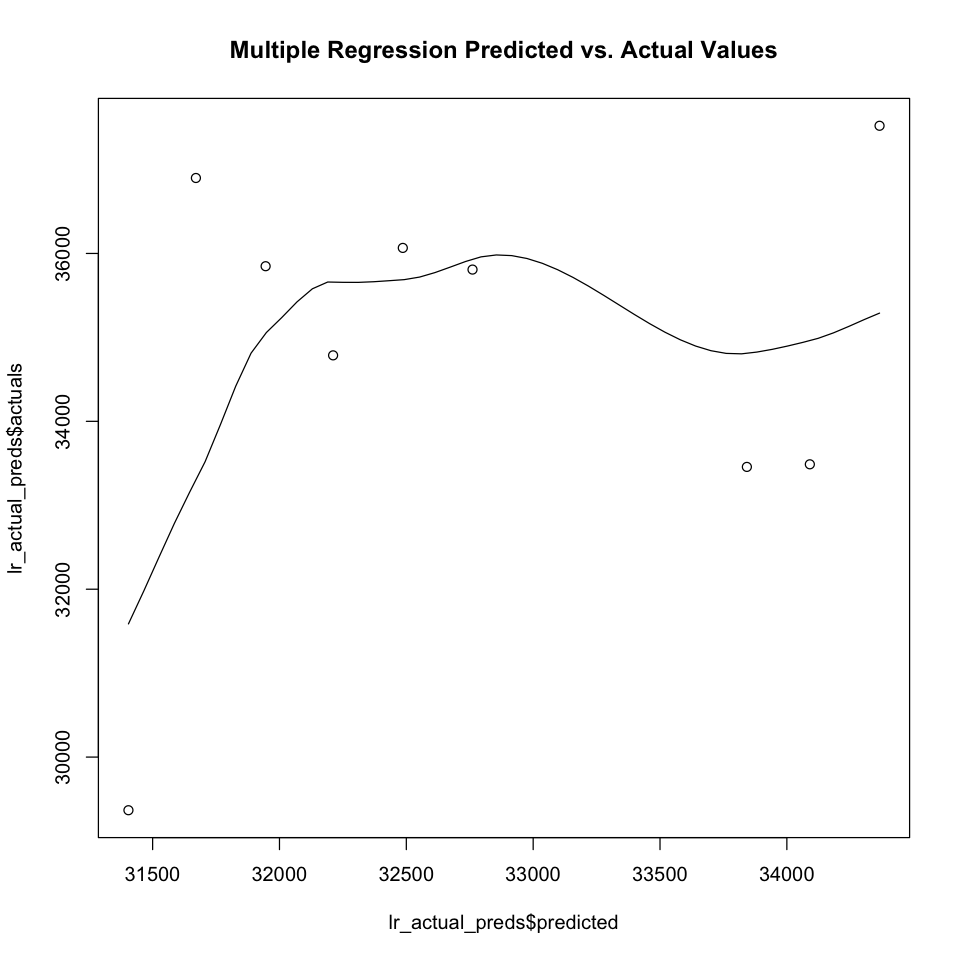

In [2796]:
scatter.smooth(x=lr_actual_preds$predicted, y=lr_actual_preds$actuals, main="Linear Regression Predicted vs. Actual Values")

In [2573]:
d = lr_actual_preds$actuals - lr_actual_preds$predicted
# Mean Absolute Error 
mae = mean(abs(d))

# Mean Absolute Squared Error
mse = mean((d)^2)

# Root Mean Absolute Sqaured Error
rmse = sqrt(mse)

In [2574]:
list(mae, mse, rmse)

[[1]]
[1] 2723.767

[[2]]
[1] 9546384

[[3]]
[1] 3089.722

### Multiple Linear Regression

In [2575]:
# With all crime count summed up
# 2: Advanced: http://r-statistics.co/Linear-Regression.html
# https://connectglosac-my.sharepoint.com/:p:/r/personal/s4214832_glos_ac_uk/_layouts/15/Doc.aspx?sourcedoc=%7BEE34BD4E-3C61-435C-812D-8F5A06B9FC39%7D&file=Week%207%20Linear%20regression.pptx&action=edit&mobileredirect=true

In [2821]:
split_data <- function(dataframe){
  dataframe <- dataframe[dataframe$county != "National", ]
  dataframe$yearmon <- as.Date(dataframe$yearmon)
  
  numeric_columns_df <- dplyr::select(dataframe, -c("county", "year", "month" ,"yearmon", "region"))
  dataframe$crimes <- rowSums(numeric_columns_df)

  test <- dataframe[dataframe$year == 2018,]
  train <- dataframe[dataframe$year != 2018,]
  
    
  return(list(test, train))
}

In [2577]:
multiple_regression <- function(test, train){
  # training the model   
  model <- lm(crimes ~ county + year + month, data = train)
    
  # using the model for predictions on test data
  preds <- predict(model, test, type = "response")
  actuals_preds <- data.frame(cbind(actuals=test$crimes, predicted=preds))
 
  # calcultaing correaltion   
  correlation_accuracy <- cor(actuals_preds)
    
  return(list(model, actuals_preds, correlation_accuracy))
}

In [2822]:
crime_test_train = split_data(crime_df)
uscrime_test_train = split_data(uscrime_df)

#### Crimes

In [2823]:
# Train Dataset
summary(dplyr::select(crime_test_train[[2]], c("county", "year", "month", "crimes")))

    county               year         month               crimes      
 Length:1764        Min.   :2014   Length:1764        Min.   :  70.0  
 Class :character   1st Qu.:2014   Class :character   1st Qu.: 476.0  
 Mode  :character   Median :2015   Mode  :character   Median : 734.0  
                    Mean   :2015                      Mean   : 983.7  
                    3rd Qu.:2016                      3rd Qu.:1107.2  
                    Max.   :2017                      Max.   :8194.0  

In [2824]:
# Test Dataset
summary(dplyr::select(crime_test_train[[1]], c("county", "year", "month", "crimes")))

    county               year         month               crimes      
 Length:378         Min.   :2018   Length:378         Min.   : 190.0  
 Class :character   1st Qu.:2018   Class :character   1st Qu.: 408.2  
 Mode  :character   Median :2018   Mode  :character   Median : 626.0  
                    Mean   :2018                      Mean   : 828.7  
                    3rd Qu.:2018                      3rd Qu.: 942.0  
                    Max.   :2018                      Max.   :5700.0  

In [2581]:
mr_res = multiple_regression(crime_test_train[[1]], crime_test_train[[2]])

In [2582]:
mr_model = mr_res[[1]]
mr_actual_preds = mr_res[[2]]
mr_accuracy = mr_res[[3]]

In [2584]:
summary(mr_model)


Call:
lm(formula = crimes ~ county + year + month, data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-1711.71   -69.02     1.28    63.95  1372.47 

Coefficients:
                              Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 147114.215   7180.806  20.487  < 2e-16 ***
countyBedfordshire            -750.762     35.636 -21.067  < 2e-16 ***
countyCambridgeshire          -671.738     35.636 -18.850  < 2e-16 ***
countyCheshire                -222.429     35.636  -6.242 5.45e-10 ***
countyCleveland               -408.405     35.636 -11.460  < 2e-16 ***
countyCumbria                 -675.929     35.636 -18.967  < 2e-16 ***
countyDerbyshire              -426.643     35.636 -11.972  < 2e-16 ***
countyDevon and Cornwall      -309.738     35.636  -8.692  < 2e-16 ***
countyDorset                  -649.190     35.636 -18.217  < 2e-16 ***
countyDurham                  -636.238     35.636 -17.854  < 2e-16 ***
countyDyfed Powys             -750

In [2585]:
mr_accuracy

actuals   predicted
actuals   1.0000000 0.9890405
predicted 0.9890405 1.0000000

In [2586]:
head(mr_actual_preds)

actuals predicted
1808 1026    1014.0812
1809  363     263.3192
1810  404     342.3431
1811  973     791.6526
1812  638     605.6764
1813  468     338.1526

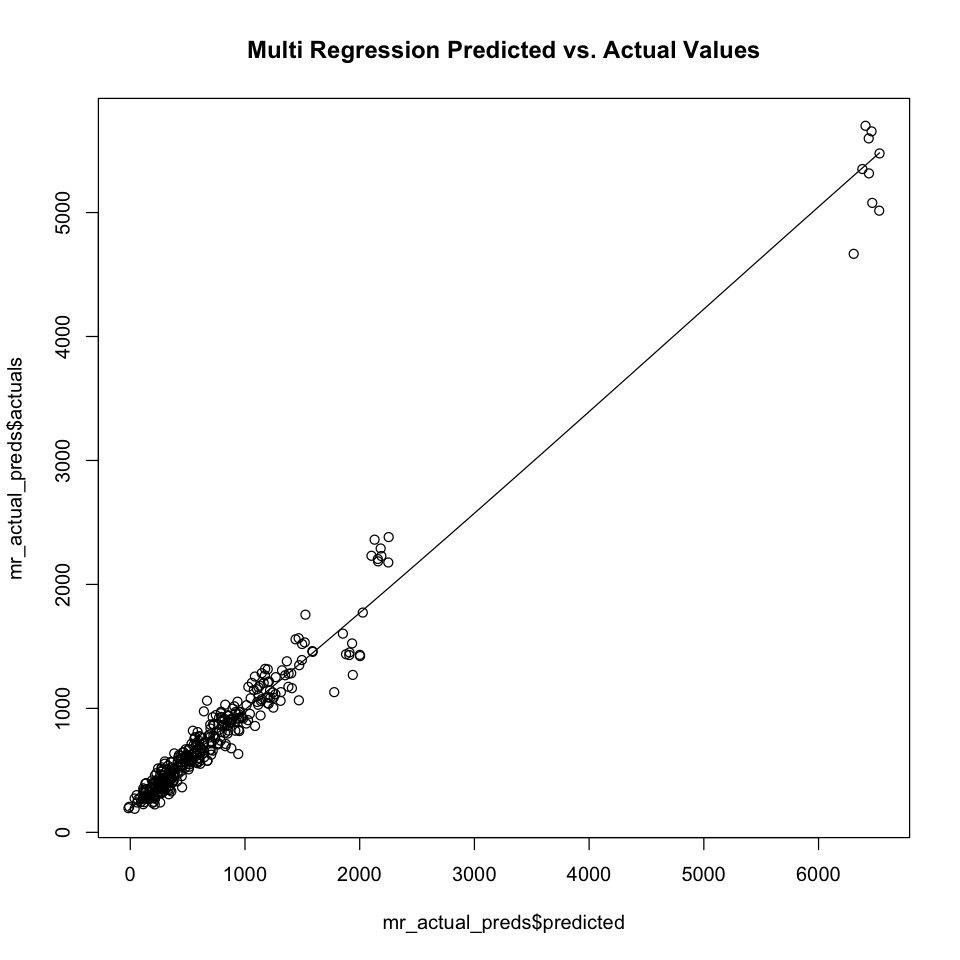

In [2587]:
scatter.smooth(x=mr_actual_preds$predicted, y=mr_actual_preds$actuals, main="Multi Regression Predicted vs. Actual Values")

In [2588]:
d = mr_actual_preds$actuals - mr_actual_preds$predicted
# Mean Absolute Error 
mae = mean(abs(d))

# Mean Absolute Squared Error
mse = mean((d)^2)

# Root Mean Absolute Sqaured Error
rmse = sqrt(mse)

In [2589]:
list(mae, mse, rmse)

[[1]]
[1] 146.095

[[2]]
[1] 55675.07

[[3]]
[1] 235.9556

## Clustering

In [2590]:
# -- kmeans, and etc
# The goal of the clustering is to group different number of crimes in to clusters.
# Un-supervised 
# KMEANS: https://www.geeksforgeeks.org/clustering-in-r-programming/
# Hierarichal clustering https://www.geeksforgeeks.org/hierarchical-clustering-in-r-programming/

In [2591]:
remove_non_numeric_cols <- function(dataframe) {
  dataframe <- dplyr::select(dataframe, -c("county", "year", "month" ,"yearmon", "region"))
  return(dataframe)
}

### KMeans

In [2592]:
kmeans_clustering <- function(dataframe, clusters){
  dataframe <- scale(dataframe)
  model <- kmeans(dataframe, centers = clusters, nstart = 25)
  return(model)
}

#### Crimes

In [2593]:
km_data = remove_non_numeric_cols(crime_df)

In [2797]:
summary(km_data)

    homicide       offences_against_the_person sexual_offences  
 Min.   :  0.000   Min.   :   29.0             Min.   :   0.00  
 1st Qu.:  0.000   1st Qu.:  115.0             1st Qu.:   8.00  
 Median :  1.000   Median :  179.0             Median :  15.00  
 Mean   :  3.798   Mean   :  454.9             Mean   :  43.78  
 3rd Qu.:  3.000   3rd Qu.:  272.0             3rd Qu.:  29.00  
 Max.   :131.000   Max.   :11741.0             Max.   :1179.00  
    burglary          robbery       theft_and_handling fraud_and_forgery
 Min.   :   1.00   Min.   :  0.00   Min.   :   13.0    Min.   :   0.00  
 1st Qu.:  14.00   1st Qu.:  2.00   1st Qu.:   95.0    1st Qu.:   8.00  
 Median :  23.00   Median :  5.00   Median :  147.0    Median :  13.00  
 Mean   :  60.09   Mean   : 19.33   Mean   :  373.1    Mean   :  38.57  
 3rd Qu.:  38.00   3rd Qu.: 10.00   3rd Qu.:  237.0    3rd Qu.:  21.00  
 Max.   :1715.00   Max.   :650.00   Max.   :11057.0    Max.   :1075.00  
 criminal_damage   drugs_offences 

In [2594]:
# Clusters == 4

In [2595]:
km_model = kmeans_clustering(km_data, 4)

In [2798]:
summary(km_model)

             Length Class  Mode   
cluster      2193   -none- numeric
centers        72   -none- numeric
totss           1   -none- numeric
withinss        6   -none- numeric
tot.withinss    1   -none- numeric
betweenss       1   -none- numeric
size            6   -none- numeric
iter            1   -none- numeric
ifault          1   -none- numeric

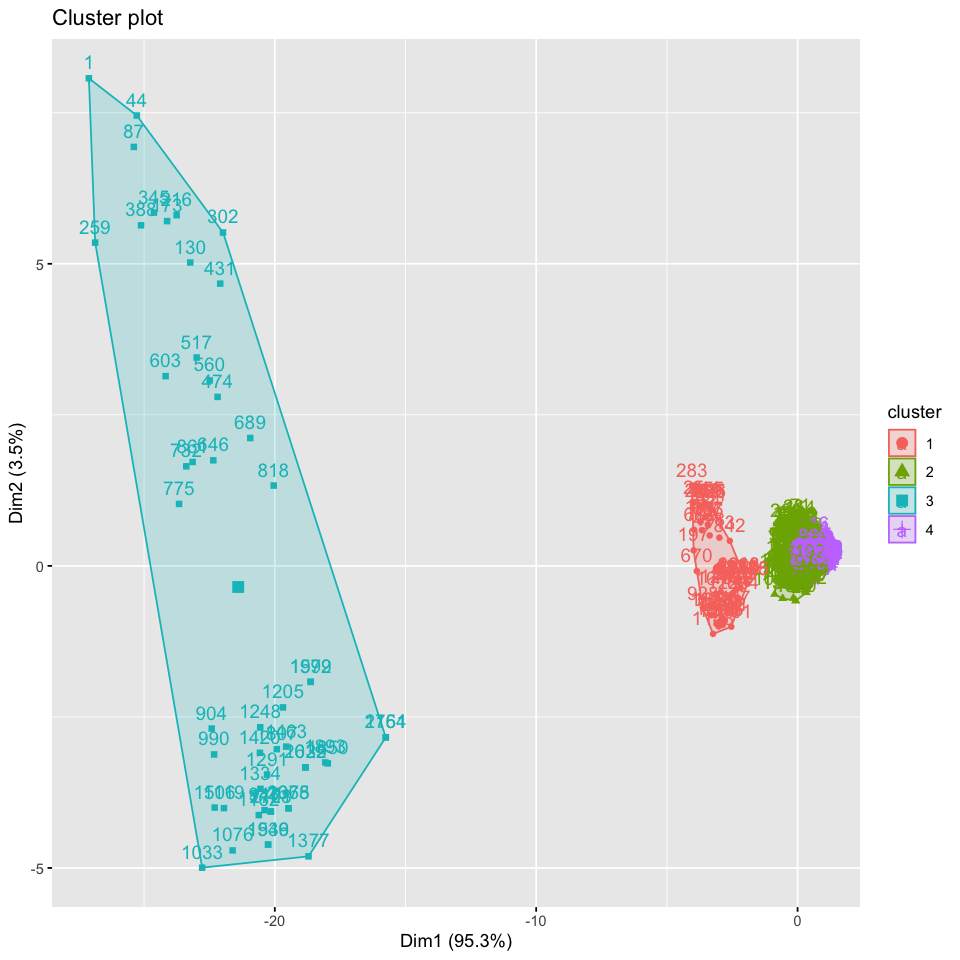

In [2596]:
fviz_cluster(km_model, data = km_data)

In [2597]:
# Clusters == 5

In [2598]:
km_model = kmeans_clustering(km_data, 5)

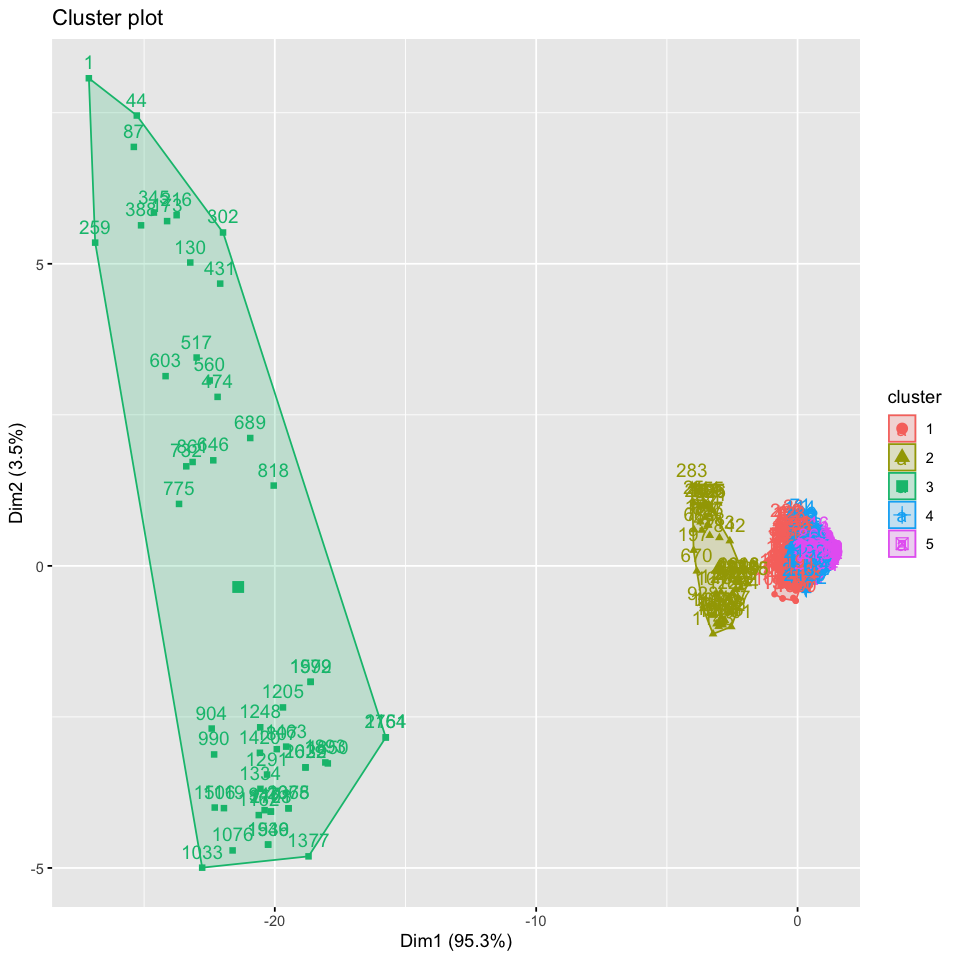

In [2599]:
fviz_cluster(km_model, data = km_data)

In [2600]:
# Clusters == 6

In [2801]:
km_model = kmeans_clustering(km_data, 6)

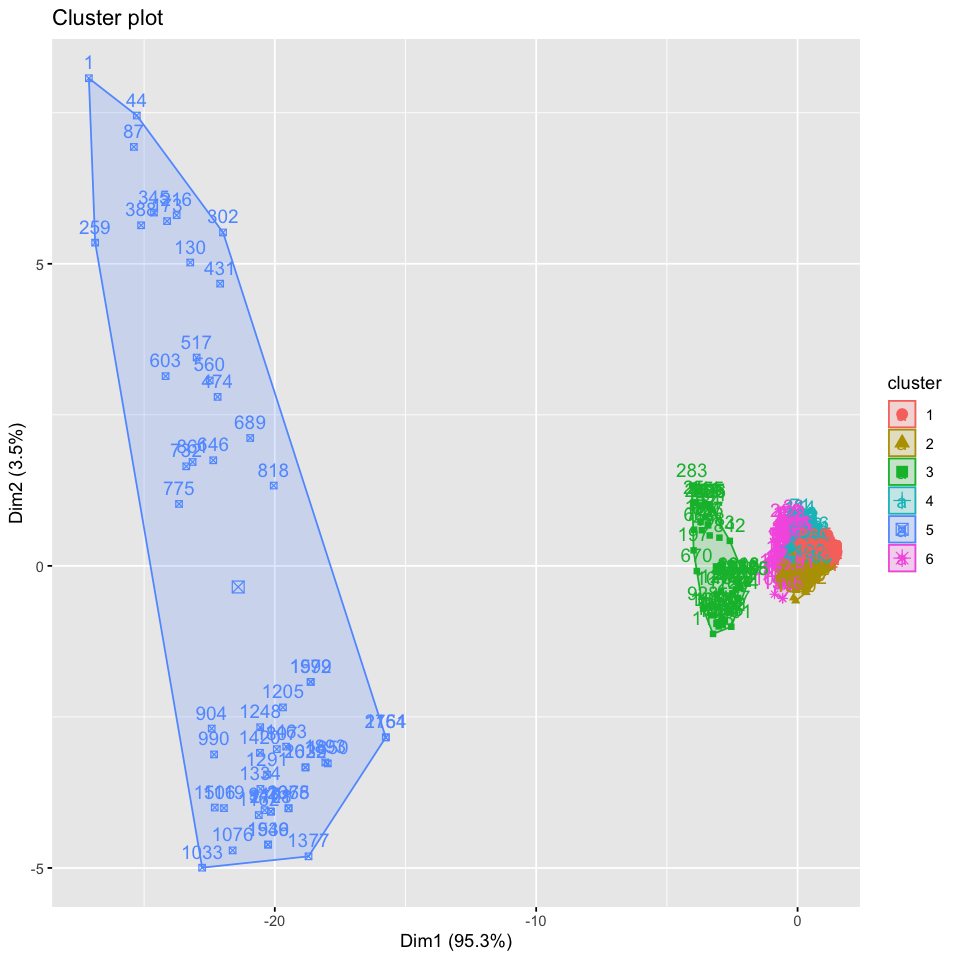

In [2802]:
fviz_cluster(km_model, data = km_data)

### Hierarchical Clustering

In [2603]:
group_by_county <- function(dataframe){
  dataframe <- dplyr::select(dataframe, -c("year", "month" ,"yearmon", "region"))
  dataframe <- dataframe[dataframe$county != "National",]
  dataframe <- group_by(dataframe, county)
  dataframe <- summarise_all(dataframe, funs(sum))
  dataframe2 <- dataframe[,-1]
  rownames(dataframe2) <- dataframe$county
  dataframe2 <- scale(dataframe2)
  return(dataframe2)
}

In [2604]:
hc_clustering <- function(dataframe) {
  distance_mat <- dist(dataframe, method = 'euclidean')
  set.seed(240)
  model <- hclust(distance_mat, method = "average")
  return(list(distance_mat, model))
}

#### Crimes

In [2605]:
hc_data = group_by_county(crime_df)

Warning message:
“Setting row names on a tibble is deprecated.”


In [2803]:
summary(hc_data)

    homicide         offences_against_the_person sexual_offences  
 Min.   :-0.675156   Min.   :-0.7309             Min.   :-0.7916  
 1st Qu.:-0.441098   1st Qu.:-0.5070             1st Qu.:-0.6200  
 Median :-0.323133   Median :-0.2450             Median :-0.3656  
 Mean   : 0.000000   Mean   : 0.0000             Mean   : 0.0000  
 3rd Qu.:-0.002942   3rd Qu.: 0.1658             3rd Qu.: 0.2194  
 Max.   : 5.541414   Max.   : 5.3936             Max.   : 4.8600  
    burglary           robbery         theft_and_handling fraud_and_forgery 
 Min.   :-0.74225   Min.   :-0.52551   Min.   :-0.9002    Min.   :-0.48988  
 1st Qu.:-0.51463   1st Qu.:-0.41951   1st Qu.:-0.6168    1st Qu.:-0.36277  
 Median :-0.28732   Median :-0.22339   Median :-0.2260    Median :-0.22695  
 Mean   : 0.00000   Mean   : 0.00000   Mean   : 0.0000    Mean   : 0.00000  
 3rd Qu.: 0.08542   3rd Qu.:-0.06666   3rd Qu.: 0.2385    3rd Qu.: 0.01061  
 Max.   : 5.40077   Max.   : 5.64960   Max.   : 5.0322    Max.   : 6.

In [2606]:
hc_res = hc_clustering(hc_data)
hc_matrix = hc_res[[1]]
hc_model = hc_res[[2]]

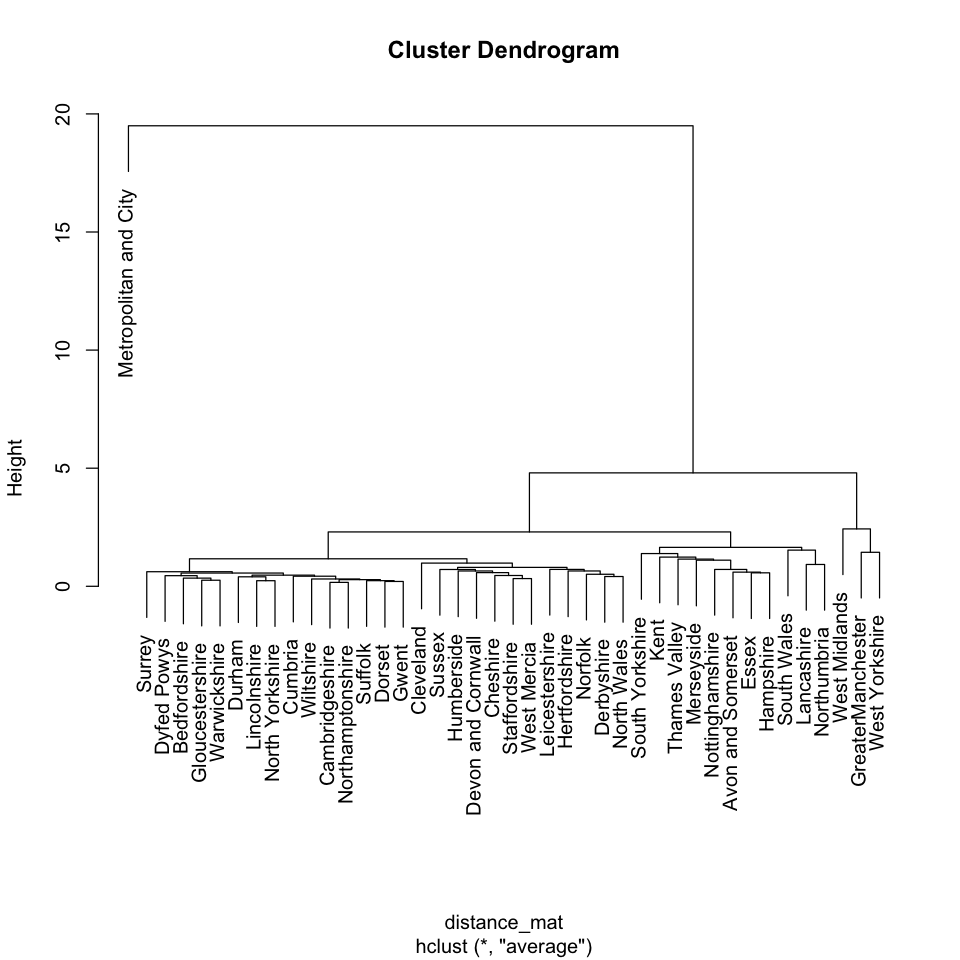

In [2607]:
plot(hc_model)

In [2608]:
# Clusters == 2

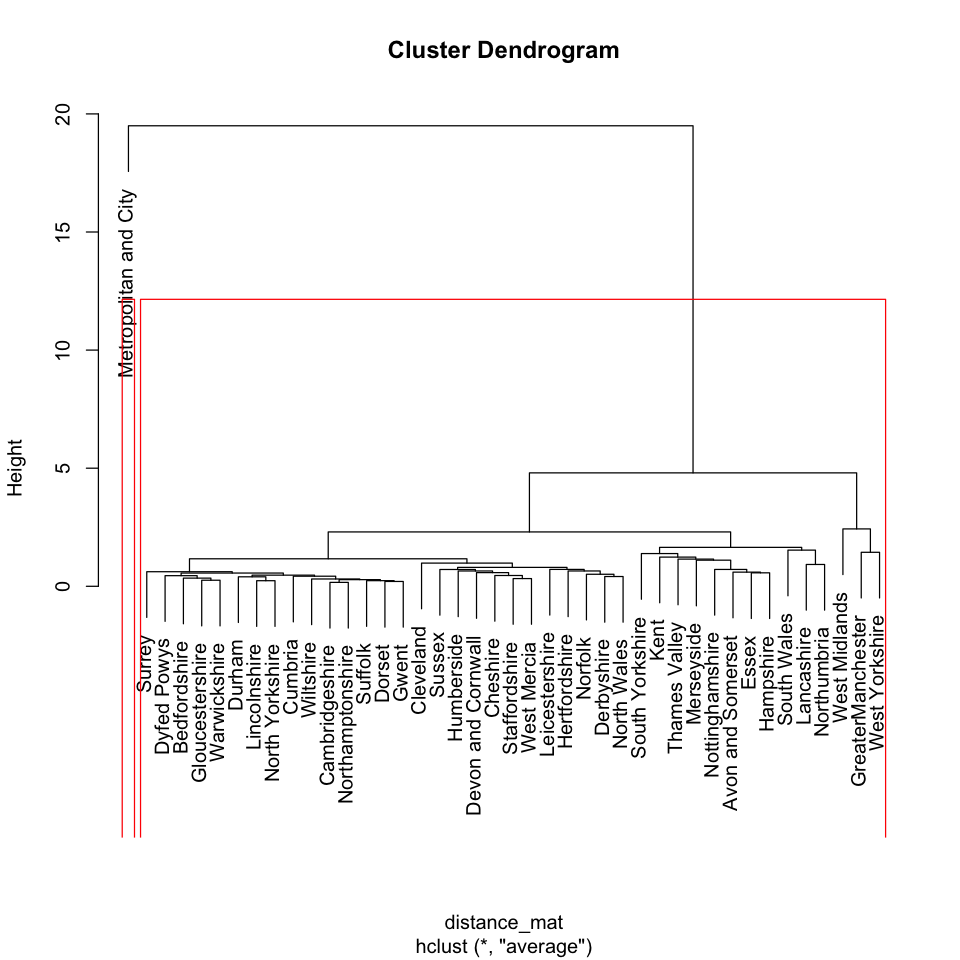

In [2609]:
plot(hc_model)
rect.hclust(hc_model, k = 2, border = "red")

In [2610]:
# Clusters == 3

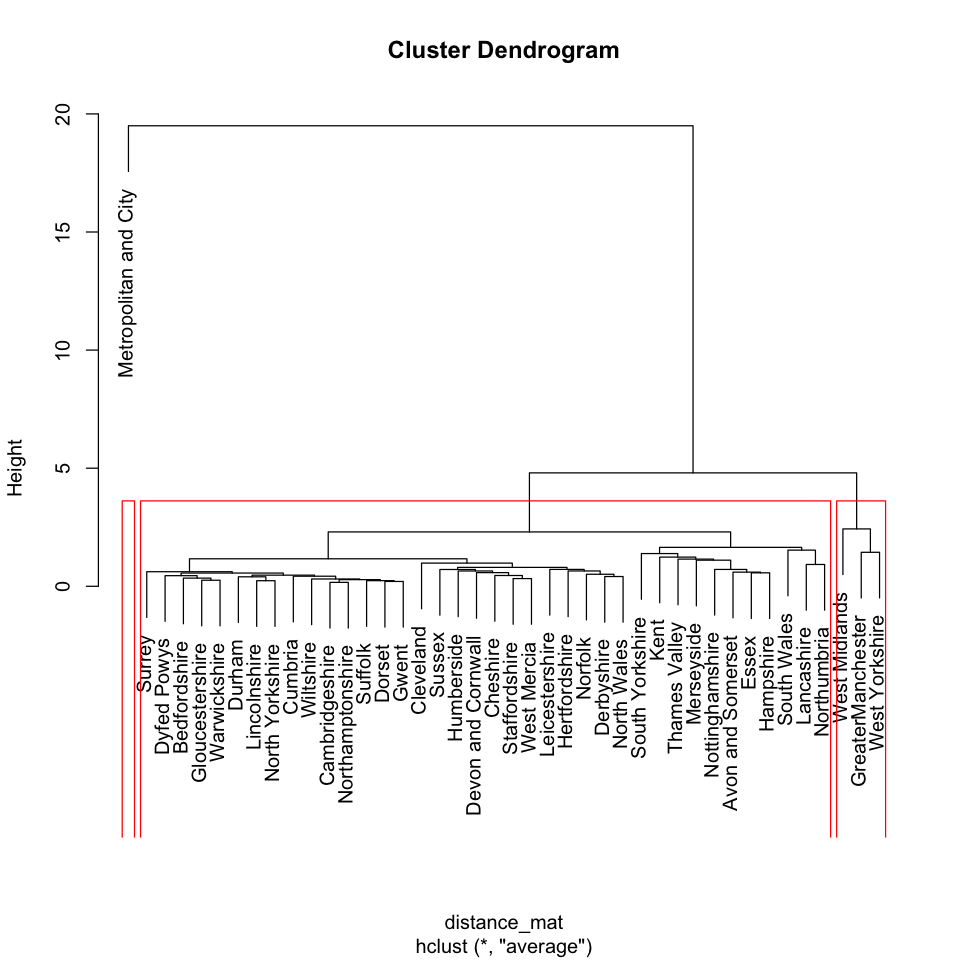

In [2611]:
plot(hc_model)
rect.hclust(hc_model, k = 3, border = "red")

In [2612]:
# Clusters == 5

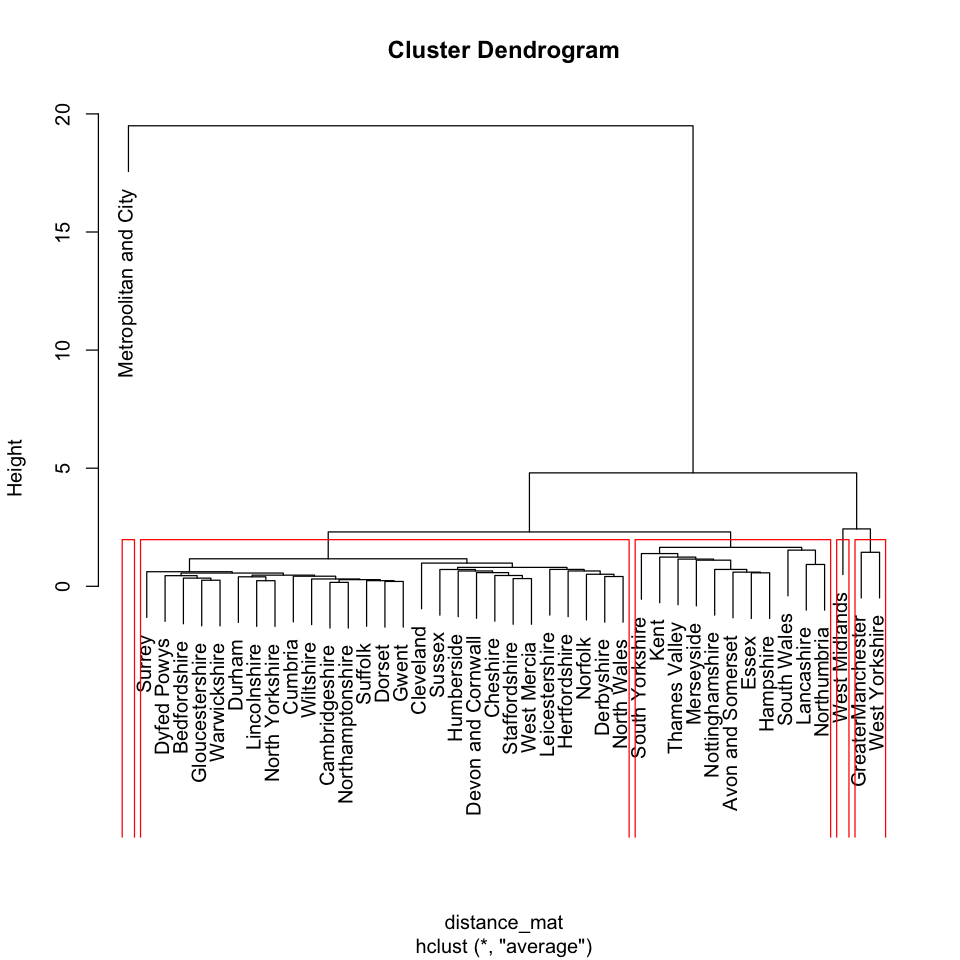

In [2613]:
plot(hc_model)
rect.hclust(hc_model, k = 5, border = "red")

In [2614]:
# Clusters == 8

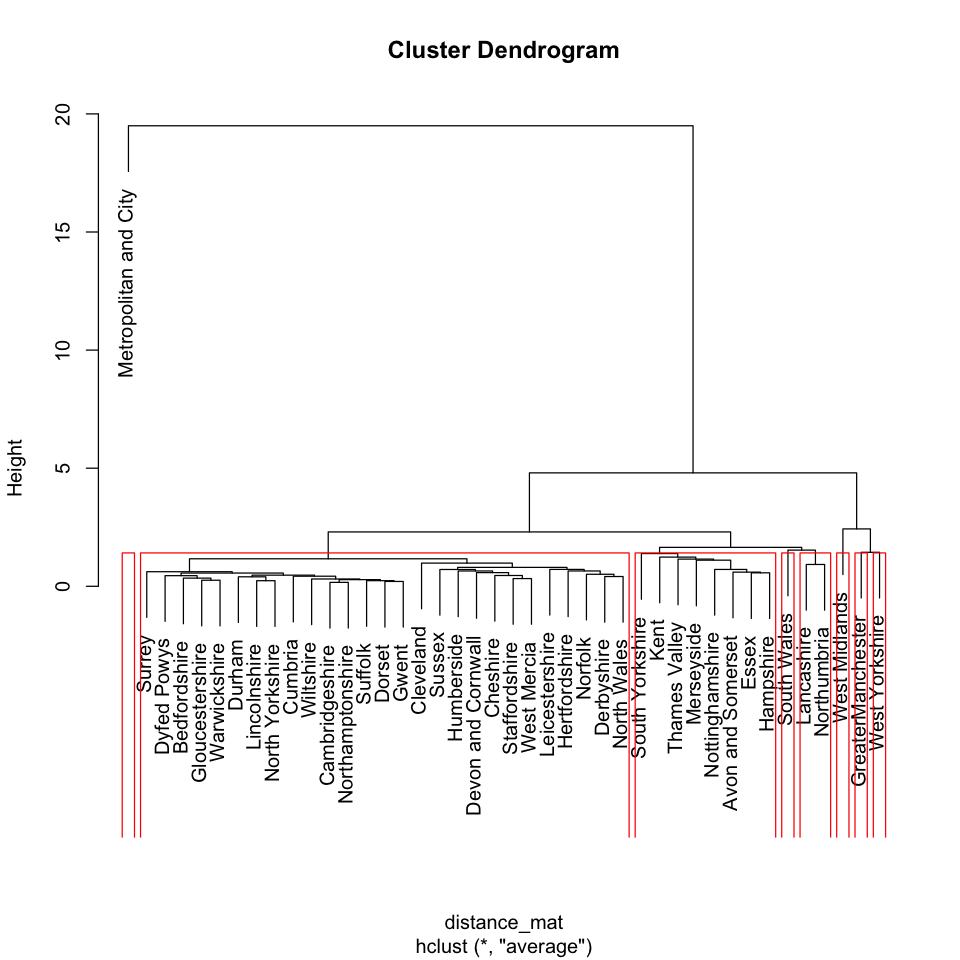

In [2615]:
plot(hc_model)
rect.hclust(hc_model, k = 8, border = "red")

In [2616]:
# Clusters == 11

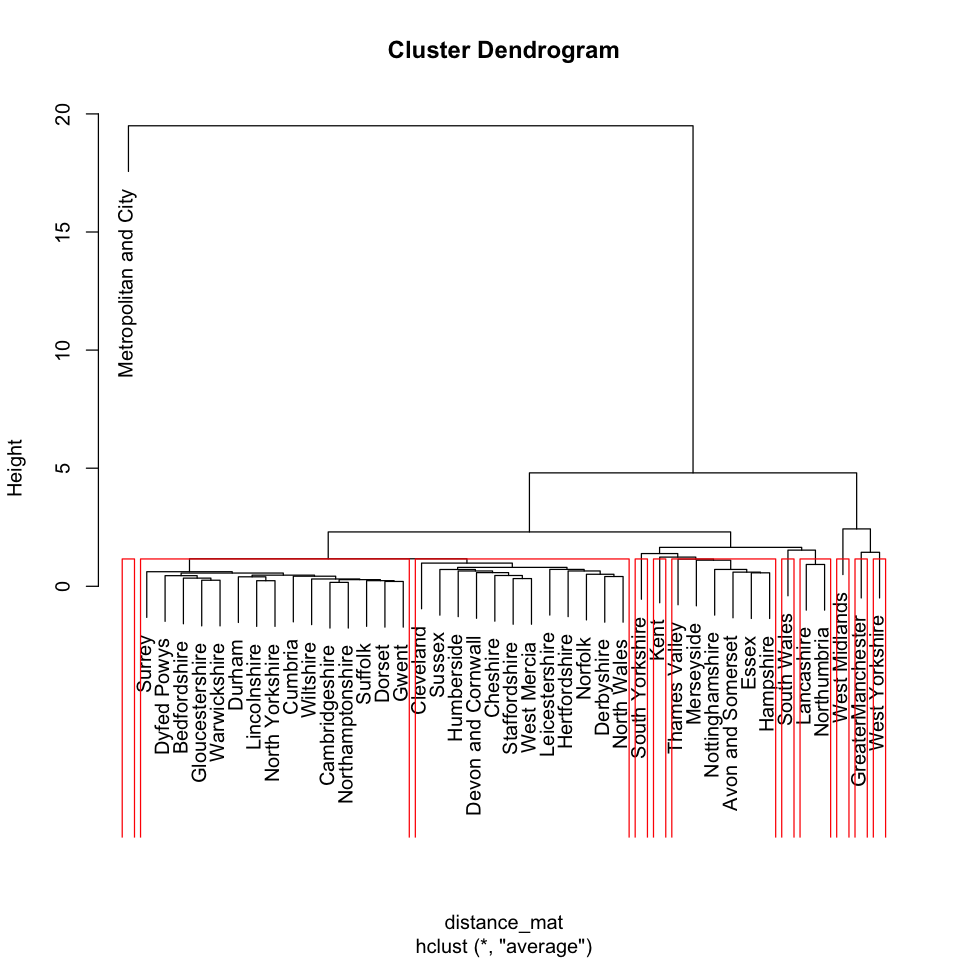

In [2617]:
plot(hc_model)
rect.hclust(hc_model, k = 11, border = "red")

## Classification

In [2619]:
classify_split_data <- function(dataframe){
  dataframe <- dataframe[dataframe$county != "National", ]
  dataframe$yearmon <- as.Date(dataframe$yearmon)
  dataframe$region <-  as.factor(dataframe$region)
  dataframe$county <-  as.factor(dataframe$county)
    
  numeric_columns_df <- dplyr::select(dataframe, -c("county", "year", "month" ,"yearmon", "region"))
  dataframe$no_of_crimes <- rowSums(numeric_columns_df)
  
  test <- dataframe[dataframe$year == 2018,]
  train <- dataframe[dataframe$year != 2018,]

  test <- dplyr::select(test, c("county", "yearmon" ,"no_of_crimes" ,"region"))
  train <- dplyr::select(train, c("county", "yearmon", "no_of_crimes" ,"region"))  
  

  return(list(test, train))
}

### SVM

In [2620]:
svm_test_train <- classify_split_data(crime_df)

In [2804]:
# Train
summary(svm_test_train[[2]])

               county        yearmon            no_of_crimes      region   
 Avon and Somerset:  42   Min.   :2014-01-01   Min.   :  70.0   East :462  
 Bedfordshire     :  42   1st Qu.:2014-11-01   1st Qu.: 476.0   North:546  
 Cambridgeshire   :  42   Median :2015-09-16   Median : 734.0   South:252  
 Cheshire         :  42   Mean   :2015-11-08   Mean   : 983.7   West :504  
 Cleveland        :  42   3rd Qu.:2016-11-01   3rd Qu.:1107.2              
 Cumbria          :  42   Max.   :2017-12-01   Max.   :8194.0              
 (Other)          :1512                                                    

In [2805]:
# Test
summary(svm_test_train[[1]])

               county       yearmon            no_of_crimes      region   
 Avon and Somerset:  9   Min.   :2018-01-01   Min.   : 190.0   East : 99  
 Bedfordshire     :  9   1st Qu.:2018-03-01   1st Qu.: 408.2   North:117  
 Cambridgeshire   :  9   Median :2018-08-01   Median : 626.0   South: 54  
 Cheshire         :  9   Mean   :2018-07-01   Mean   : 828.7   West :108  
 Cleveland        :  9   3rd Qu.:2018-10-01   3rd Qu.: 942.0              
 Cumbria          :  9   Max.   :2018-12-01   Max.   :5700.0              
 (Other)          :324                                                    

In [2622]:
svm_model_generate <- function(train_df, test_df) {
  set.seed(123)
  
  svm_model <- svm(region ~ county + yearmon + no_of_crimes, data = train_df, type = 'C-classification', kernal = "radial", gamma = 0.1, cost = 1)
  
  test_predictions <- predict(svm_model, test_df)
  confusion_matrix <- confusionMatrix(as.factor(test_predictions), as.factor(test_df$region))
  model_roc = multiclass.roc(test_df$region ~ as.numeric(as.factor(test_predictions)), plot=TRUE, print.auc = TRUE)

  return(list(svm_model, confusion_matrix))
}

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases



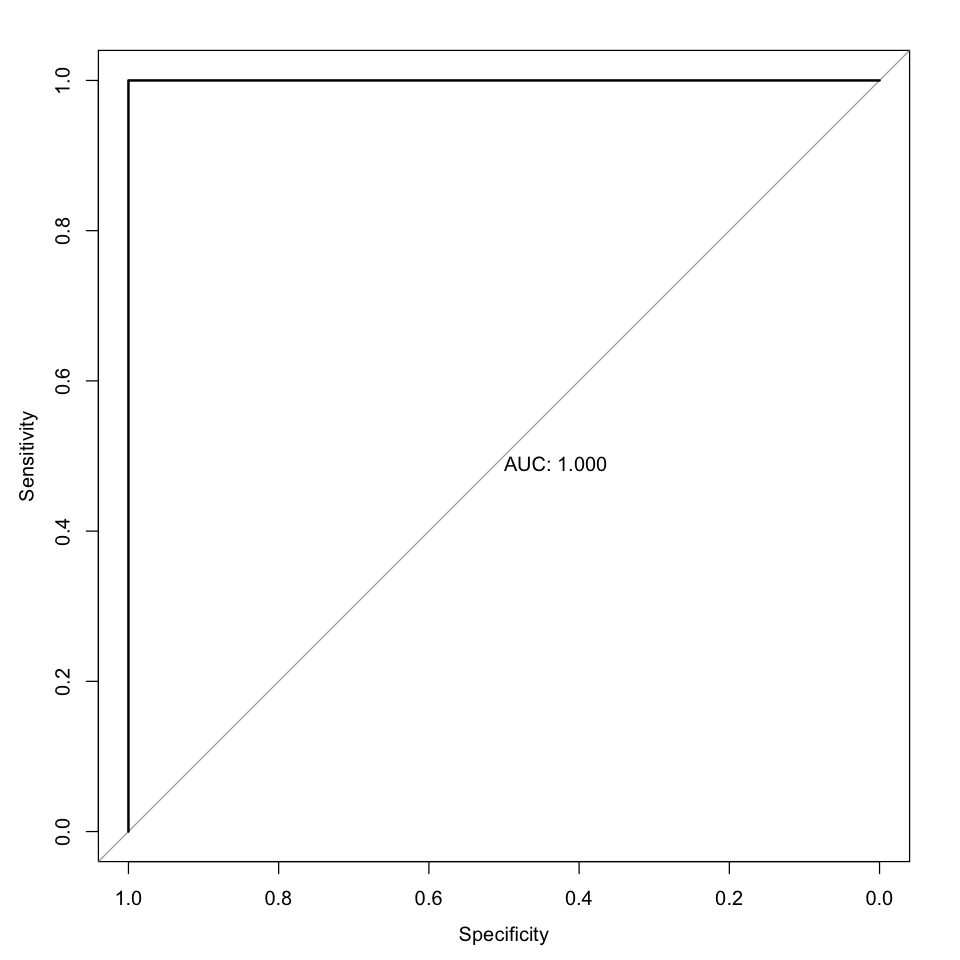

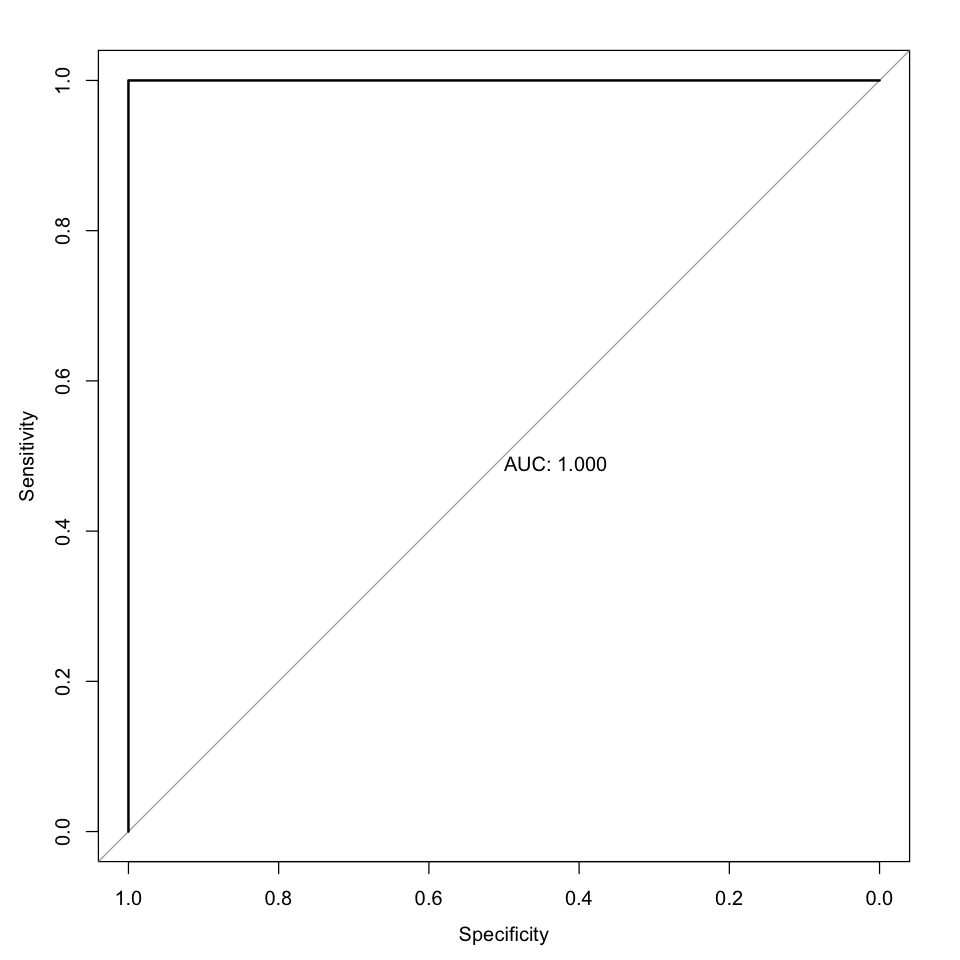

In [2623]:
svm_res = svm_model_generate(svm_test_train[[2]], svm_test_train[[1]])
svm_model = svm_res[[1]]
svm_creport = svm_res[[2]]

In [2624]:
summary(svm_model)


Call:
svm(formula = region ~ county + yearmon + no_of_crimes, data = train_df, 
    type = "C-classification", kernal = "radial", gamma = 0.1, cost = 1)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 

Number of Support Vectors:  478

 ( 129 116 156 77 )


Number of Classes:  4 

Levels: 
 East North South West




In [2625]:
svm_creport

Confusion Matrix and Statistics

          Reference
Prediction East North South West
     East    99     0     0    0
     North    0   117     0    0
     South    0     0    54    0
     West     0     0     0  108

Overall Statistics
                                     
               Accuracy : 1          
                 95% CI : (0.9903, 1)
    No Information Rate : 0.3095     
    P-Value [Acc > NIR] : < 2.2e-16  
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         

Statistics by Class:

                     Class: East Class: North Class: South Class: West
Sensitivity               1.0000       1.0000       1.0000      1.0000
Specificity               1.0000       1.0000       1.0000      1.0000
Pos Pred Value            1.0000       1.0000       1.0000      1.0000
Neg Pred Value            1.0000       1.0000       1.0000      1.0000
Prevalence                0.2619       0.3

### Random Forest 

In [2626]:
rf_test_train <- classify_split_data(uscrime_df)

In [2807]:
# Train
summary(rf_test_train[[2]])

               county        yearmon            no_of_crimes      region   
 Avon and Somerset:  42   Min.   :2014-01-01   Min.   :  20.0   East :462  
 Bedfordshire     :  42   1st Qu.:2014-11-01   1st Qu.:  79.0   North:546  
 Cambridgeshire   :  42   Median :2015-09-16   Median : 128.0   South:252  
 Cheshire         :  42   Mean   :2015-11-08   Mean   : 198.6   West :504  
 Cleveland        :  42   3rd Qu.:2016-11-01   3rd Qu.: 212.0              
 Cumbria          :  42   Max.   :2017-12-01   Max.   :2458.0              
 (Other)          :1512                                                    

In [2808]:
# Test
summary(rf_test_train[[1]])

               county       yearmon            no_of_crimes      region   
 Avon and Somerset:  9   Min.   :2018-01-01   Min.   :  20.0   East : 99  
 Bedfordshire     :  9   1st Qu.:2018-03-01   1st Qu.:  70.0   North:117  
 Cambridgeshire   :  9   Median :2018-08-01   Median : 110.5   South: 54  
 Cheshire         :  9   Mean   :2018-07-01   Mean   : 165.9   West :108  
 Cleveland        :  9   3rd Qu.:2018-10-01   3rd Qu.: 177.8              
 Cumbria          :  9   Max.   :2018-12-01   Max.   :1812.0              
 (Other)          :324                                                    

In [2628]:
rf_model_generate <- function(train_df, test_df) {
  set.seed(123)
    
  rf_model <- randomForest(region ~ county + yearmon + no_of_crimes, data = train_df, proximity=TRUE)
  
  test_predictions <- predict(rf_model, test_df)
  confusion_matrix <- confusionMatrix(as.factor(test_predictions), as.factor(test_df$region))
  model_roc = multiclass.roc(test_df$region ~ as.numeric(as.factor(test_predictions)), plot=TRUE, print.auc = TRUE)

  return(list(rf_model, confusion_matrix))
}

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases



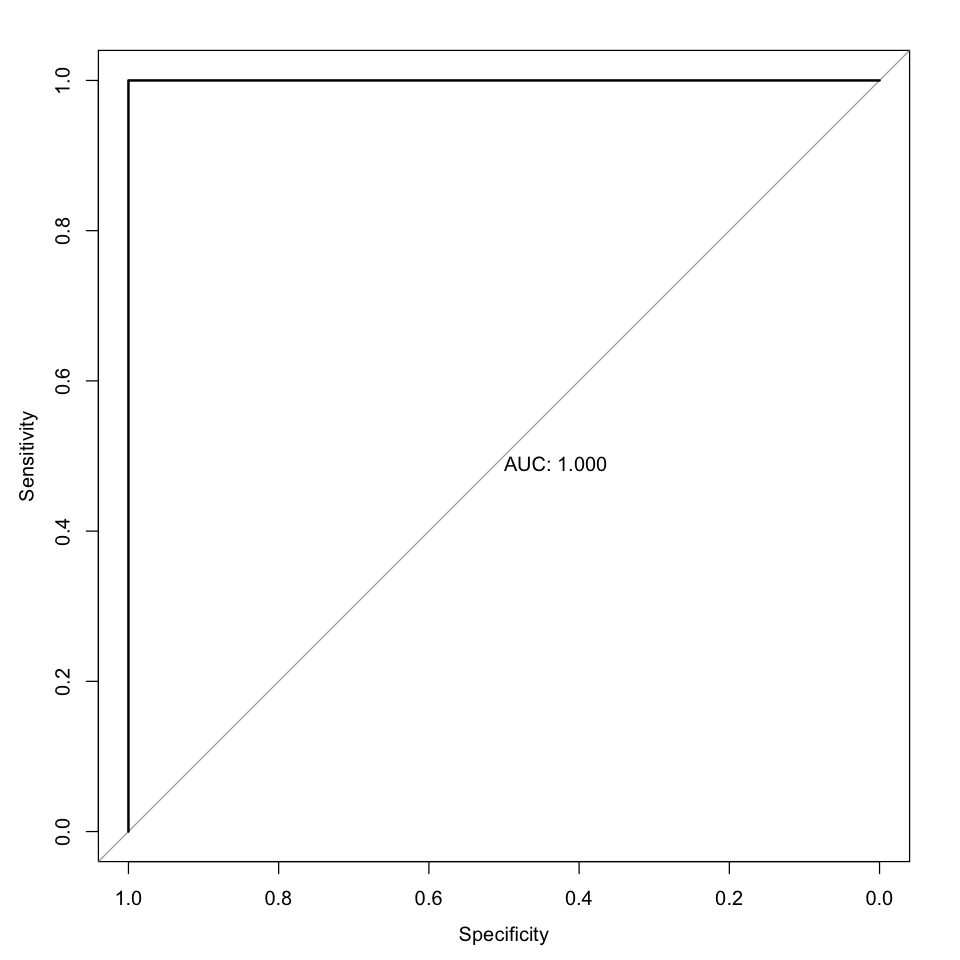

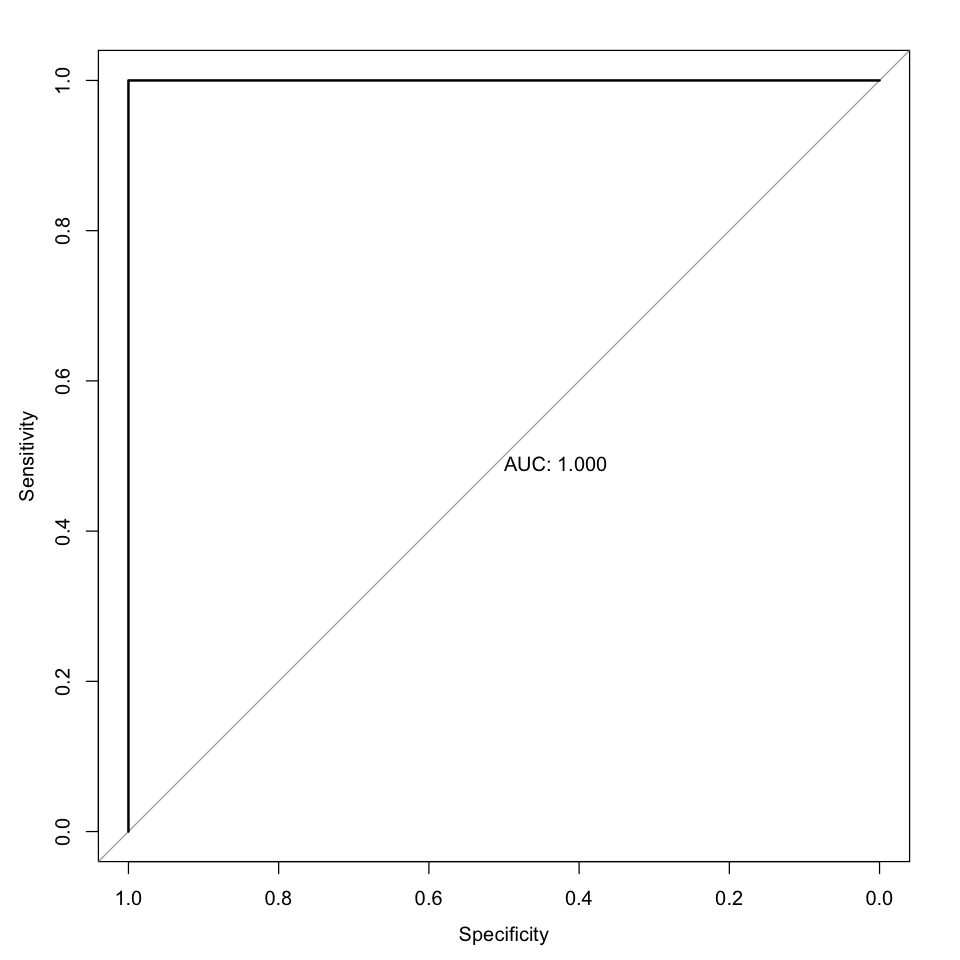

In [2629]:
rf_res <- rf_model_generate(rf_test_train[[2]], rf_test_train[[1]])
rf_model = rf_res[[1]]
rf_creport = rf_res[[2]]

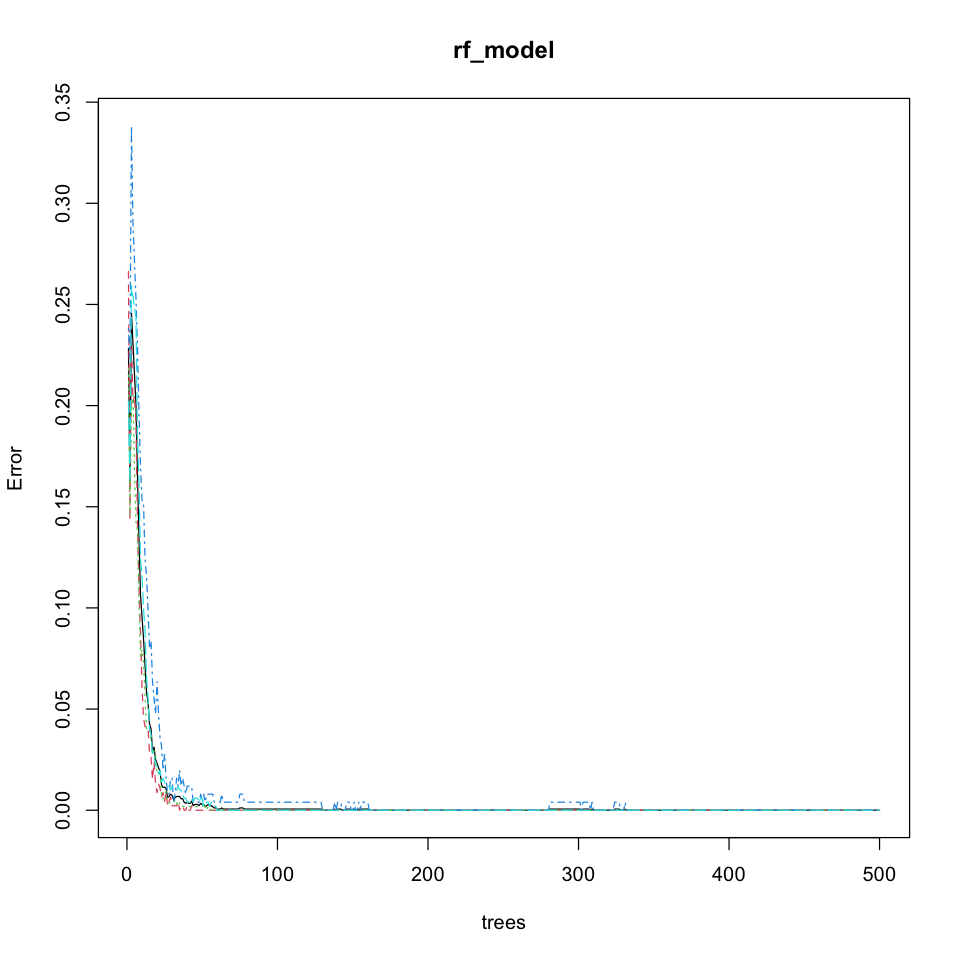

In [2630]:
plot(rf_model)

In [2631]:
summary(rf_model)

                Length  Class  Mode     
call                  4 -none- call     
type                  1 -none- character
predicted          1764 factor numeric  
err.rate           2500 -none- numeric  
confusion            20 -none- numeric  
votes              7056 matrix numeric  
oob.times          1764 -none- numeric  
classes               4 -none- character
importance            3 -none- numeric  
importanceSD          0 -none- NULL     
localImportance       0 -none- NULL     
proximity       3111696 -none- numeric  
ntree                 1 -none- numeric  
mtry                  1 -none- numeric  
forest               14 -none- list     
y                  1764 factor numeric  
test                  0 -none- NULL     
inbag                 0 -none- NULL     
terms                 3 terms  call     

In [2632]:
rf_creport

Confusion Matrix and Statistics

          Reference
Prediction East North South West
     East    99     0     0    0
     North    0   117     0    0
     South    0     0    54    0
     West     0     0     0  108

Overall Statistics
                                     
               Accuracy : 1          
                 95% CI : (0.9903, 1)
    No Information Rate : 0.3095     
    P-Value [Acc > NIR] : < 2.2e-16  
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         

Statistics by Class:

                     Class: East Class: North Class: South Class: West
Sensitivity               1.0000       1.0000       1.0000      1.0000
Specificity               1.0000       1.0000       1.0000      1.0000
Pos Pred Value            1.0000       1.0000       1.0000      1.0000
Neg Pred Value            1.0000       1.0000       1.0000      1.0000
Prevalence                0.2619       0.3

# Prescriptive Analytics

## Time Series Forecasting

Suggesting any particular month to look out for specific crime peaks and telling which ones could go down.

In [2633]:
check_and_add_missing_rows <- function(dataframe){
  dataframe <- dataframe[dataframe$county == "National",]
  
  numeric_columns_df <- dplyr::select(dataframe, -c("county", "year", "month" ,"yearmon", "region"))
  dataframe$no_of_crimes <- rowSums(numeric_columns_df)
  df <- dplyr::select(dataframe, c("year", "month","no_of_crimes"))

  unique_years <- c(2014, 2015, 2016, 2017, 2018)
  months <- c("jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec")
  for(year in unique_years){
    missing_months <- setdiff(months, df$month[df$year == year])
    for(missing_month in missing_months){
      new_row <- data.frame(year = year, month = missing_month, no_of_crimes = NA)
      df <- rbind(df, new_row)
    }
  }
  
  df$date <- as.Date(paste(df$year, df$month, "01", sep = "-"), "%Y-%b-%d")
  df <- df[order(df$date),]
    
  return(df)
}

In [2634]:
convert_to_ts <- function(df){
  months <- c("jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec")
  ts_obj <- ts(df$no_of_crimes, start = c(df$year[1], match(df$month[1], months)), frequency = 12)

  return(ts_obj)
}

### Crimes

In [2635]:
crime_df_mr <- check_and_add_missing_rows(crime_df)

In [2812]:
head(crime_df_mr)

year month no_of_crimes date      
1   2014 jan   52683        2014-01-01
44  2014 feb   48230        2014-02-01
87  2014 mar   48231        2014-03-01
130 2014 apr   42549        2014-04-01
173 2014 may   44265        2014-05-01
216 2014 jun   44110        2014-06-01

In [2637]:
crime_ts <- convert_to_ts(crime_df_mr)

In [2811]:
crime_ts

Jan   Feb   Mar   Apr   May   Jun   Jul   Aug   Sep   Oct   Nov   Dec  
2014 52683 48230 48231 42549 44265 44110 48715 40888 46092 47152 41836 40952
2015 44359 43079 46044 41665 40252 44943 45404 39495 44484 43202    NA 37496
2016 42785    NA    NA 41938 39213 40826 38249 38249 39000 37811 39209 34186
2017 40052 37116 41780    NA    NA    NA 35808 36066 34786 35848 36899 29367
2018 37521 33488 33457    NA    NA    NA 35808 36066 34786 35848 36899 29367

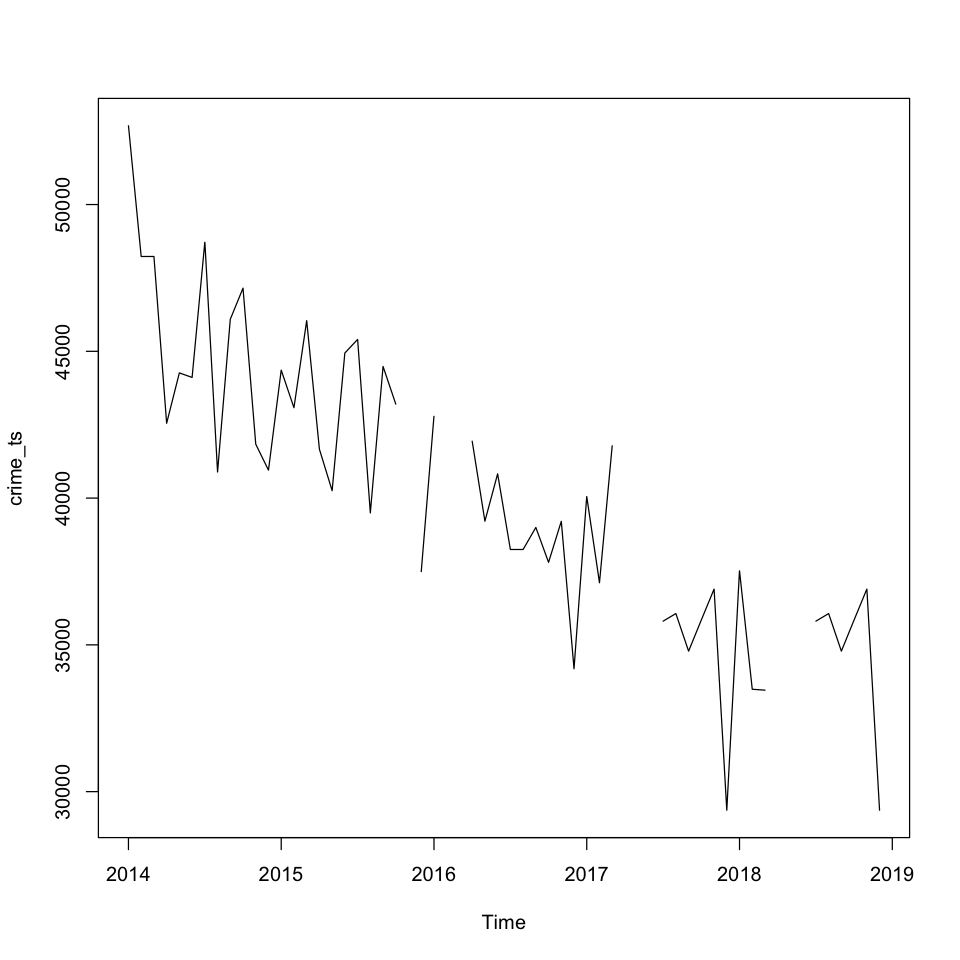

In [2639]:
plot.ts(crime_ts)

### Filling Missing Data - Mice

In [2640]:
crime_df_mice <- mice(data=crime_df_mr, where = is.na(crime_df_mr))


 iter imp variable
  1   1  no_of_crimes*
  1   2  no_of_crimes*
  1   3  no_of_crimes*
  1   4  no_of_crimes*
  1   5  no_of_crimes*
  2   1  no_of_crimes*
  2   2  no_of_crimes*
  2   3  no_of_crimes*
  2   4  no_of_crimes*
  2   5  no_of_crimes*
  3   1  no_of_crimes*
  3   2  no_of_crimes*
  3   3  no_of_crimes*
  3   4  no_of_crimes*
  3   5  no_of_crimes*
  4   1  no_of_crimes*
  4   2  no_of_crimes*
  4   3  no_of_crimes*
  4   4  no_of_crimes*
  4   5  no_of_crimes*
  5   1  no_of_crimes*
  5   2  no_of_crimes*
  5   3  no_of_crimes*
  5   4  no_of_crimes*
  5   5  no_of_crimes*


Warning message:
“Number of logged events: 26”


In [2641]:
summary(crime_df_mice)

Class: mids
Number of multiple imputations:  5 
Imputation methods:
        year        month no_of_crimes         date 
          ""           ""        "pmm"           "" 
PredictorMatrix:
             year month no_of_crimes date
year            0     0            1    1
month           1     0            1    1
no_of_crimes    1     0            0    1
date            1     0            1    0
Number of logged events:  26 
  it im          dep     meth
1  0  0              constant
2  1  1 no_of_crimes      pmm
3  1  2 no_of_crimes      pmm
4  1  3 no_of_crimes      pmm
5  1  4 no_of_crimes      pmm
6  1  5 no_of_crimes      pmm
                                                                                                                                                                                                                                                       out
1                                                                                                           

In [2642]:
crime_df_filled <- complete(crime_df_mice)

In [2643]:
crime_filled_ts <- convert_to_ts(crime_df_filled)
crime_filled_ts

Jan   Feb   Mar   Apr   May   Jun   Jul   Aug   Sep   Oct   Nov   Dec  
2014 52683 48230 48231 42549 44265 44110 48715 40888 46092 47152 41836 40952
2015 44359 43079 46044 41665 40252 44943 45404 39495 44484 43202 38249 37496
2016 42785 44484 43202 41938 39213 40826 38249 38249 39000 37811 39209 34186
2017 40052 37116 41780 37116 39209 37521 35808 36066 34786 35848 36899 29367
2018 37521 33488 33457 33457 33457 34786 35808 36066 34786 35848 36899 29367

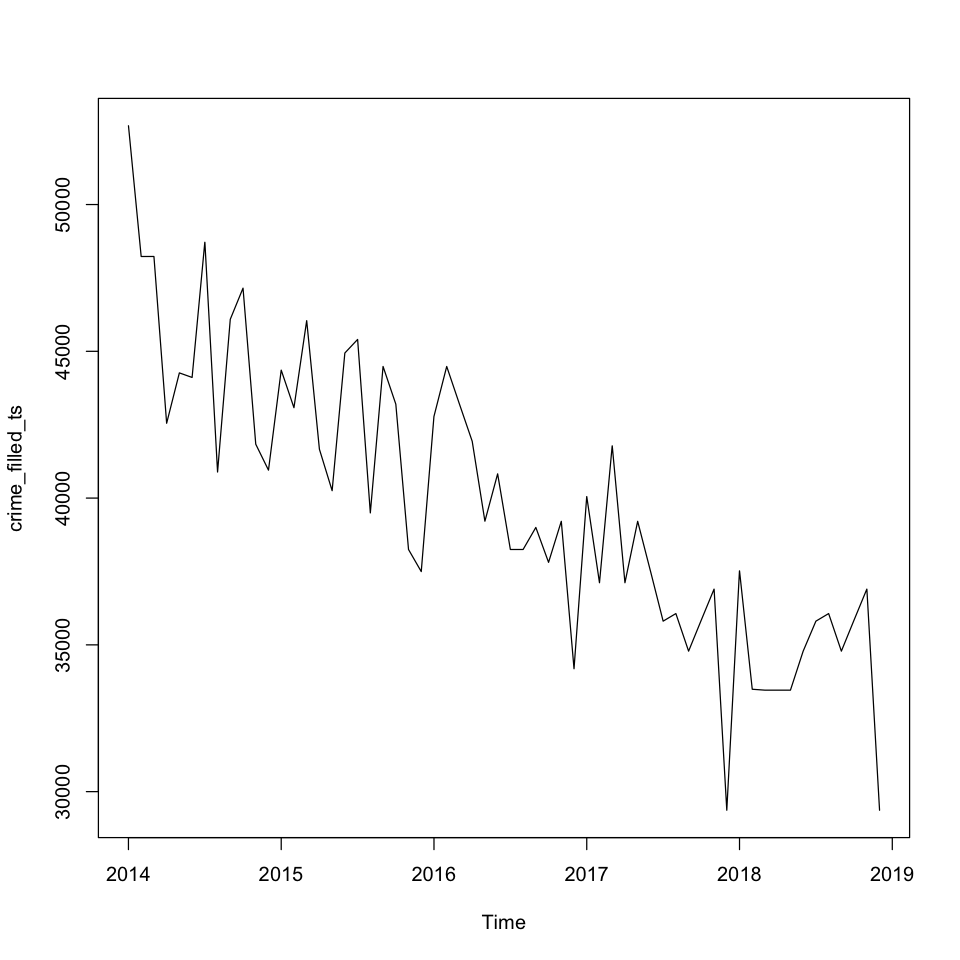

In [2644]:
plot.ts(crime_filled_ts)

### Patterns Check

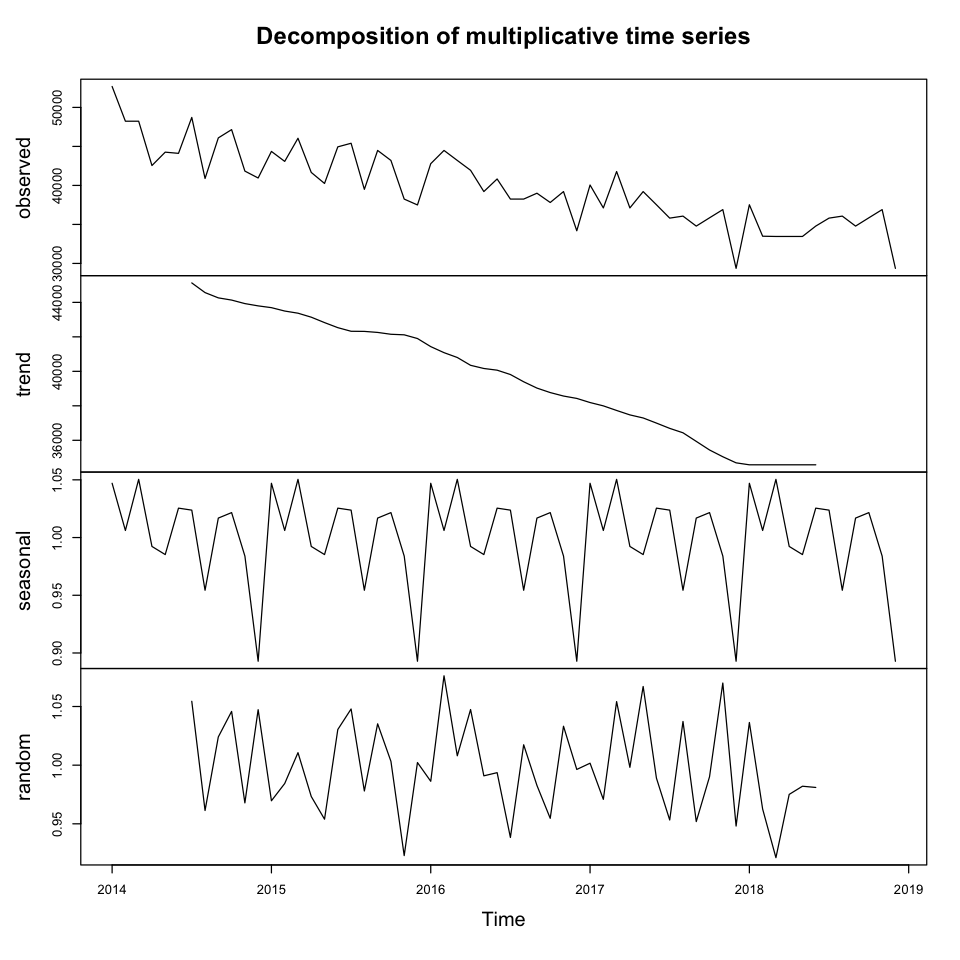

In [2645]:
d <- decompose(crime_filled_ts, "multiplicative")
plot(d)

### Model Fit

In [2646]:
model_fit <- auto.arima(crime_filled_ts)

### Diagnostic Test

In [2647]:
model_fit_resd = residuals(model_fit)
model_fit_resd

Jan         Feb         Mar         Apr         May         Jun        
2014    52.68293 -2817.12064 -1525.25067 -5259.26881 -2299.04701 -1748.73550
2015 -2117.01619   110.76176  2961.14054  1241.22625 -1574.01033  3632.24274
2016  1706.77087  3740.91728  -392.67459  1170.79825  -991.72158 -2026.79483
2017   922.37775 -3318.29025  3037.27627 -1660.15001  2574.13037  -810.48996
2018  1535.92651 -1086.49023 -3723.23461   179.47258 -1169.74271  1523.79172
     Jul         Aug         Sep         Oct         Nov         Dec        
2014  2330.85849 -4425.85186   852.47380  1450.86870 -3104.46658 -2958.16364
2015   241.30446  -867.63870  1121.02581 -1122.18826 -2467.99738 -2005.61603
2016 -4343.76944   500.05021 -1984.50182 -1841.59632  3131.33533 -2268.04590
2017  -703.30746  -255.65761 -1933.47221   388.87182   466.14035 -4069.71330
2018  3199.54086  2434.42153  1293.50177  1346.66023  1381.32089 -1841.94733

In [2648]:
Box.test(model_fit_resd, lag=10,type="Ljung-Box")


	Box-Ljung test

data:  model_fit_resd
X-squared = 4.6749, df = 10, p-value = 0.9118


### Forecating

#### 4 Years

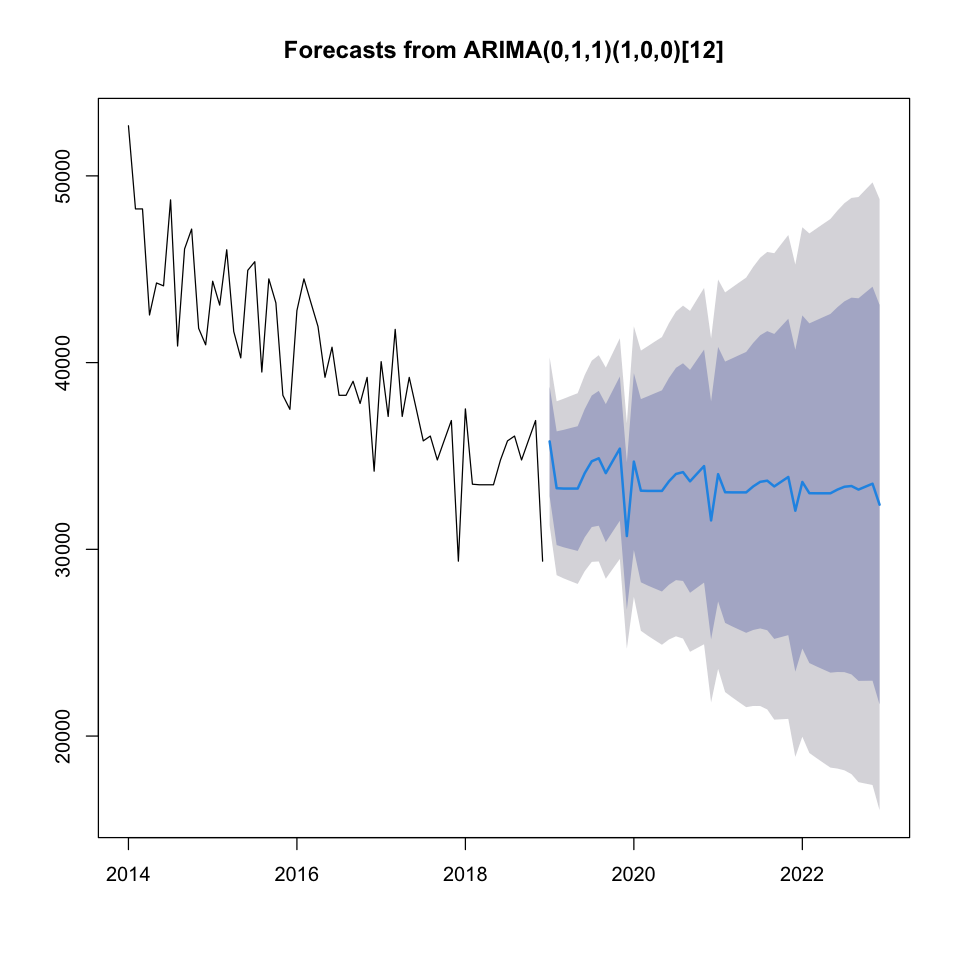

In [2649]:
model_forecast <- forecast(model_fit, h=12 * 4)
plot(model_forecast)

#### 8 Years

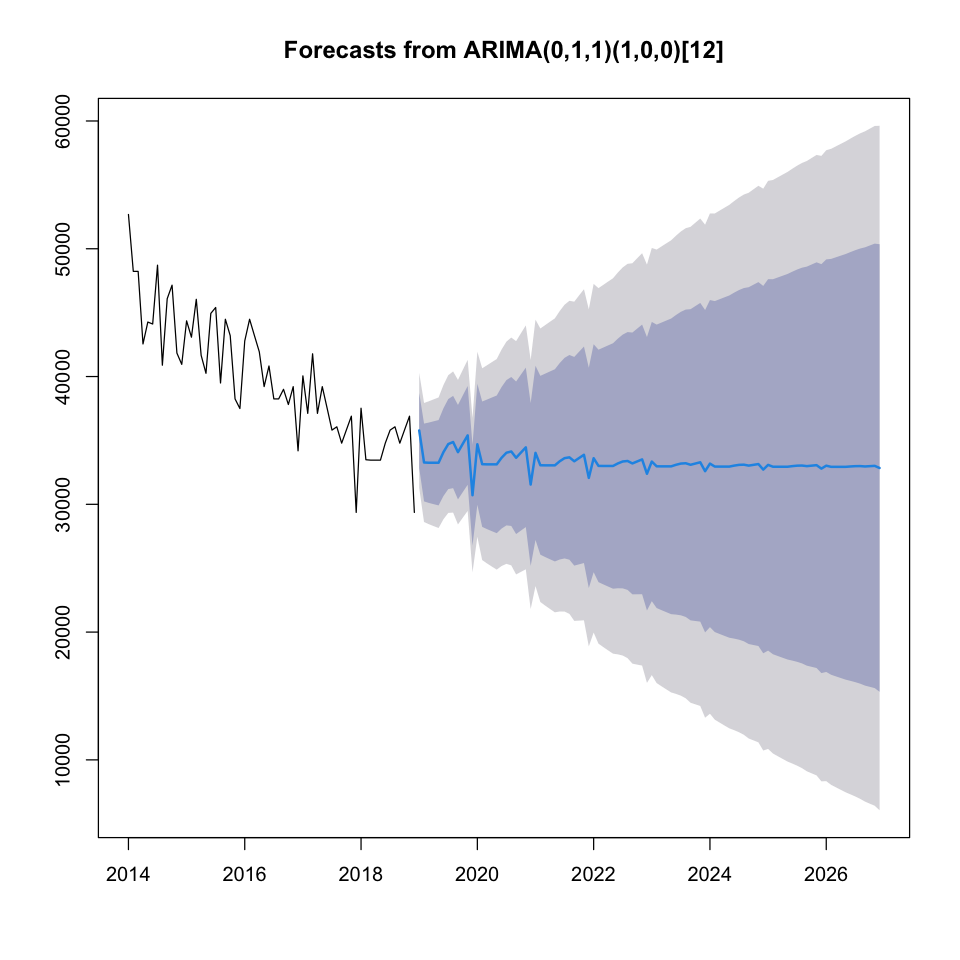

In [2650]:
model_forecast <- forecast(model_fit, h=12 * 8)
plot(model_forecast)

### Unsucessful Crimes

In [2651]:
uscrime_df_mr <- check_and_add_missing_rows(uscrime_df)

In [2652]:
head(uscrime_df_mr)

year month no_of_crimes date      
1   2014 jan   9301         2014-01-01
44  2014 feb   8987         2014-02-01
87  2014 mar   8958         2014-03-01
130 2014 apr   8164         2014-04-01
173 2014 may   8697         2014-05-01
216 2014 jun   8753         2014-06-01

In [2653]:
uscrime_ts <- convert_to_ts(uscrime_df_mr)

In [2654]:
uscrime_ts

Jan  Feb  Mar  Apr  May  Jun  Jul  Aug  Sep  Oct  Nov  Dec 
2014 9301 8987 8958 8164 8697 8753 9663 8488 9455 9701 8729 8215
2015 9360 8754 9260 8262 8029 9851 9939 8331 9593 9401   NA 7778
2016 8924   NA   NA 8357 7829 8182 8074 7860 8137 7653 7924 6935
2017 7586 7027 8011   NA   NA   NA 7107 7325 7378 7065 7358 5861
2018 7266 6593 6763   NA   NA   NA 7107 7325 7378 7065 7358 5861

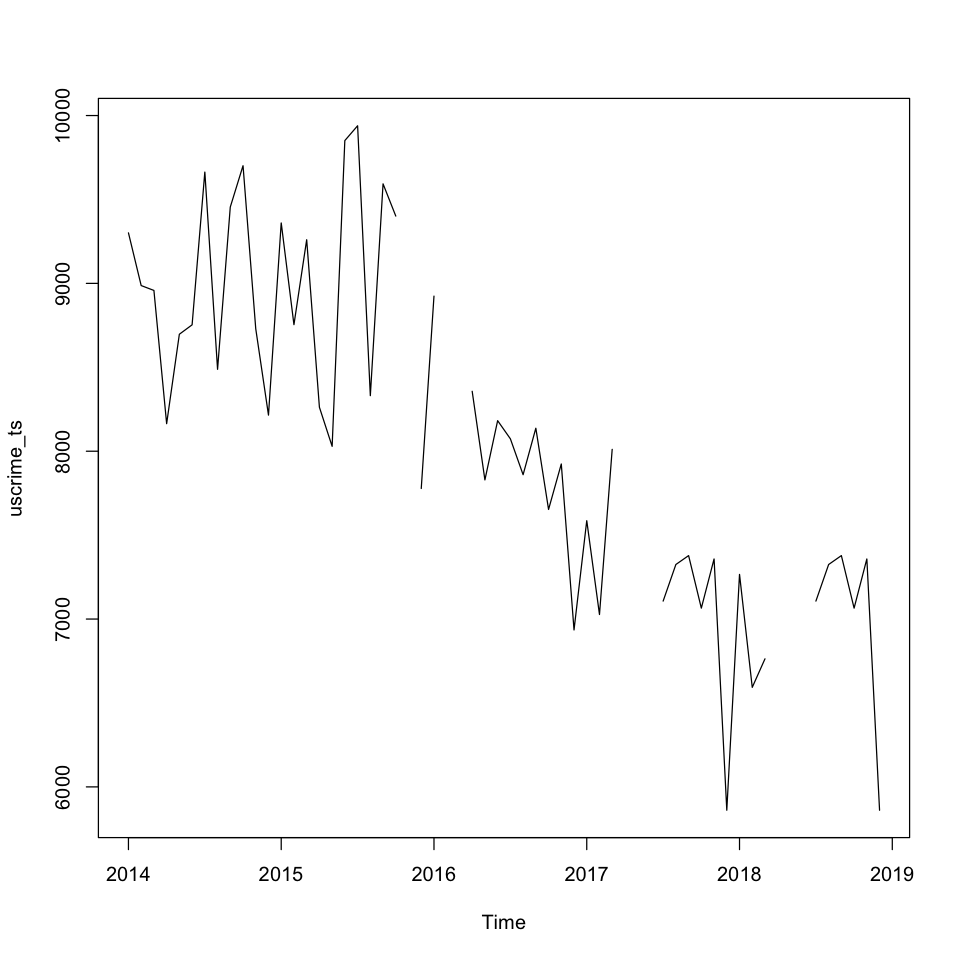

In [2655]:
plot.ts(uscrime_ts)

### Filling Missing Data - Mice

In [2656]:
uscrime_df_mice <- mice(data=uscrime_df_mr, where = is.na(uscrime_df_mr))


 iter imp variable
  1   1  no_of_crimes*
  1   2  no_of_crimes*
  1   3  no_of_crimes*
  1   4  no_of_crimes*
  1   5  no_of_crimes*
  2   1  no_of_crimes*
  2   2  no_of_crimes*
  2   3  no_of_crimes*
  2   4  no_of_crimes*
  2   5  no_of_crimes*
  3   1  no_of_crimes*
  3   2  no_of_crimes*
  3   3  no_of_crimes*
  3   4  no_of_crimes*
  3   5  no_of_crimes*
  4   1  no_of_crimes*
  4   2  no_of_crimes*
  4   3  no_of_crimes*
  4   4  no_of_crimes*
  4   5  no_of_crimes*
  5   1  no_of_crimes*
  5   2  no_of_crimes*
  5   3  no_of_crimes*
  5   4  no_of_crimes*
  5   5  no_of_crimes*


Warning message:
“Number of logged events: 26”


In [2657]:
summary(crime_df_mice)

Class: mids
Number of multiple imputations:  5 
Imputation methods:
        year        month no_of_crimes         date 
          ""           ""        "pmm"           "" 
PredictorMatrix:
             year month no_of_crimes date
year            0     0            1    1
month           1     0            1    1
no_of_crimes    1     0            0    1
date            1     0            1    0
Number of logged events:  26 
  it im          dep     meth
1  0  0              constant
2  1  1 no_of_crimes      pmm
3  1  2 no_of_crimes      pmm
4  1  3 no_of_crimes      pmm
5  1  4 no_of_crimes      pmm
6  1  5 no_of_crimes      pmm
                                                                                                                                                                                                                                                       out
1                                                                                                           

In [2658]:
uscrime_df_filled <- complete(uscrime_df_mice)

In [2659]:
uscrime_filled_ts <- convert_to_ts(uscrime_df_filled)
uscrime_filled_ts

Jan  Feb  Mar  Apr  May  Jun  Jul  Aug  Sep  Oct  Nov  Dec 
2014 9301 8987 8958 8164 8697 8753 9663 8488 9455 9701 8729 8215
2015 9360 8754 9260 8262 8029 9851 9939 8331 9593 9401 9401 7778
2016 8924 9401 8357 8357 7829 8182 8074 7860 8137 7653 7924 6935
2017 7586 7027 8011 7107 7378 7378 7107 7325 7378 7065 7358 5861
2018 7266 6593 6763 7378 7378 7325 7107 7325 7378 7065 7358 5861

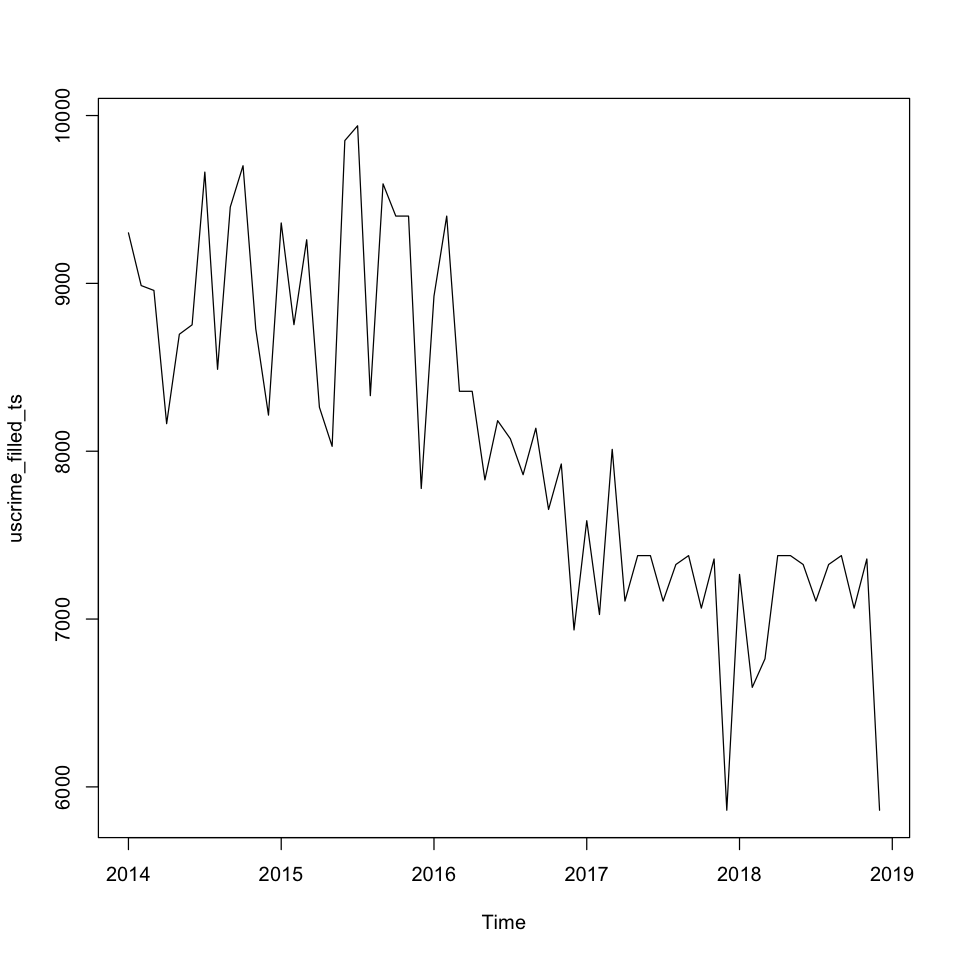

In [2660]:
plot.ts(uscrime_filled_ts)

### Patterns Check

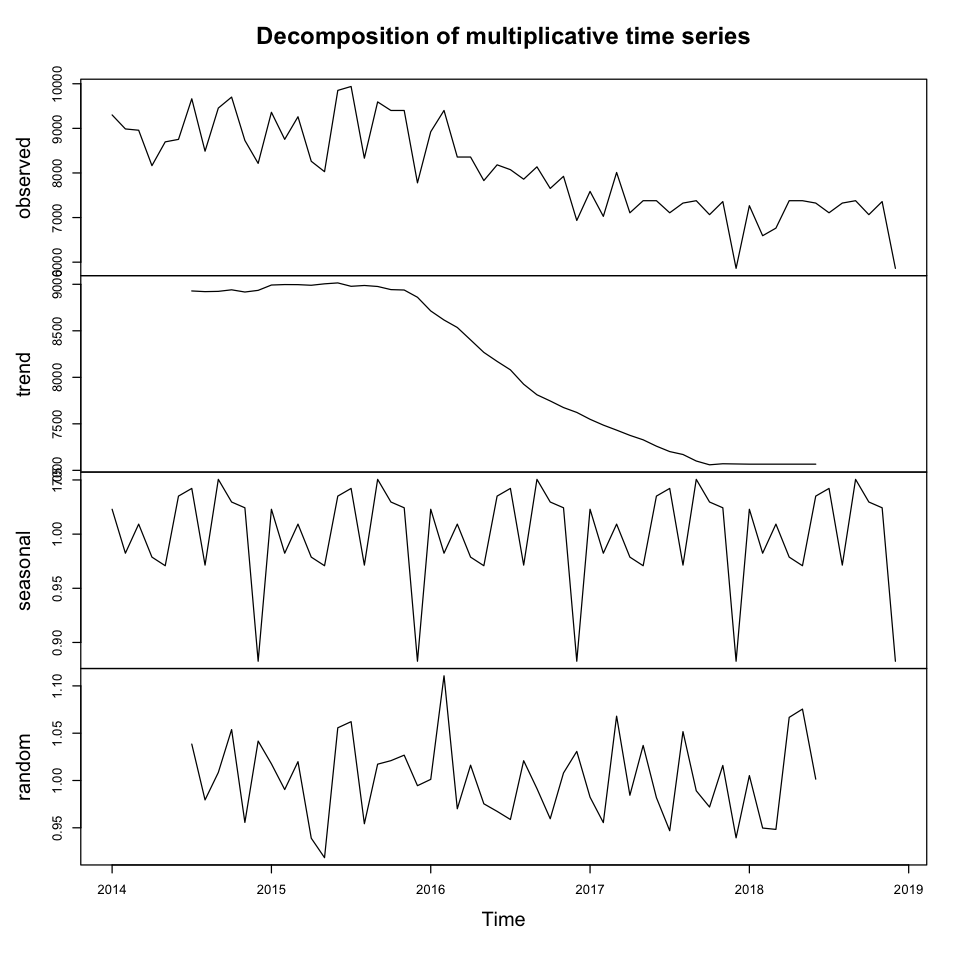

In [2661]:
d <- decompose(uscrime_filled_ts, "multiplicative")
plot(d)

### Model Fit

In [2662]:
usmodel_fit <- auto.arima(uscrime_filled_ts)

### Diagnostic Test

In [2663]:
usmodel_fit_resd = residuals(usmodel_fit)
usmodel_fit_resd

Jan          Feb          Mar          Apr          May         
2014    9.3009866 -184.6590836 -171.7426935 -768.3397151 -236.9017128
2015   85.1603686  -97.0125442  395.0224909 -153.6738397 -802.1243901
2016 -489.2274222  660.9885490 -531.4383321 -176.4284433 -387.5102290
2017   -6.1042621 -804.1424117  799.4552977  125.0218371  410.9685260
2018  208.9648324  118.9446772 -330.2807739  760.2473357  682.6043658
     Jun          Jul          Aug          Sep          Oct         
2014   76.1207517  910.2567203 -143.3026945  364.0966858  598.6718211
2015 1081.7432464  881.5679471 -489.3174699  -32.2586050 -193.1839976
2016 -959.3864052 -935.1917926  109.7481526    0.6474521 -414.5426023
2017  152.7459052 -205.2884291   89.8826012   54.7137227  -24.5957064
2018  337.5924582   21.1725225    4.0016333   20.4292888 -122.4085619
     Nov          Dec         
2014 -366.2352251 -885.6729944
2015  363.6906093 -929.7041280
2016 -122.1532814  -70.0978812
2017  101.8118706 -846.9003930
2018    8.5315887 -622.2335668

In [2664]:
Box.test(usmodel_fit_resd, lag=10,type="Ljung-Box")


	Box-Ljung test

data:  usmodel_fit_resd
X-squared = 5.4063, df = 10, p-value = 0.8624


### Forecating

#### 4 Years

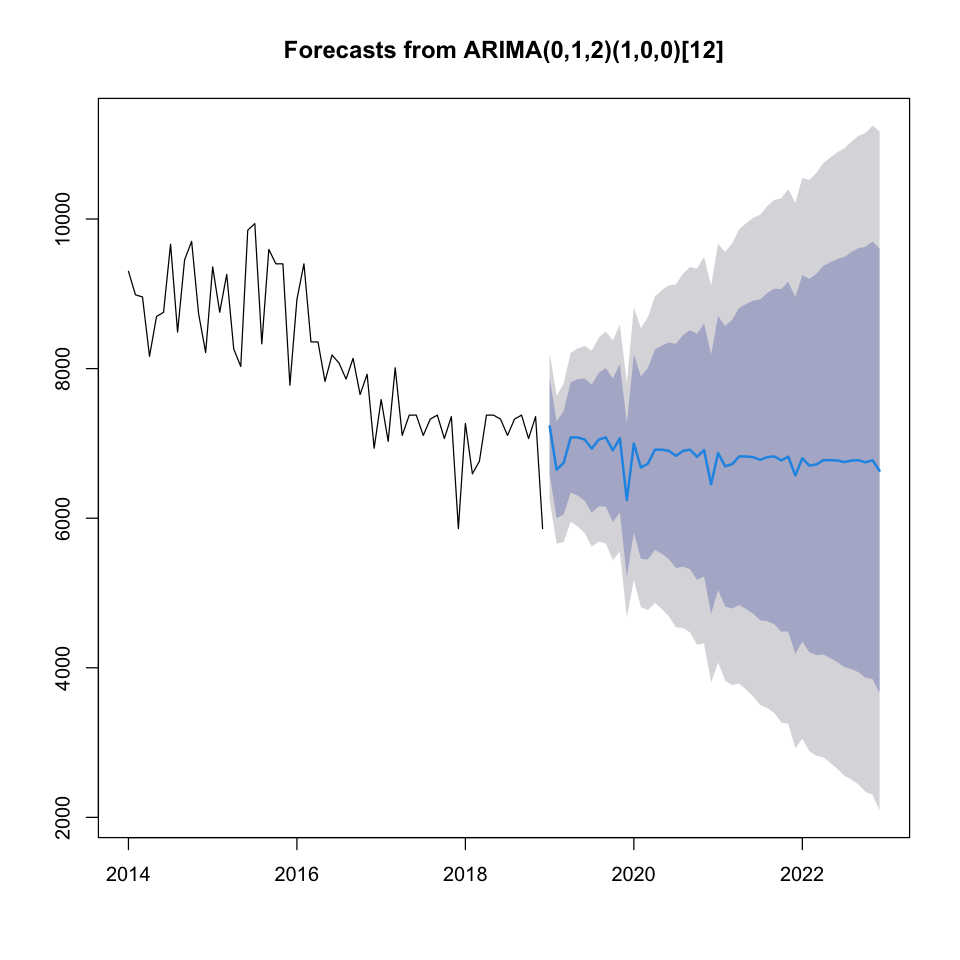

In [2665]:
usmodel_forecast <- forecast(usmodel_fit, h=12 * 4)
plot(usmodel_forecast)

#### 8 Years

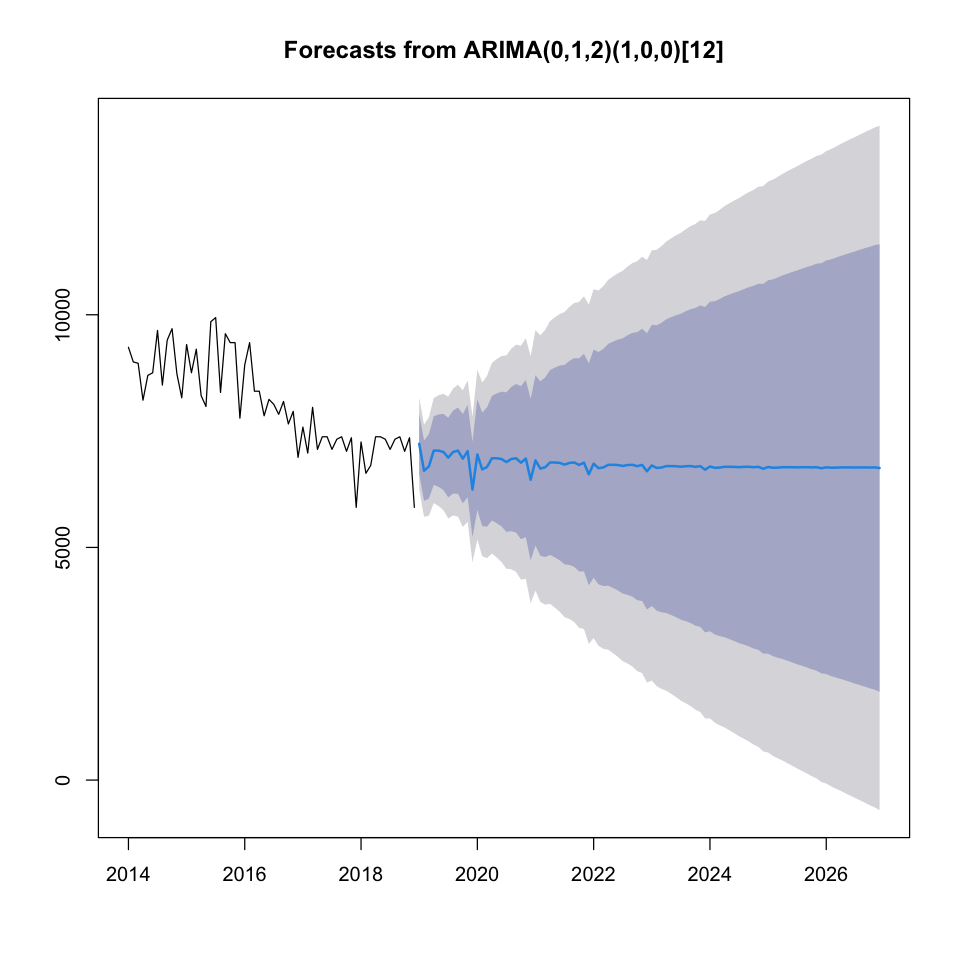

In [2825]:
usmodel_forecast <- forecast(usmodel_fit, h=12 * 8)
plot(usmodel_forecast)